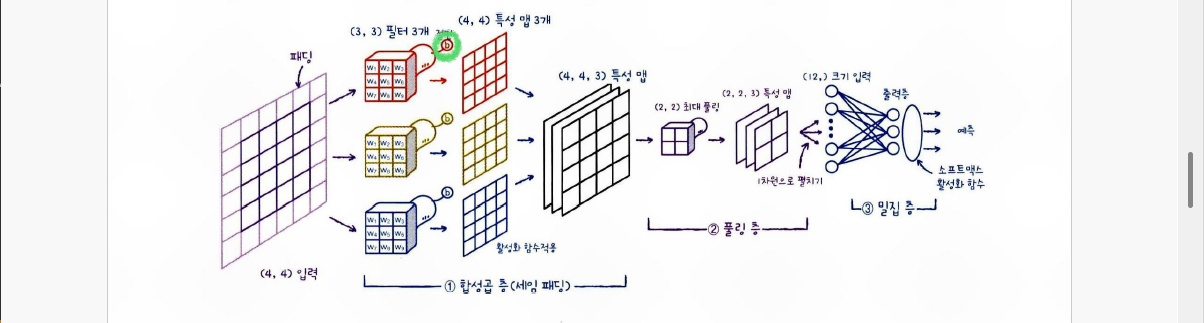

#### 08-2. 🍰합성곱 신경망을 사용한 이미지 분류

In [1]:
# 패션 MNIST 데이터 불러오기
#흑백이미지의 경우 채널 차원이 없는 2차원 배열이지만 Conv2D층을 사용하기 위해 채널 차원 추가!!
#넘파이 reshape() 

import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)
#(48000,28,28) 크기인 train_input이 (48000,28,28,1) 크기인 train_scaled가 됨

2026-01-10 16:04:33.042583: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-10 16:04:33.927863: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-10 16:04:38.454978: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
#필터32개, 커널크기(3,3), 렐루 활성화 함수, 세임 패딩

2026-01-10 16:04:48.467736: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
#첫 번째 합성곱-풀링 층
#최대풀링
model.add(keras.layers.MaxPool2D(2))

In [4]:
#두 번째 합성곱-풀링 층
#필터 개수 64개로 늘림
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(2))

In [5]:
# 3차원 특성 맵을 일렬로 펼치기, 마지막에 10개의 뉴런을 가진 (밀집) 출력층에서 확률을 계산하기 때문
# 중간에 하나의 밀집 은닉층을 하나 더 두도록 함
# Flatten 클래스 다음에 Dense 은닉층, 마지막으로 Dense 출력층의 순서대로 구성

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
#은닉층은 100개의 뉴런을 사용하고 활성화 함수는 합성곱 층과 마찬가지로 렐루 함수를 사용
model.add(keras.layers.Dropout(0.4))
#은닉층과 출력층 사이 드롭아웃 층이 은닉층의 과대적합을 막아 성능을 조금 더 개선해 줄 것
model.add(keras.layers.Dense(10, activation='softmax'))
#패션 MNIST 데이터셋은 클래스 10개를 분류하는 다중 분류 문제, 마지막 층의 활성화 함수는 소프트맥스를 사


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

🍦첫 번째 합성곱 층 3x 3x 1x 32+ 32 = 320개의 파라미터        
🍦두 번째 합성곱 층 3x 3x 32x 64+ 64 = 18,496개의 파라미터        
🍦Flatten 클래스에서(7, 7, 64) 크기의 특성 맵을 1차원 배열로 펼치면(3136,)     
🍦100개의 뉴런과 완전히 연결해야 하므로 은닉층의 모델 파라미터 개수는 3,136x 100 +100 =313,700개      
🍦마지막 출력층 100 x10 +10 = 1,010개         


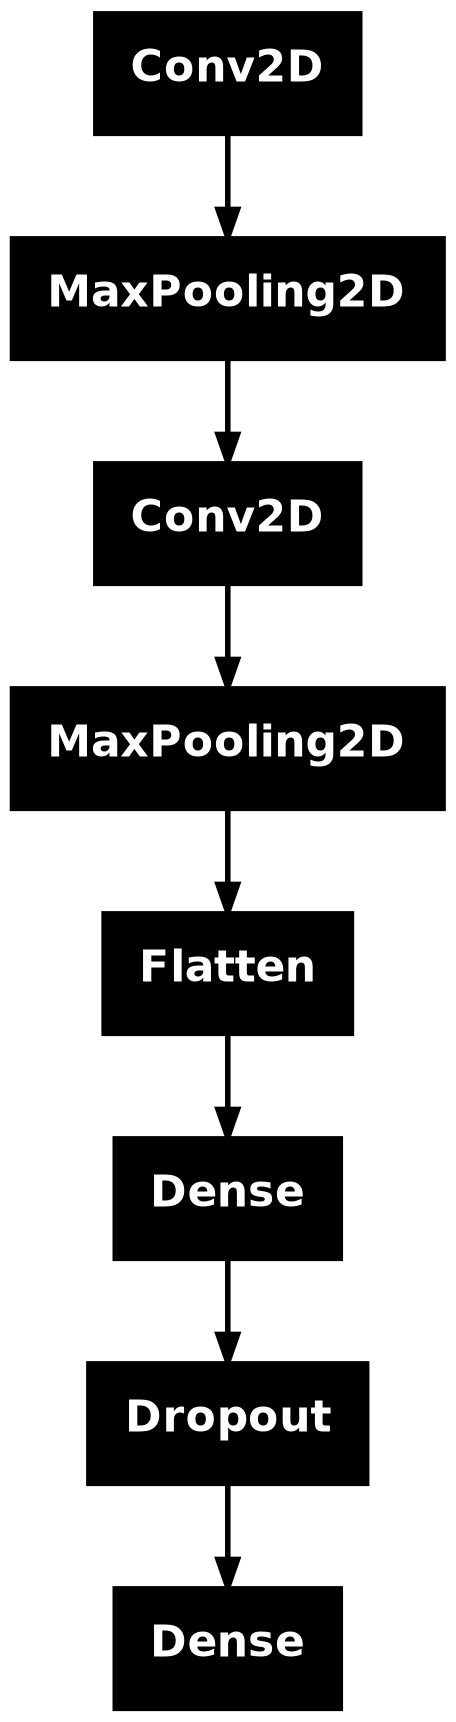

In [7]:
keras.utils.plot_model(model)

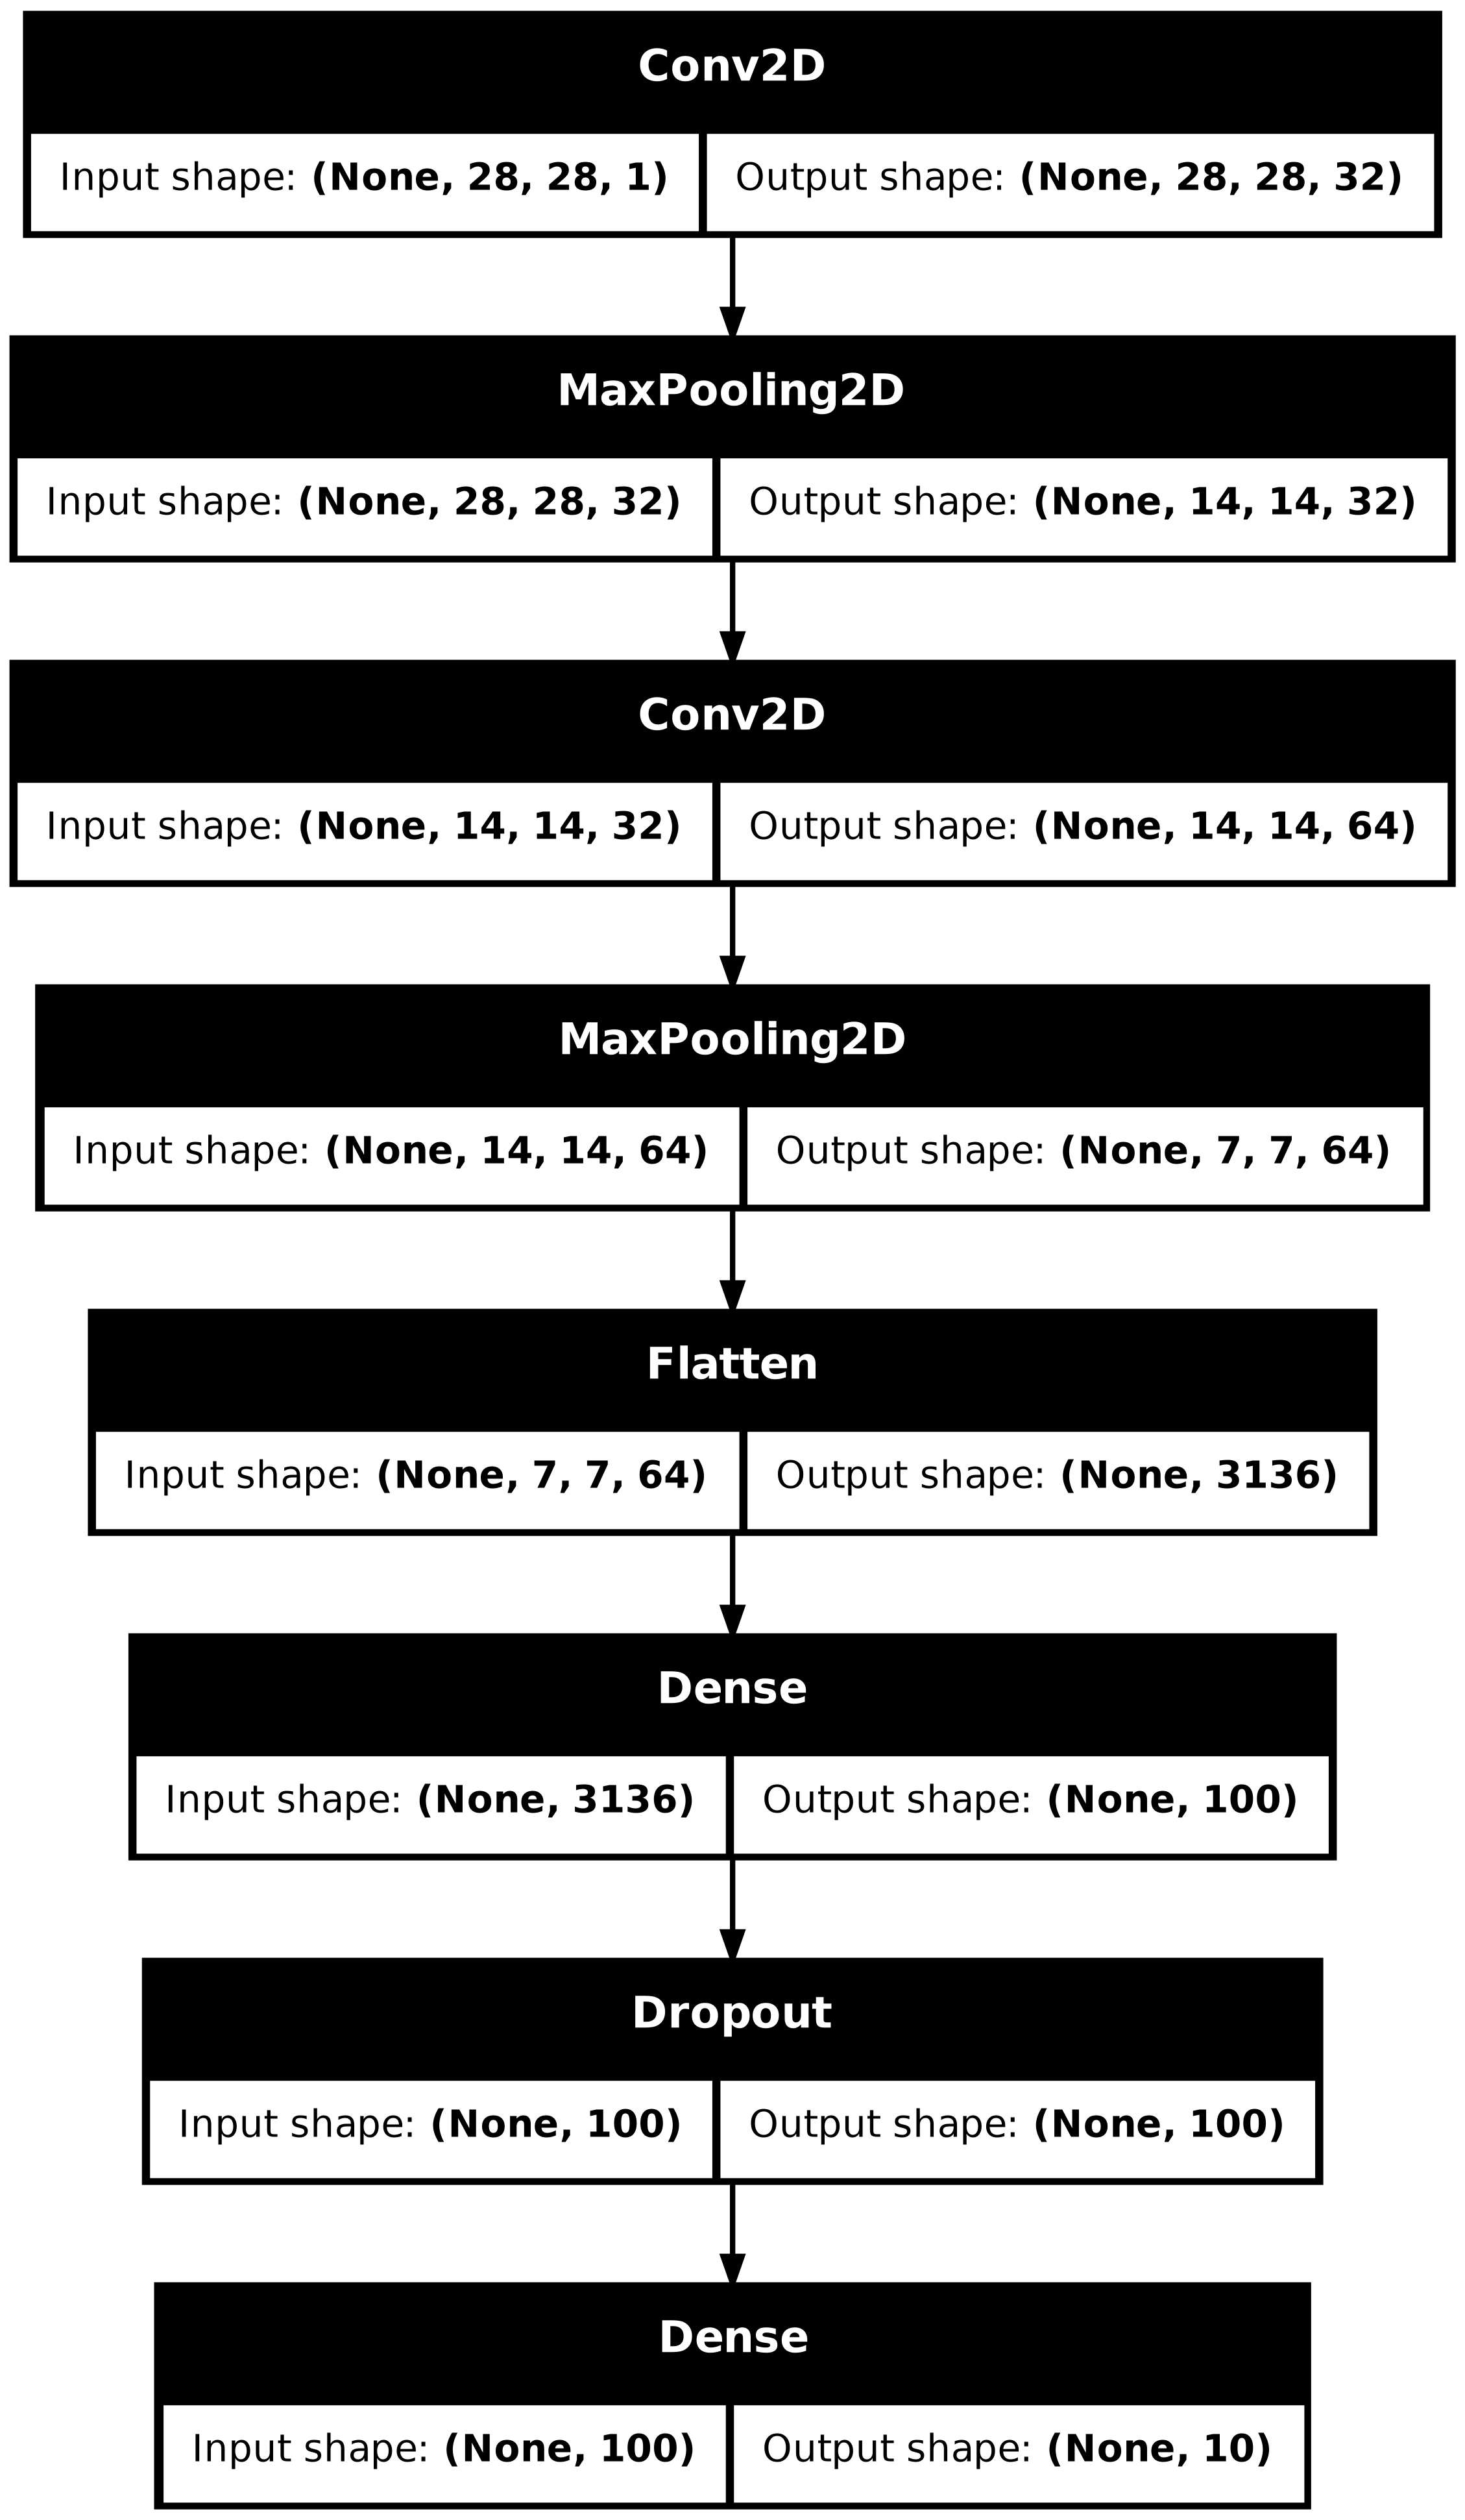

In [8]:
keras.utils.plot_model(model, show_shapes=True,to_file='cnn-architecture.png', dpi=300)

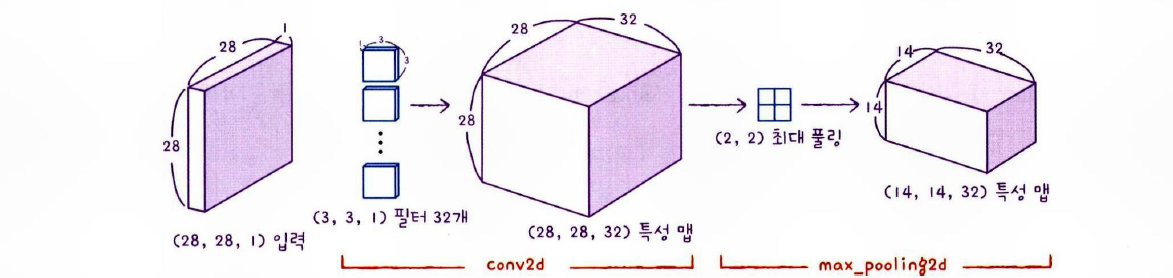
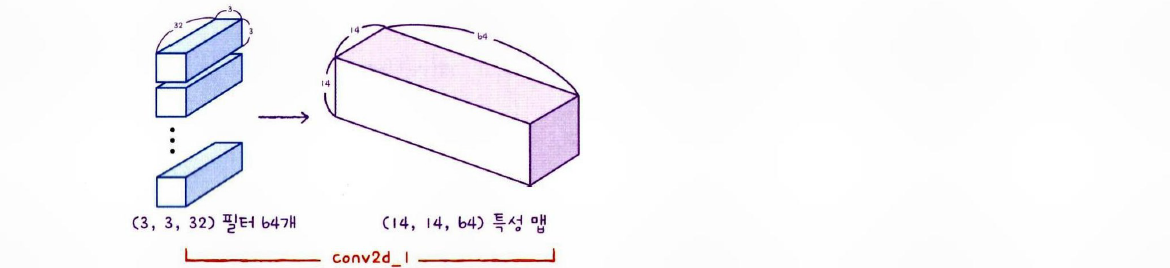
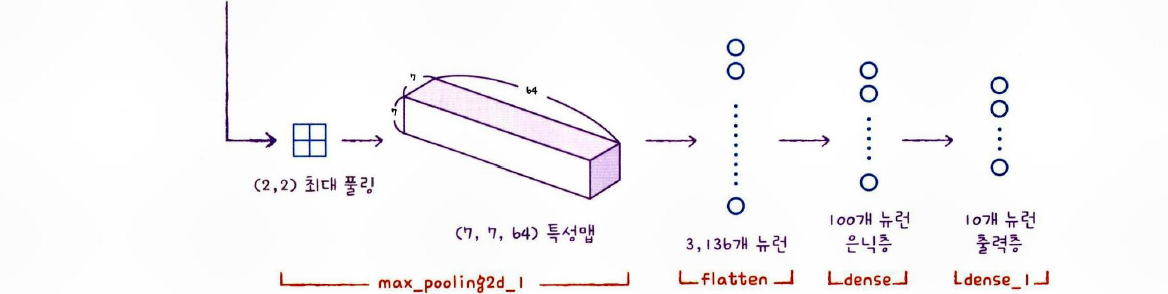

In [9]:
#모델 컴파일과 훈련
#Adam 옵티마이저를 사용하고 Modelcheckpoint 콜백과 EarlyStopping 콜백을 함께 사용해 조기 종료 기법 구현

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs =20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8163 - loss: 0.5120 - val_accuracy: 0.8815 - val_loss: 0.3170
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8791 - loss: 0.3365 - val_accuracy: 0.8926 - val_loss: 0.2805
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8975 - loss: 0.2858 - val_accuracy: 0.9102 - val_loss: 0.2408
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9076 - loss: 0.2572 - val_accuracy: 0.9074 - val_loss: 0.2440
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9155 - loss: 0.2300 - val_accuracy: 0.9166 - val_loss: 0.2233
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9213 - loss: 0.2131 - val_accuracy: 0.9175 - val_loss: 0.2298
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 20ms/step - accuracy: 0.9266 - loss: 0.1968 - val_accuracy: 0.9223 - val_loss: 0.2138
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9330 -

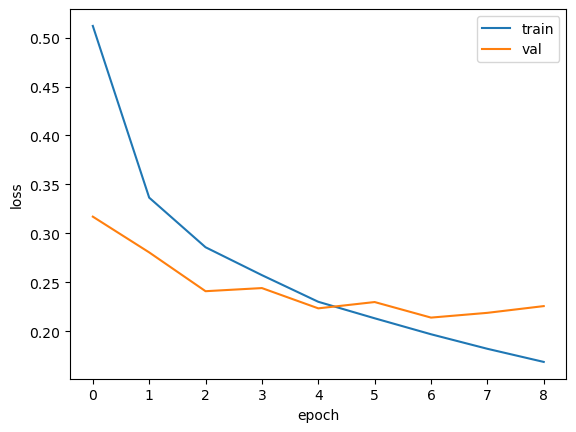

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

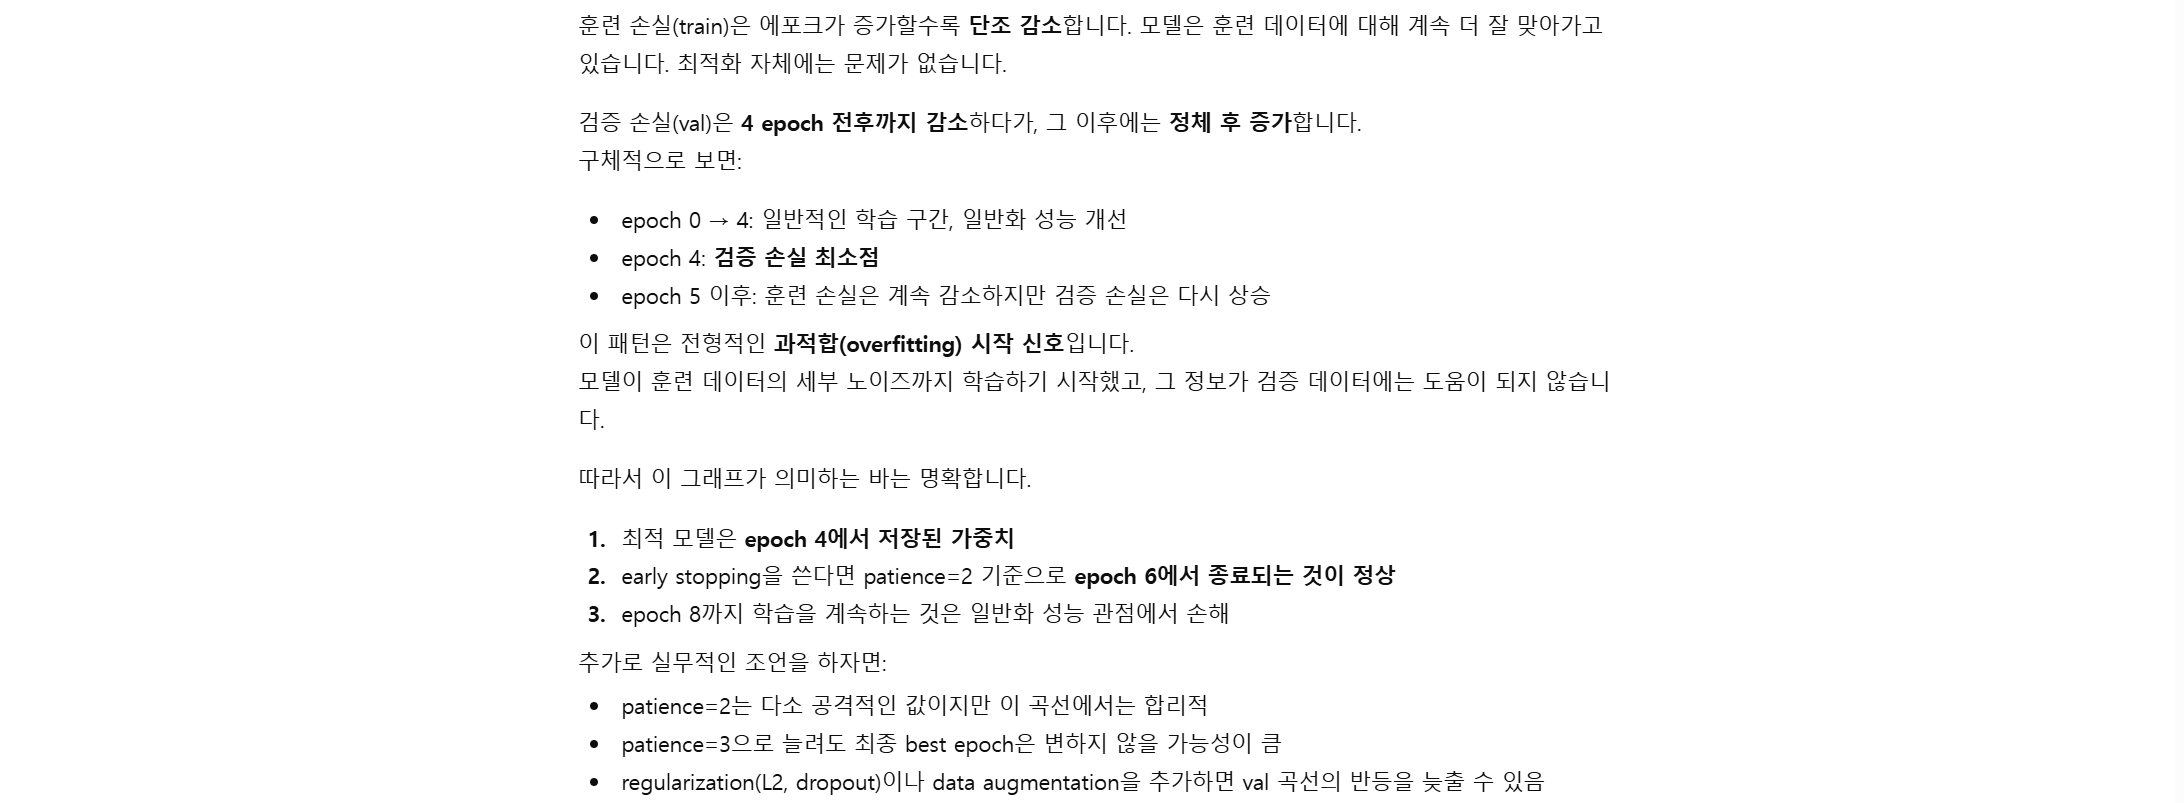

EarlyStopping 클래스에서 restore_best_weights 매개변수를 True로 지정했으므로 현재
mod이 객체가 최적의 모델 파라미터로 복원되어 있다.      
즉 ModelCheckpoint 콜백이 저장한 best-cnn-model.keras 파일을 다시 읽을 필요가 없다.

In [12]:
# 세트에 대한 성능 평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9223 - loss: 0.2138


[0.21384896337985992, 0.9223333597183228]

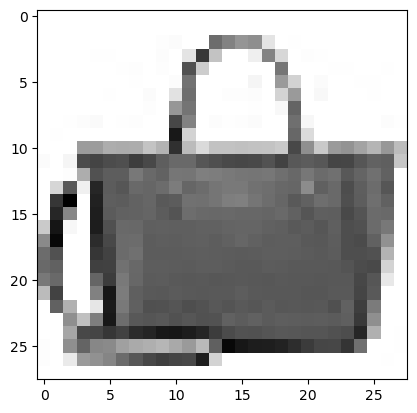

In [13]:
# 맷플롯립에서는 흑백이미지 차원이 없어 3D에서 2D로 바꾸어 출력

plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [15]:
#10개의 클래스에 대한 예측 확률을 출력
preds = model.predict(val_scaled[0:1])
print(preds)

#아홉 번째 값이 1이고 다른 값은 거의 0에 가까움. 즉, 아홉 번째 클래스라고 강하게 주장

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
[[4.8265777e-17 9.6159679e-28 1.0047813e-20 8.2816147e-20 2.7422718e-20
  8.7160764e-22 2.9087569e-16 5.5647841e-21 1.0000000e+00 1.5815156e-19]]


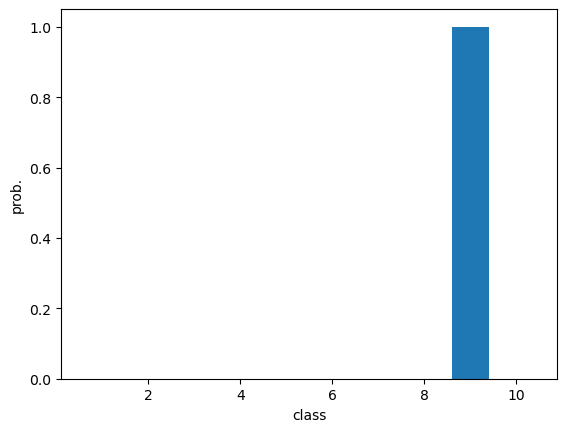

In [16]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [17]:
#클래스 리스트가 있으면 레이블 출력 쉬움
classes = ['티셔츠', '바지','스웨터','드레스', '코트', '샌달','셔츠', '스니커즈', '가방', '앵클 부츠']

In [18]:
#preds 배열에서 가장 큰 인덱스를 classes 리스트의 인덱스로 사용
import numpy as np
print(classes[np.argmax(preds)])

가방


In [19]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [20]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9175 - loss: 0.2337


[0.2337254136800766, 0.9175000190734863]

In [ ]:
# """#합성곱 신경망을 사용한 이미지 분류"""
# """##패션 MNIST 데이터 불러오기"""
# import keras
# from sklearn.model_selection import train_test_split
# (train_input, train_target), (test_input, test_target) =\
#     keras.datasets.fashion_mnist.load_data()
# train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
# train_scaled, val_scaled, train_target, val_target = train_test_split(
#     train_scaled, train_target, test_size=0.2, random_state=42)

# """##합성곱 신경망 만들기"""
# model = keras.Sequential()
# model.add(keras.layers.Input(shape=(28,28,1)))
# model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
# model.add(keras.layers.MaxPool2D(2))
# model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
# model.add(keras.layers.MaxPool2D(2))

# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dropout(0.4))
# model.add(keras.layers.Dense(10, activation='softmax'))
# model.summary()

# keras.utils.plot_model(model)
# keras.utils.plot_model(model, show_shapes=True,to_file='cnn-architecture.png', dpi=300)

# """##모델 컴파일과 훈련"""
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# history = model.fit(train_scaled, train_target, epochs =20,
#                     validation_data=(val_scaled, val_target),
#                     callbacks=[checkpoint_cb, early_stopping_cb])


# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'],label='train')
# plt.plot(history.history['val_loss'],label='val')
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.legend()
# plt.show()

# model.evaluate(val_scaled, val_target)

# plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
# plt.show()

# preds = model.predict(val_scaled[0:1])
# print(preds)

# plt.bar(range(1,11), preds[0])
# plt.xlabel('class')
# plt.ylabel('prob.')
# plt.show()

# classes = ['티셔츠', '바지','스웨터','드레스', '코트', '샌달','셔츠', '스니커즈', '가방', '앵클 부츠']

# import numpy as np
# print(classes[np.argmax(preds)])

# test_scaled = test_input.reshape(-1,28,28,1)/255.0
# model.evaluate(test_scaled, test_target)

#### 08-2. 파이토치로 합성곱 신경망 모델 훈련하기      

파이토치는 이미지의 채널 차원이 배치 차원 바로 다음에 올 것이라 기대한다는 점       
기존(28, 28)크기의 이미지를 (1, 28, 28) 크기로 변환

In [21]:
#traininput의 reshape() 메서드를 사용해 첫 번째 배치 차원 다음에 
#크기가 1인 두 번째 차원을 추가
#‼️케라스는 이와 반대로 채널 차원이 마지막에 등장할 것이라 기대하기 때문에 본문에서
#(28. 28) 이미지를 (28, 28, 1)

from torchvision.datasets import FashionMNIST

fm_train = FashionMNIST(root='.', train=True, download=True)
fm_test = FashionMNIST(root='.', train=False, download=True)

train_input = fm_train.data
train_target = fm_train.targets
train_scaled = train_input.reshape(-1,1,28,28)/255.0

from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

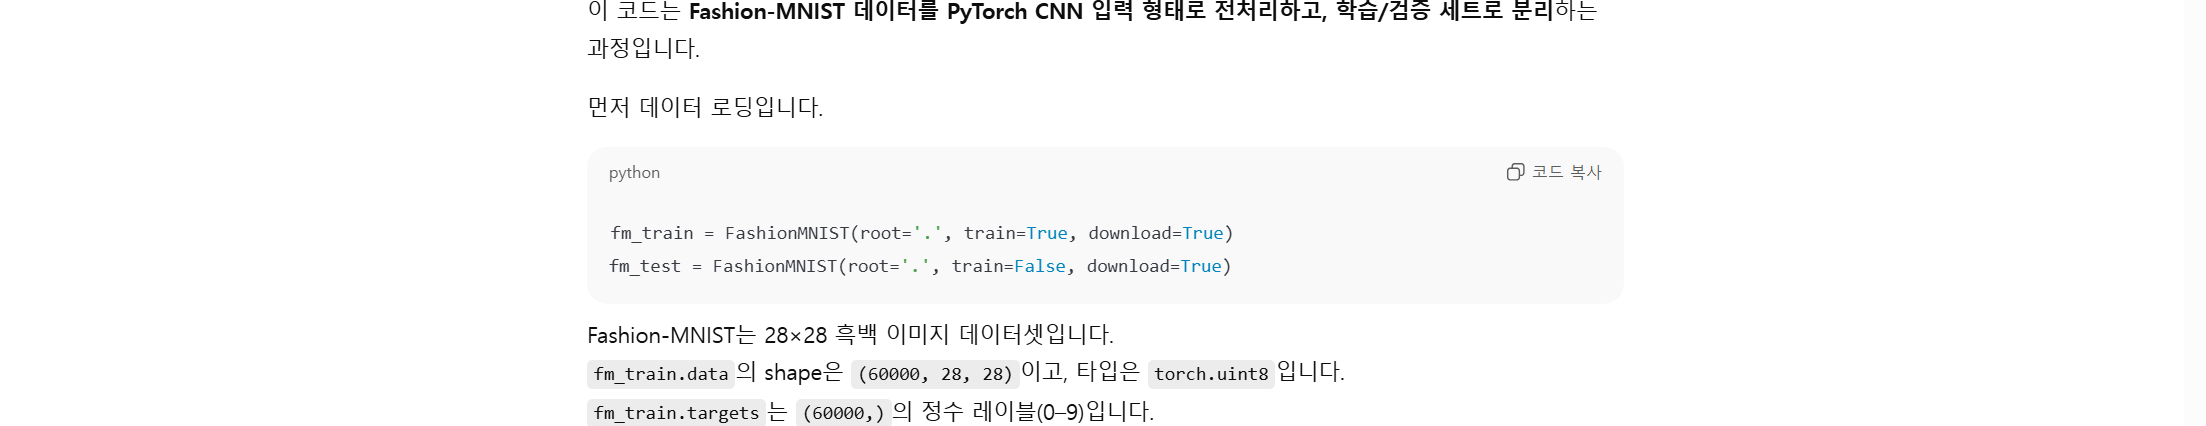
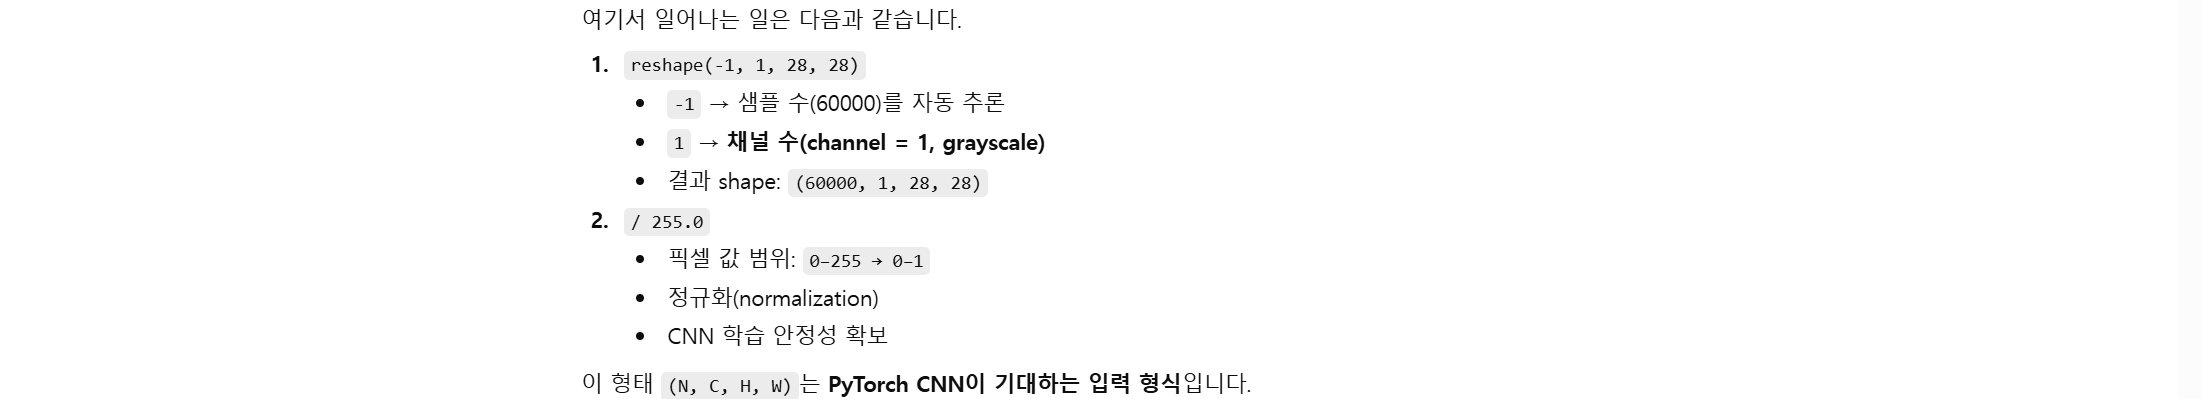
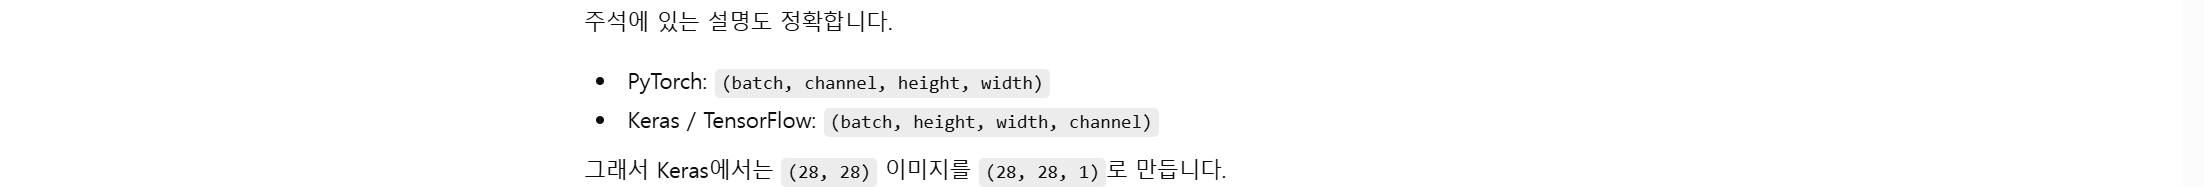

In [22]:
import torch.nn as nn

model = nn.Sequential()
model.add_module('conv1', nn.Conv2d(1,32,kernel_size=3, padding='same'))
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(2))

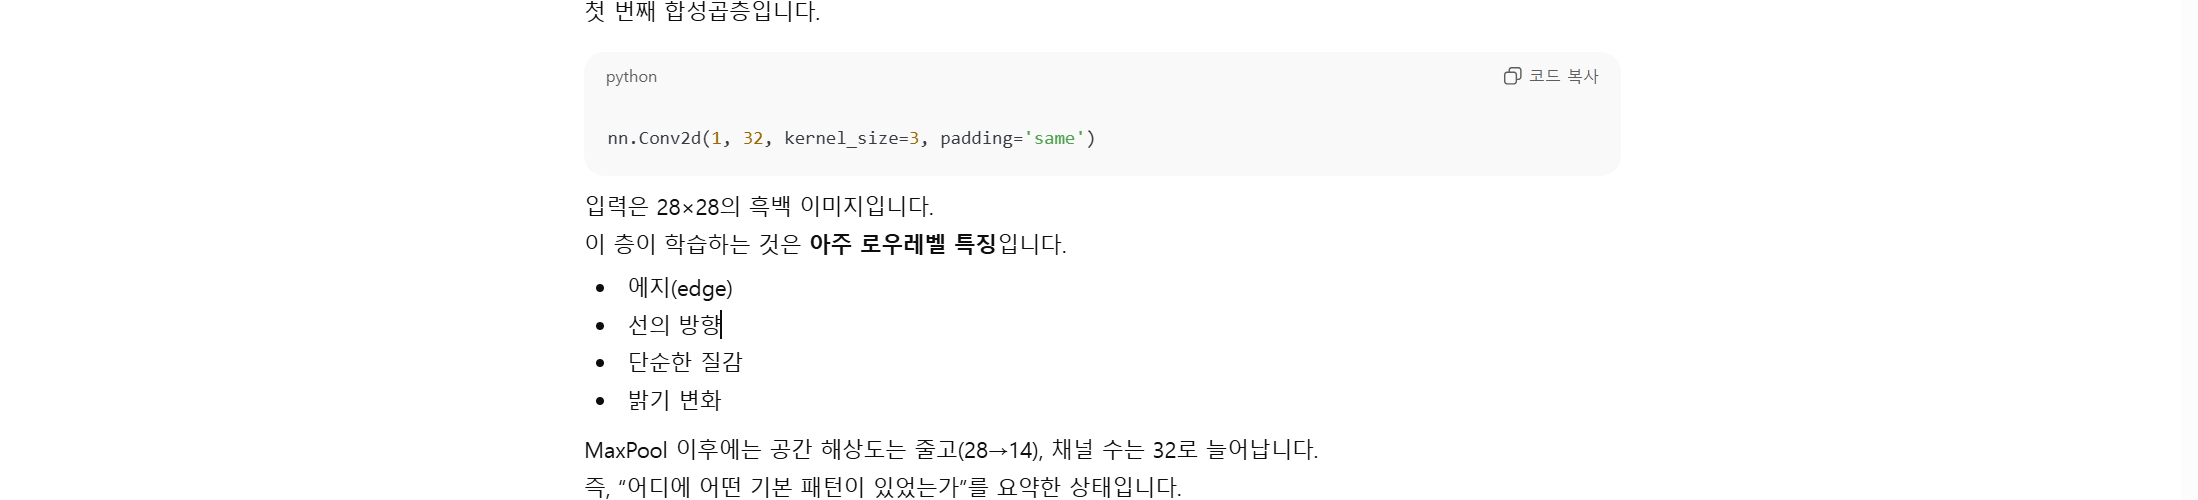

In [ ]:
#두 번째 합성곱 층
#첫 번째 층의 출력(특징 맵)을 입력으로 받음‼️
model.add_module('conv2', nn.Conv2d(32,64,kernel_size=3, padding='same'))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(2))
model.add_module('flatten', nn.Flatten())

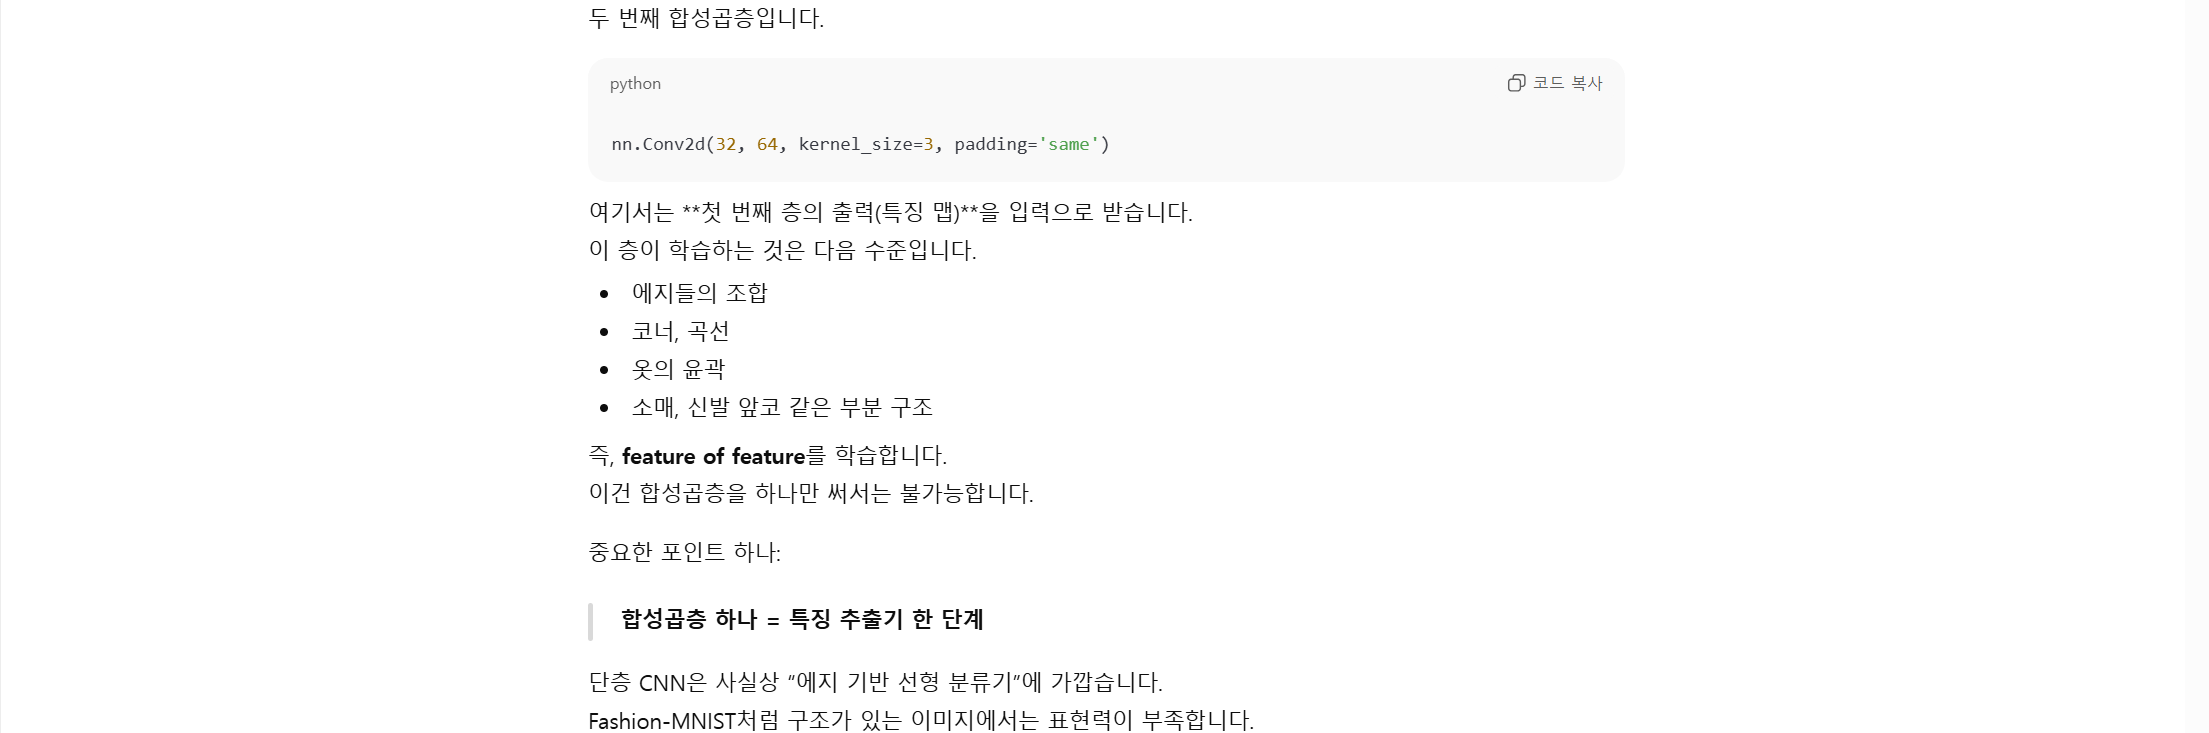
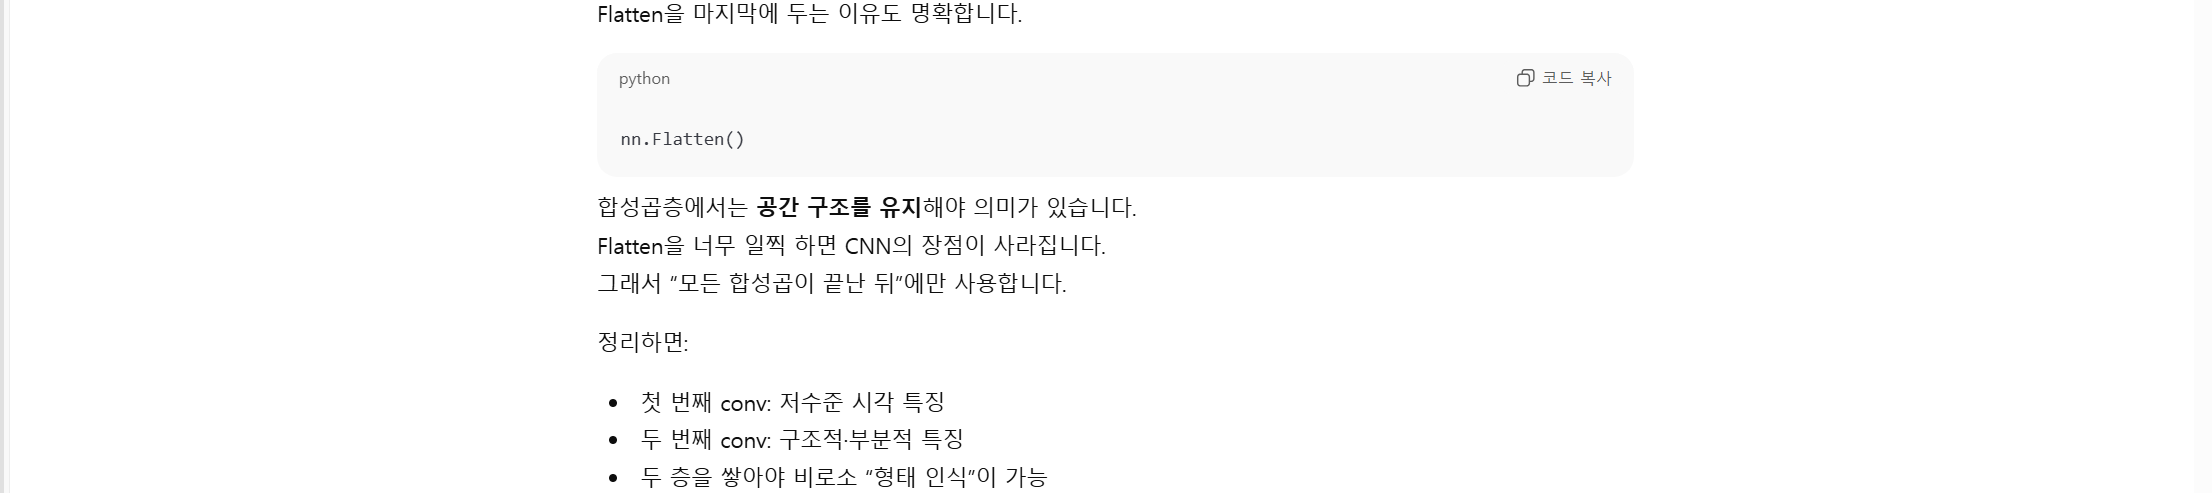

In [24]:
import torch

#지금까지 만든 모델에 가짜 입력을 만들어 통과시켜서 어떤 크기의 출력이 만들어 지는지 확인
outputs = model(torch.ones(1,1,28,28))
print(outputs.shape)


torch.Size([1, 3136])


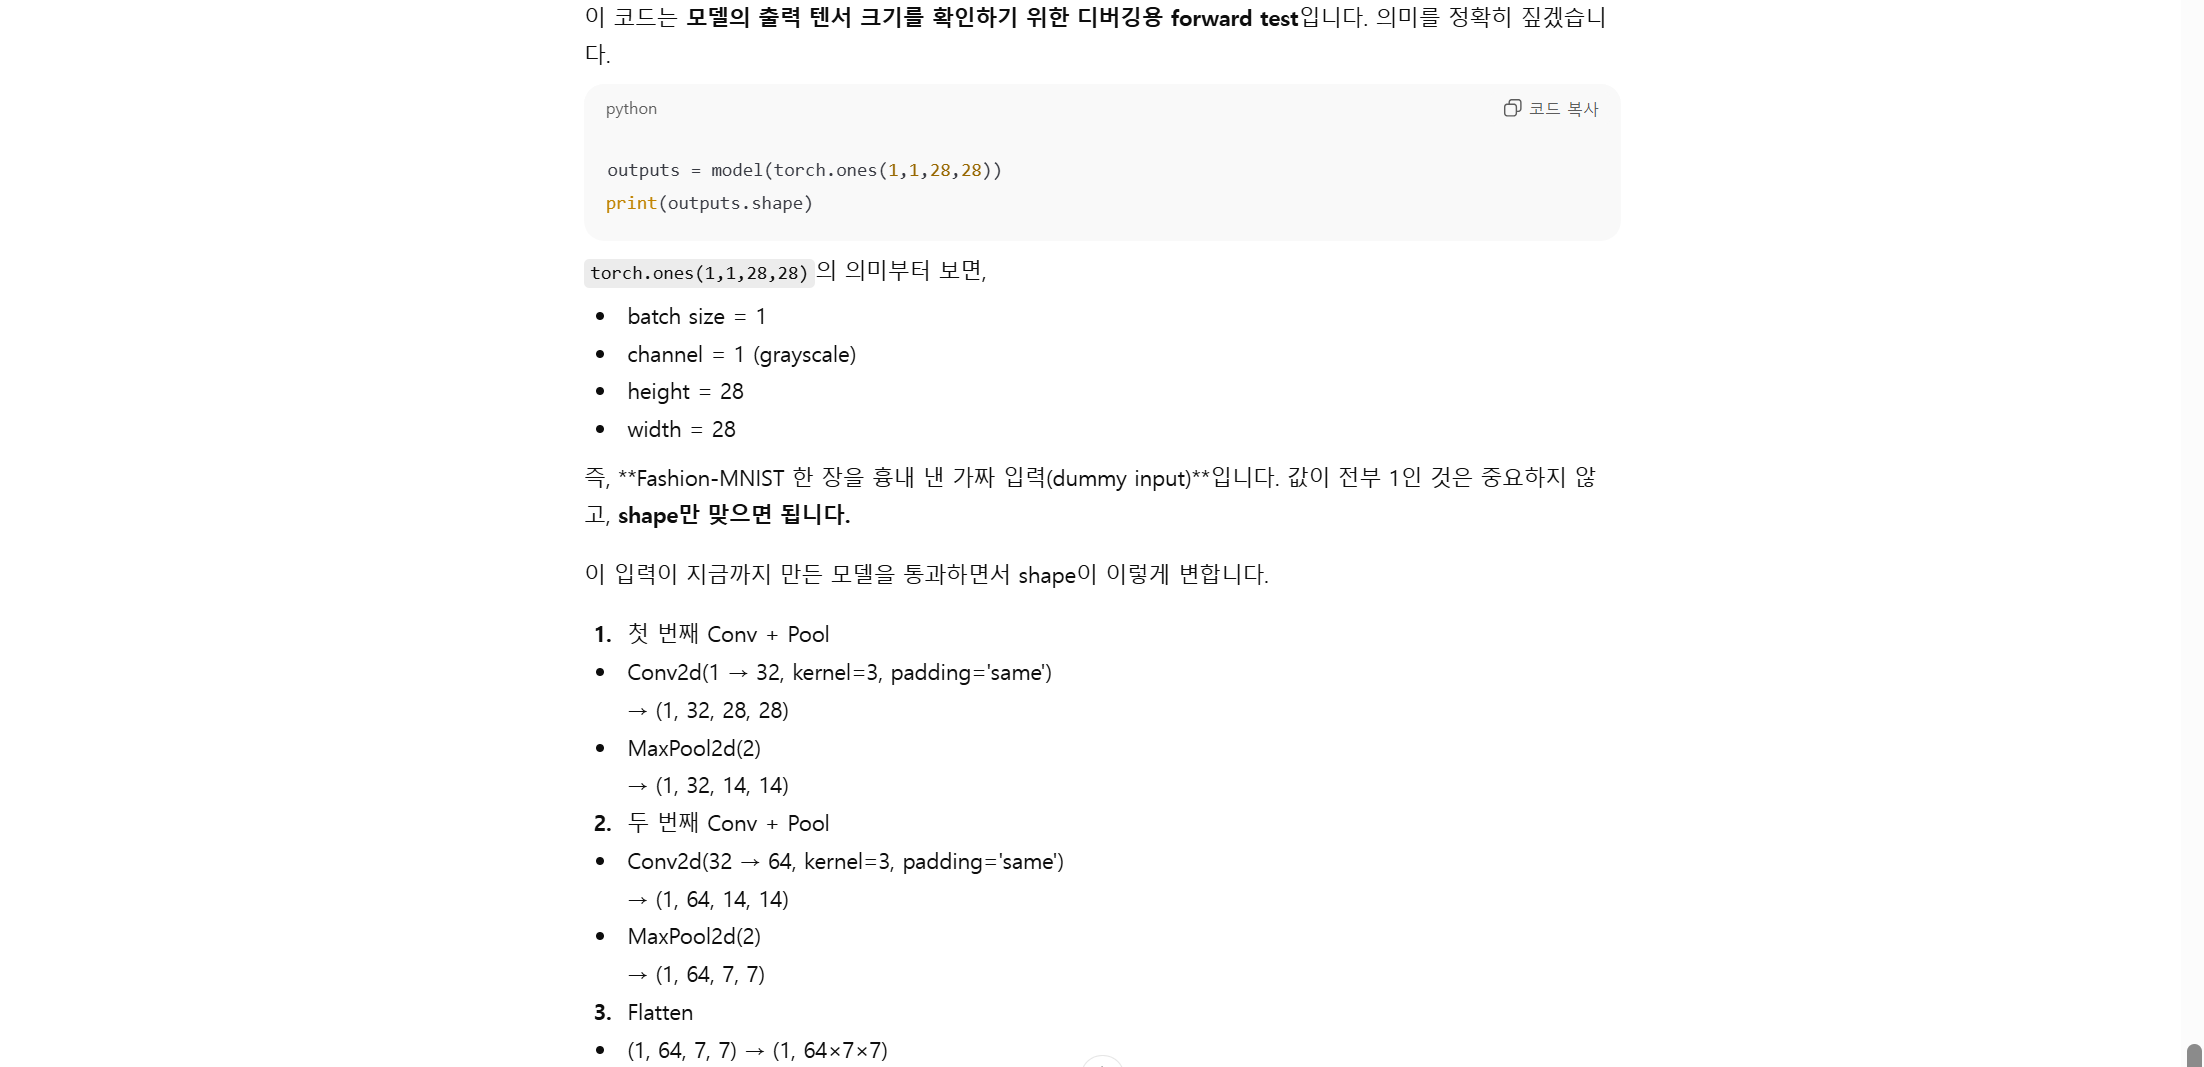
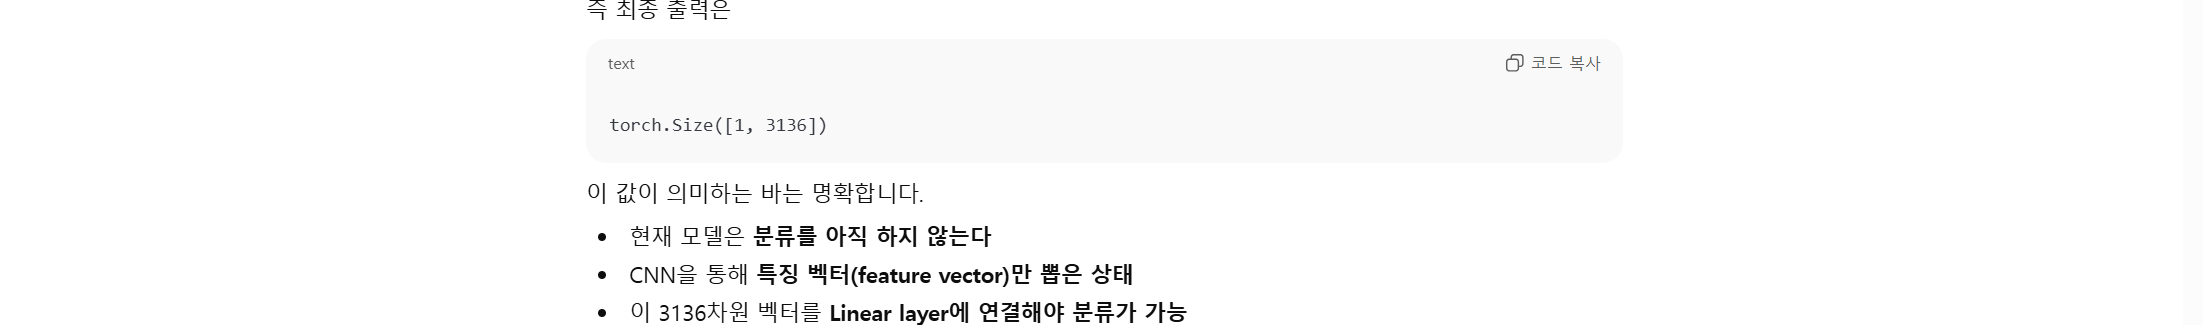

In [25]:
#두 번째 합성곱 층의 출력을 1차원으로 펼쳤으므로, 이제 Linear 층을 추가할 차례

model.add_module('dense1', nn.Linear(3136,100))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(0.3))
model.add_module('dense2', nn.Linear(100,10))


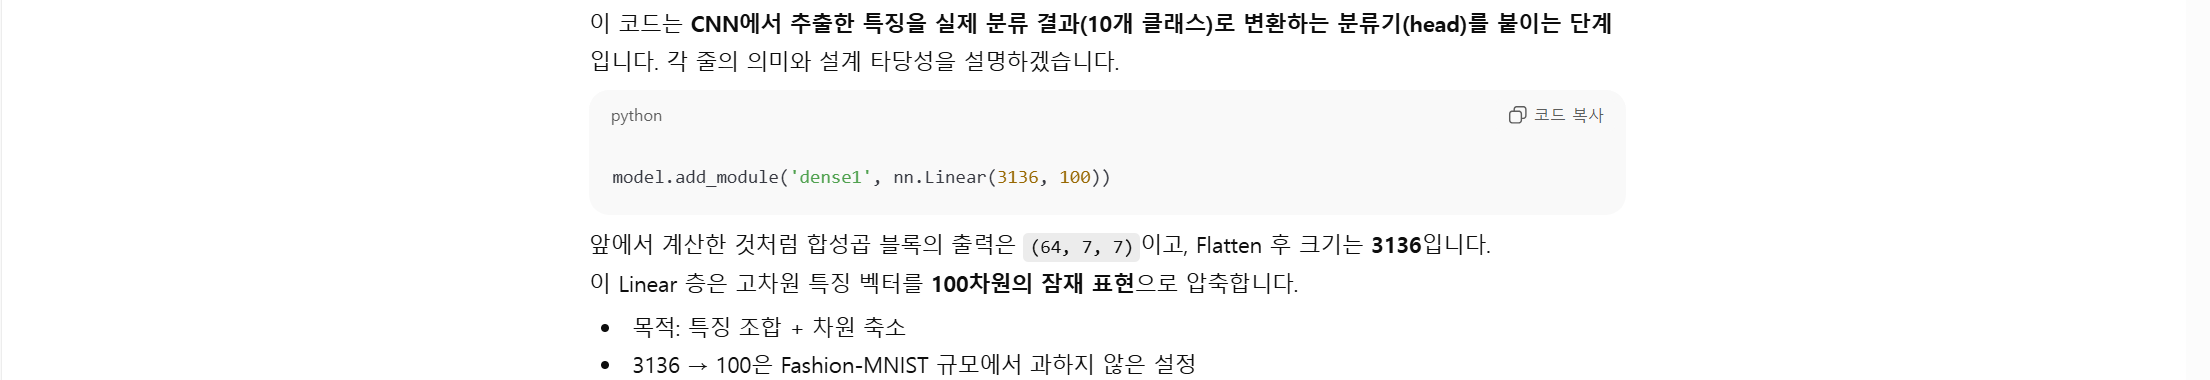
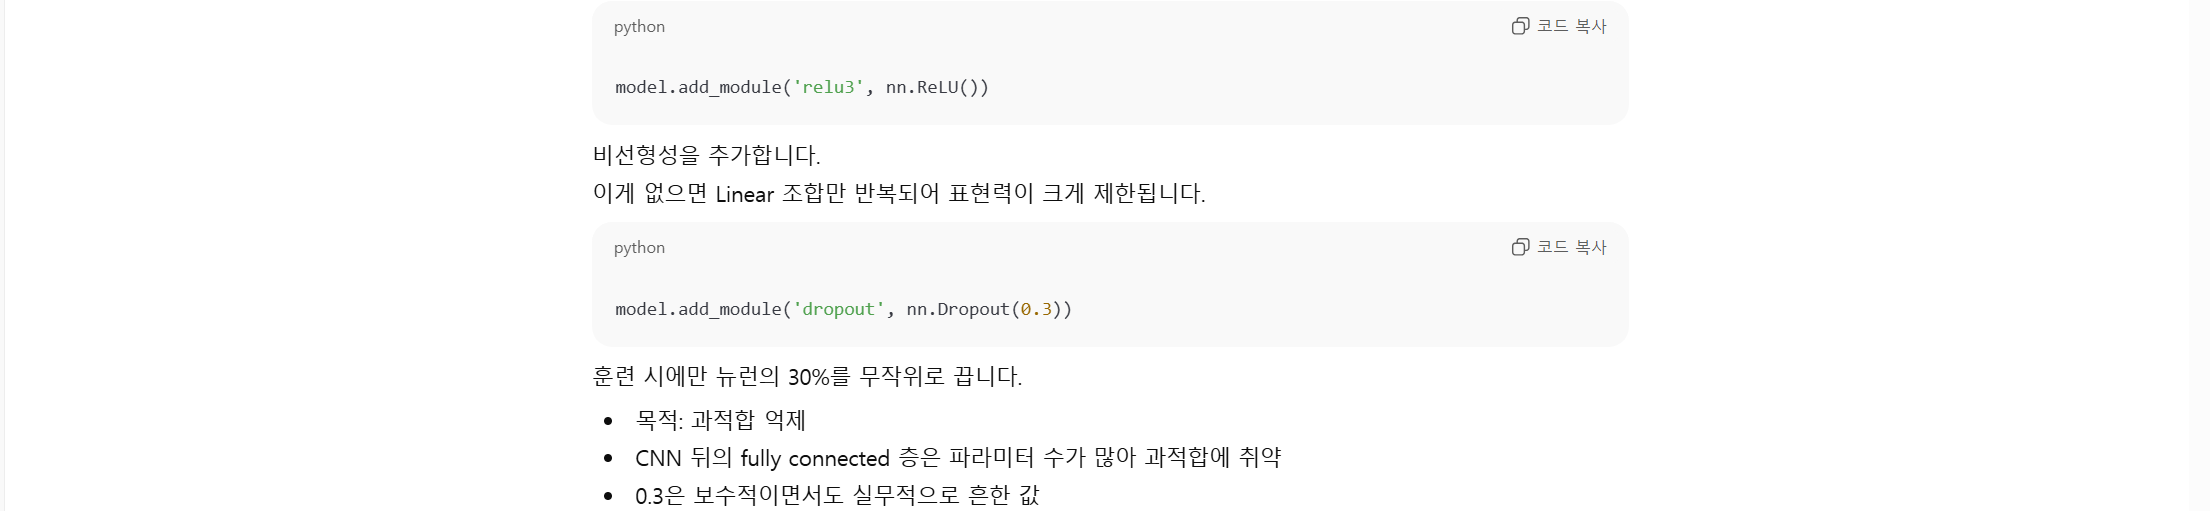
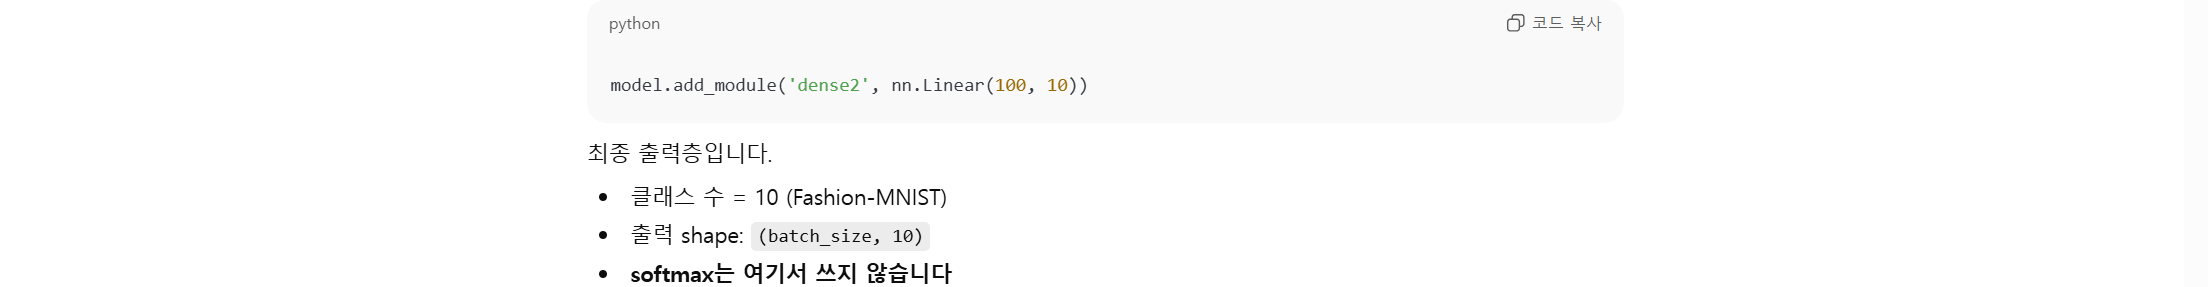
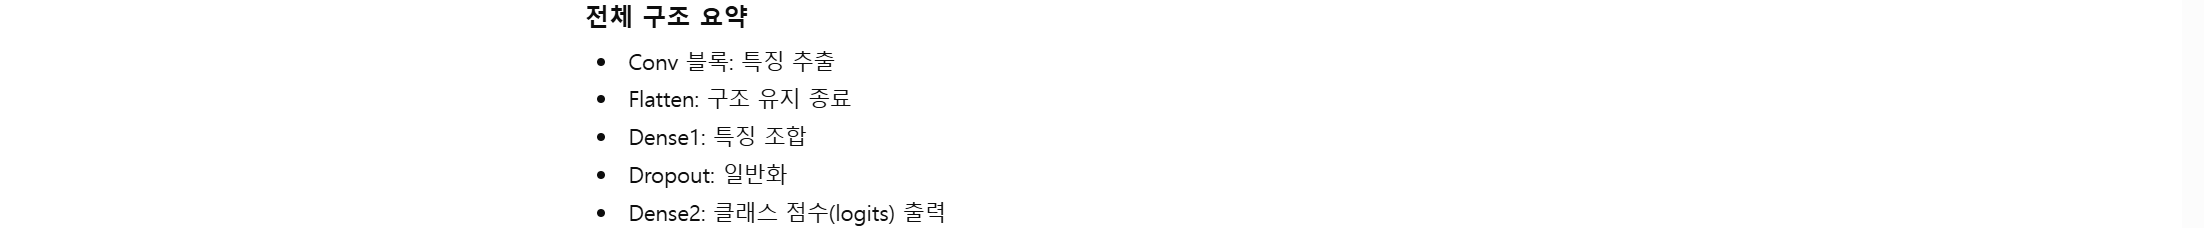

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

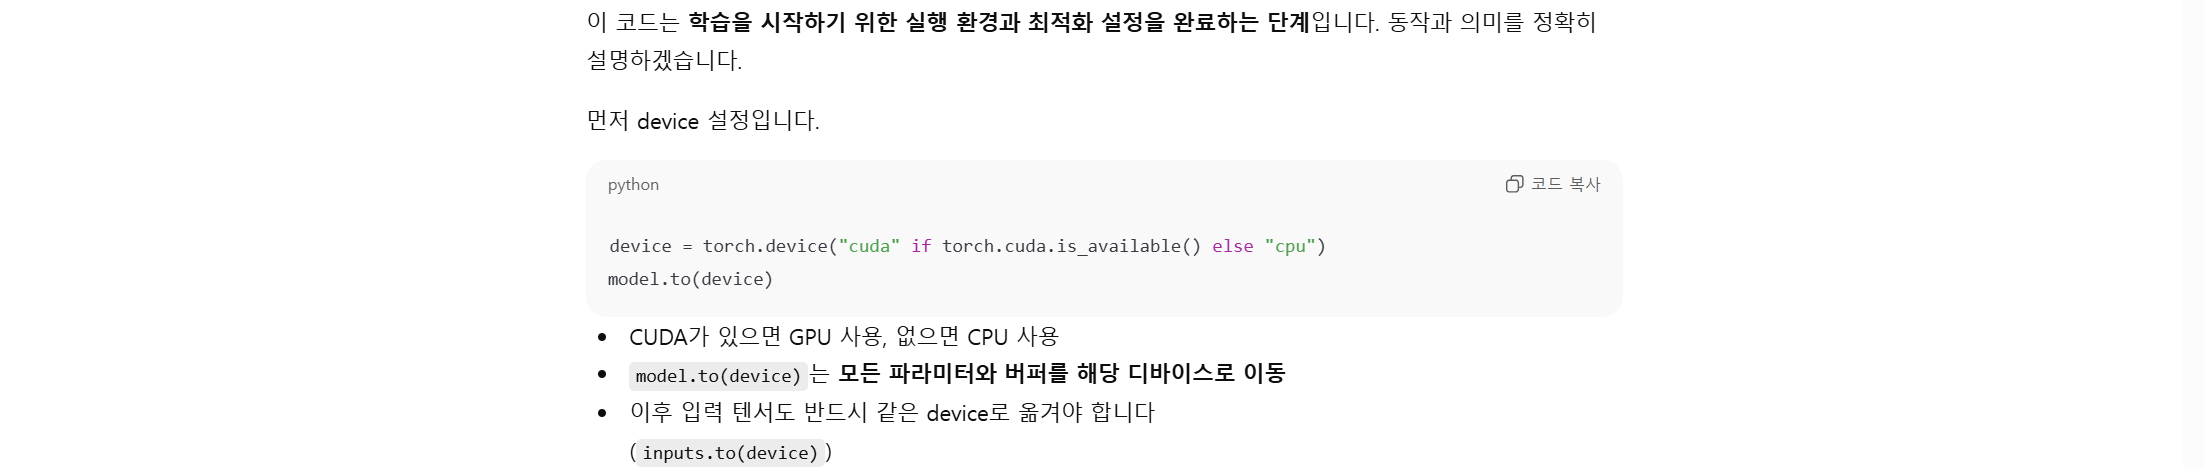
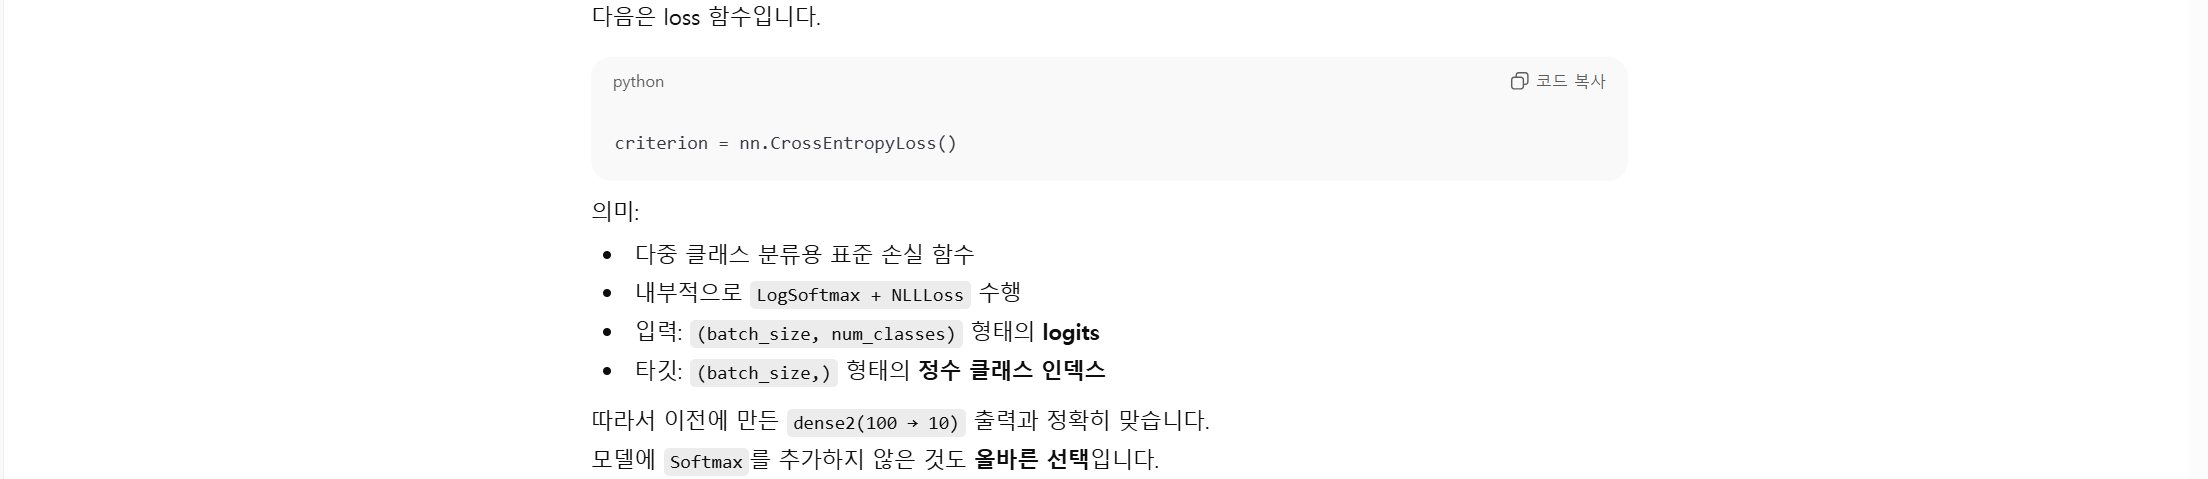
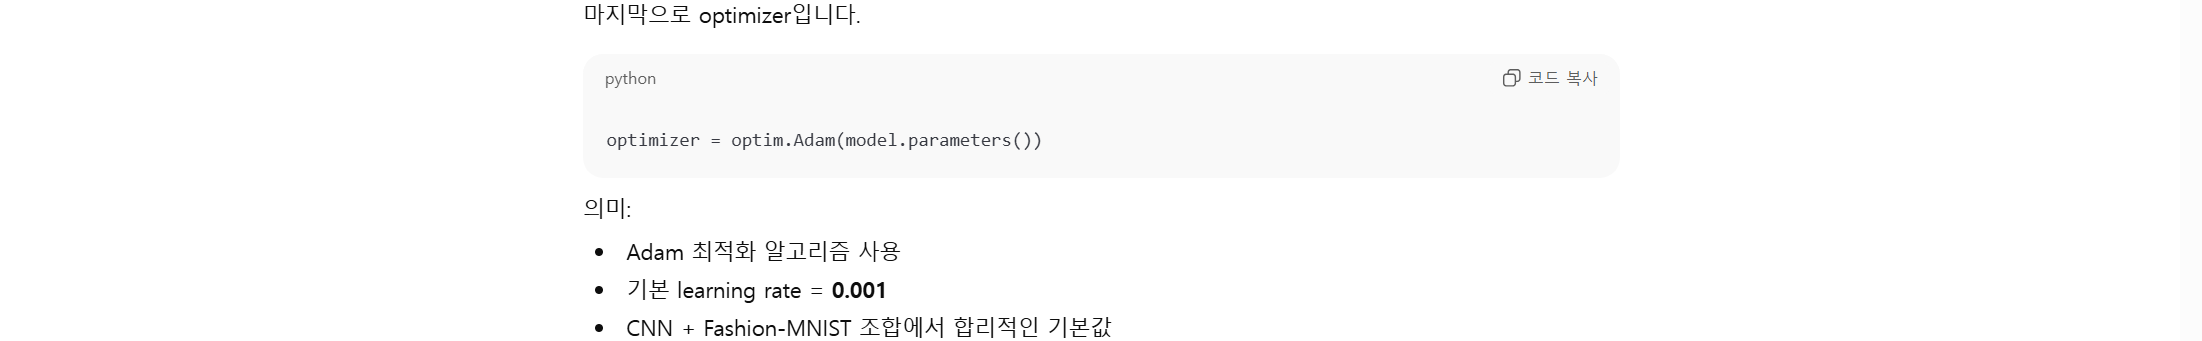
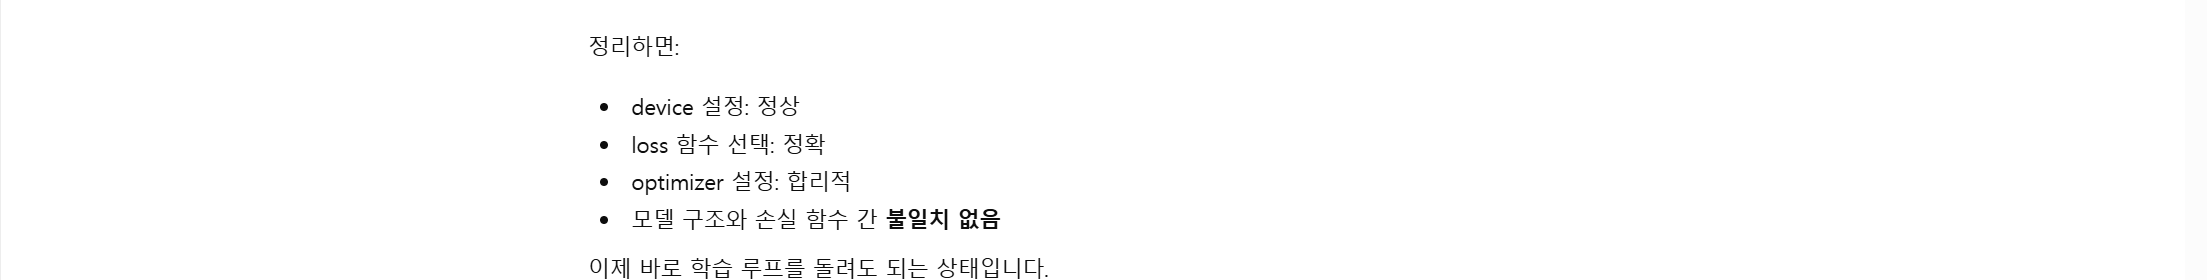


훈련 세트와 검증 세트로 각각 데이터셋을 만들고 이를 사용해 배치 크기 32인 데이터 로더를 만드는 과정     
검증 세트는 모델을 훈련하는데 사용하는 것이 아니므로 배치마다 섞을 필요가 X     
배치를 섞을 필요가 없다”는 뜻은 검증 데이터의 샘플 순서를 무작위로 바꿀 이유가 없다는 것        

##### 🧁훈련데이터
훈련은 가중치를 업데이트합니다. 만약 데이터가 특정 순서(예: 클래스별 정렬)로 들어가면, 경사 하강이 그 순서에 편향될 수 있습니다. 그래서 매 epoch마다 샘플 순서를 섞어 주는 것이 일반적인 원칙       

##### 🧁검증데이터
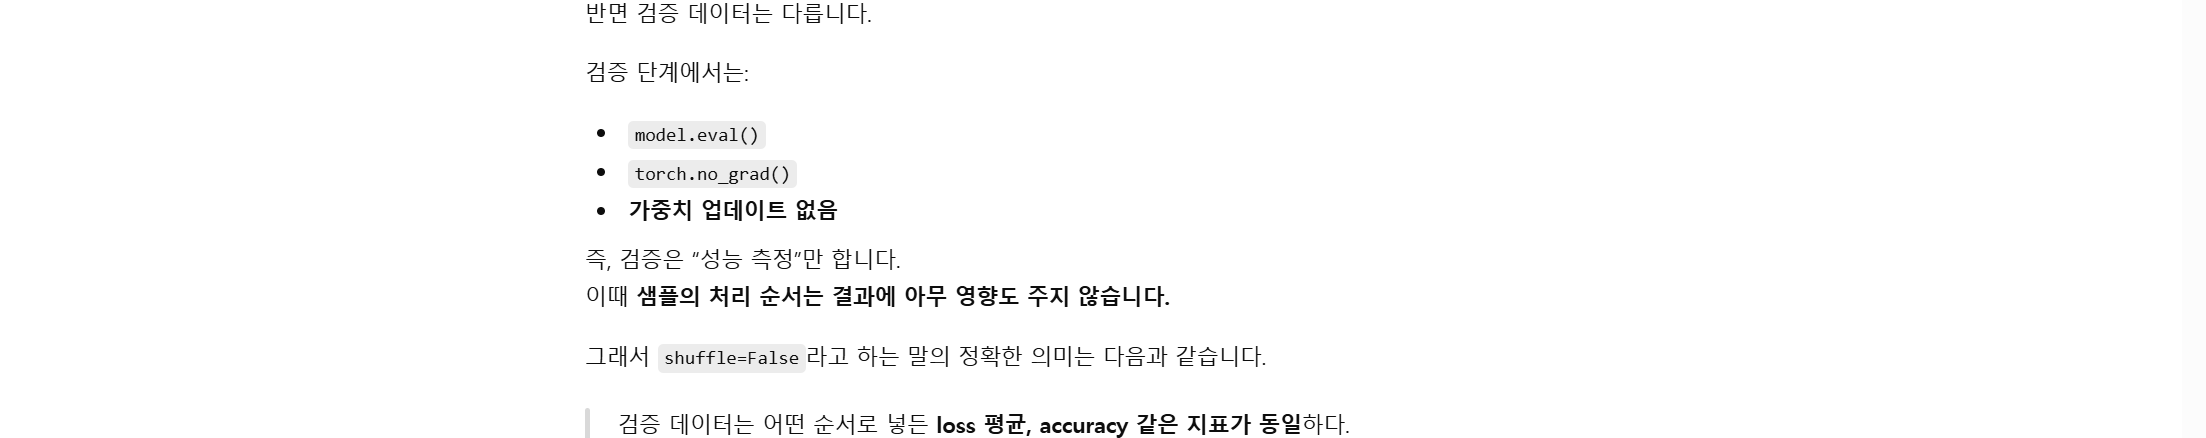
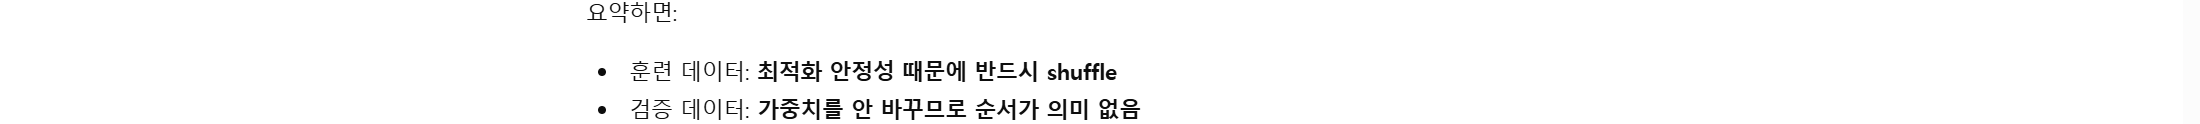

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(train_scaled, train_target)
val_dataset = TensorDataset(val_scaled, val_target)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [28]:
train_hist = []
val_hist = []
patience = 2
best_loss = -1
early_stopping_counter = 0

epochs = 20
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    train_loss = train_loss/len(train_loader)
    val_loss = val_loss/len(val_loader)
    train_hist.append(train_loss)
    val_hist.append(val_loss)
    print(f" 에포크: {epoch+1},",
            f"훈련 손실:{train_loss: .4f}, 검증 손실:{val_loss: .4f}")
    if best_loss == -1 or val_loss < best_loss:
        best_loss = val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), 'best_cnn_model.pt')
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f"{epoch+1} 번째 에포크에서 조기 종료되었습니다.")
            break

 에포크: 1, 훈련 손실: 0.5236, 검증 손실: 0.3445
 에포크: 2, 훈련 손실: 0.3365, 검증 손실: 0.2838
 에포크: 3, 훈련 손실: 0.2857, 검증 손실: 0.2620
 에포크: 4, 훈련 손실: 0.2528, 검증 손실: 0.2510
 에포크: 5, 훈련 손실: 0.2294, 검증 손실: 0.2331
 에포크: 6, 훈련 손실: 0.2070, 검증 손실: 0.2170
 에포크: 7, 훈련 손실: 0.1954, 검증 손실: 0.2243
 에포크: 8, 훈련 손실: 0.1764, 검증 손실: 0.2167
 에포크: 9, 훈련 손실: 0.1622, 검증 손실: 0.2147
 에포크: 10, 훈련 손실: 0.1504, 검증 손실: 0.2424
 에포크: 11, 훈련 손실: 0.1392, 검증 손실: 0.2341
11 번째 에포크에서 조기 종료되었습니다.


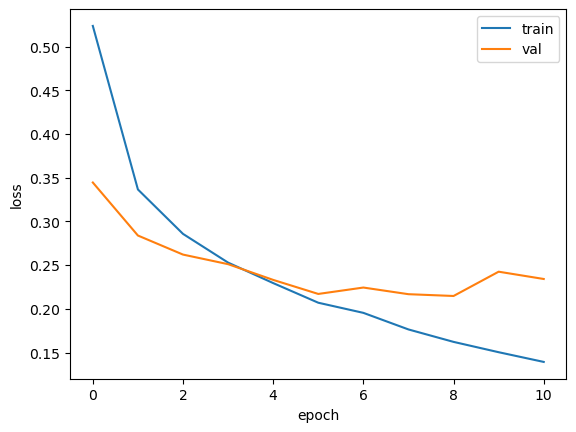

In [29]:
import matplotlib.pyplot as plt


plt.plot(train_hist, label='train')
plt.plot(val_hist, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#🧁early stopping으로 저장해 둔 최적 모델을 불러와서 검증 정확도를 계산하는 평가 단계

model.load_state_dict(torch.load('best_cnn_model.pt', weights_only=True))

model.eval()
corrects = 0
with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predicts = torch.argmax(outputs,1)
        corrects += (predicts == targets).sum().item()

accuracy = corrects/ len(val_dataset)
print(f"검증 정확도: {accuracy:.4f}")

검증 정확도: 0.9237


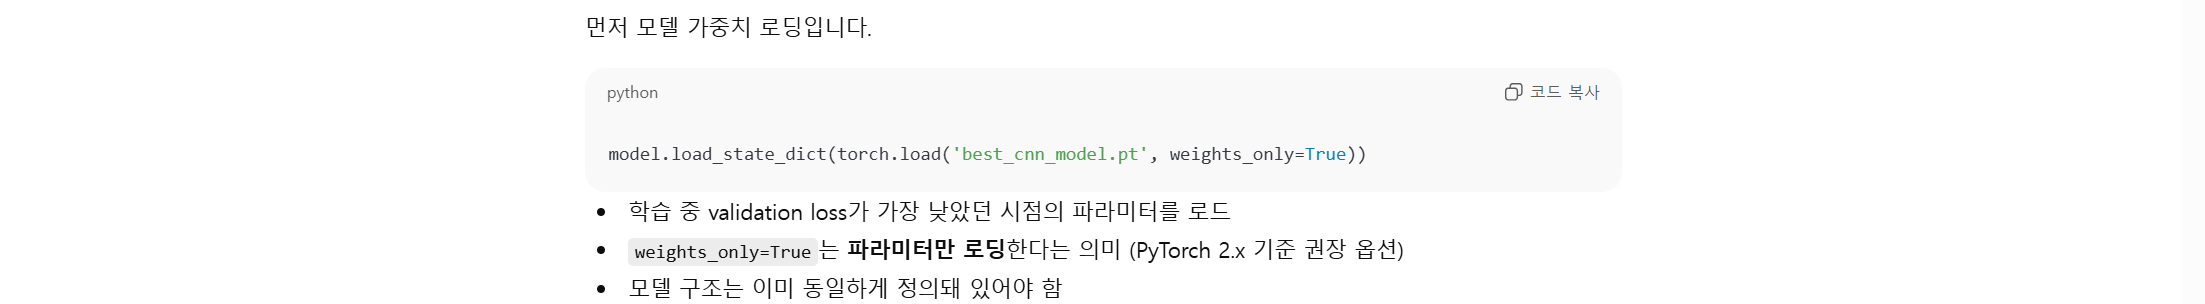
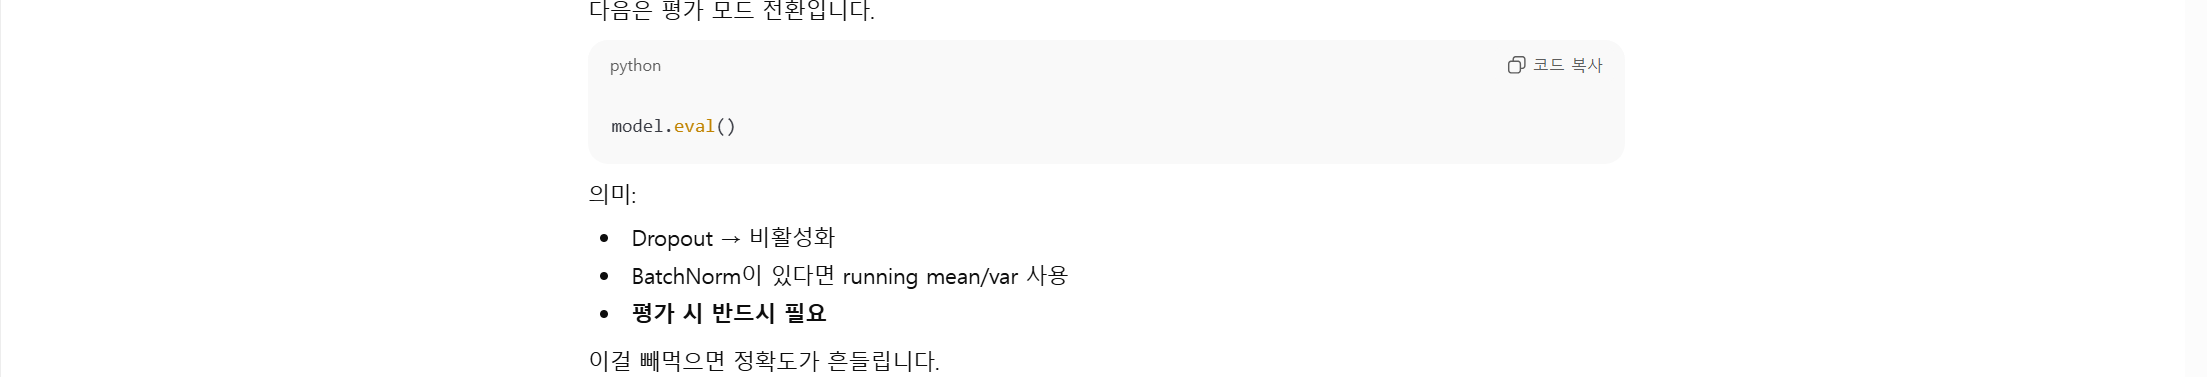
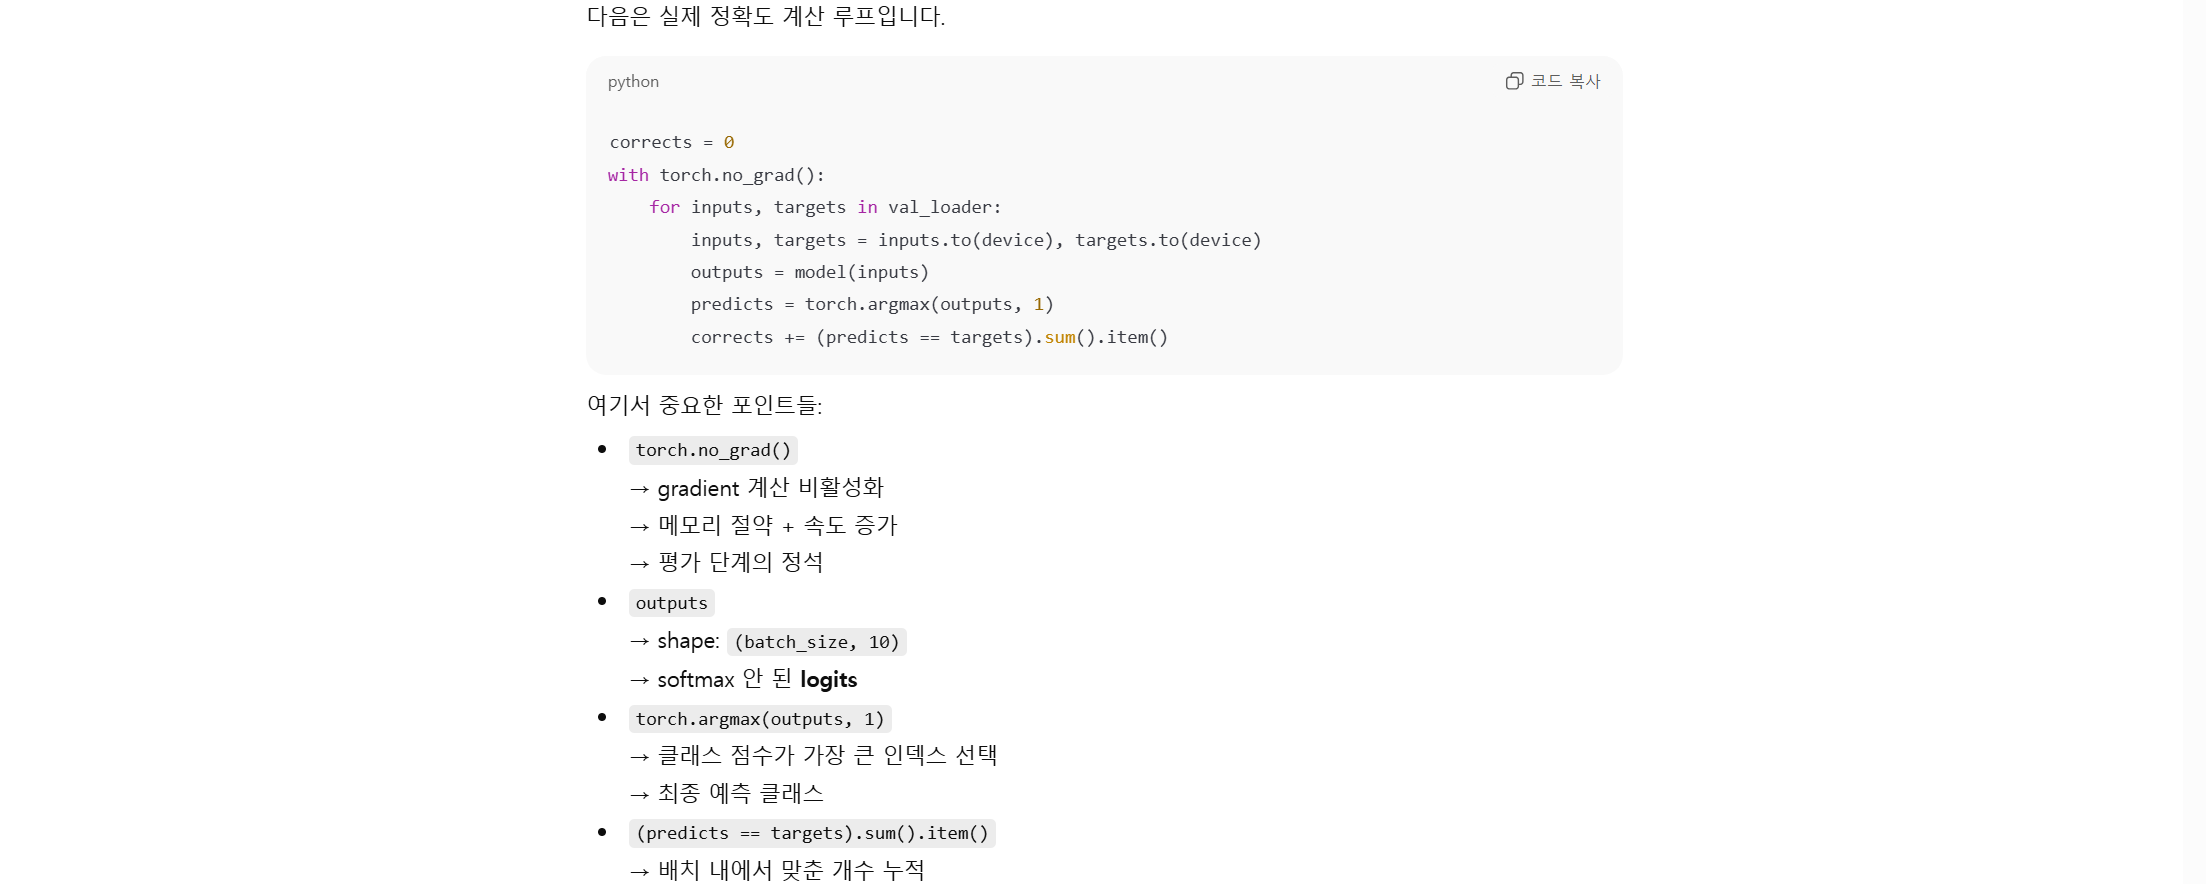
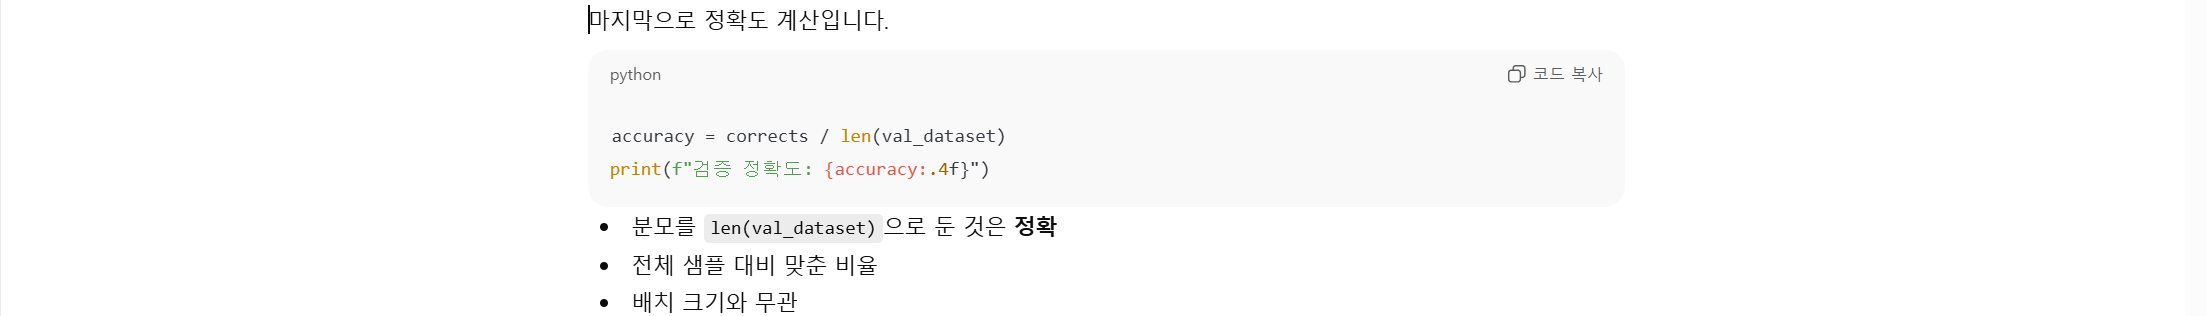

In [33]:
#🧁 훈련에 전혀 사용되지 않은 테스트 세트를 모델 평가용으로 준비하는 전처리 단계
test_scaled = fm_test.data.reshape(-1,1,28,28)/255.0
test_target = fm_test.targets

test_dataset = TensorDataset(test_scaled, test_target)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

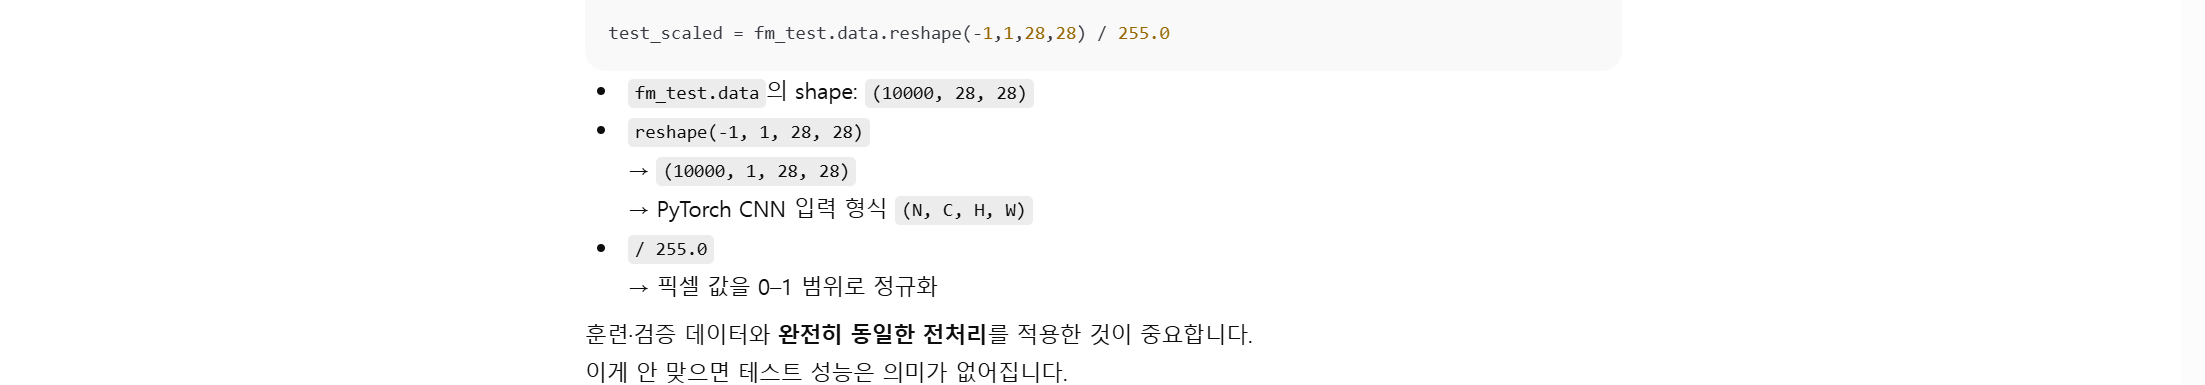
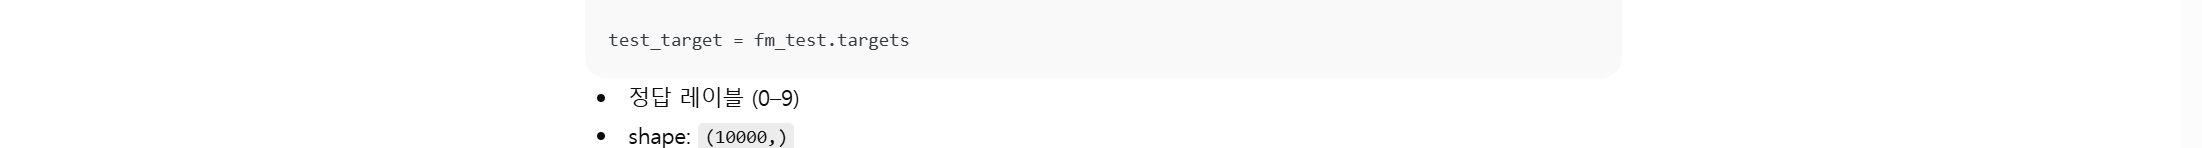
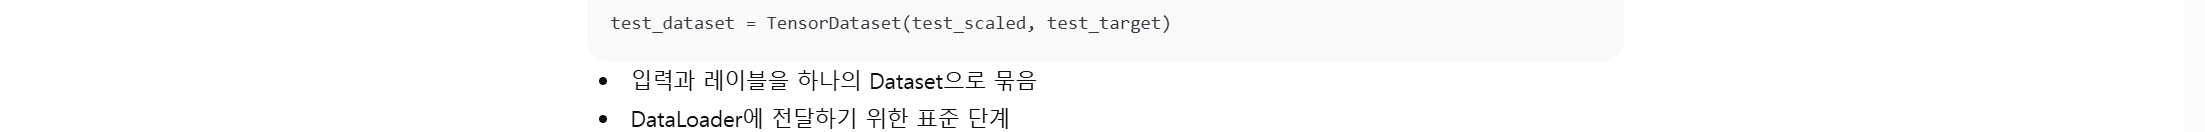
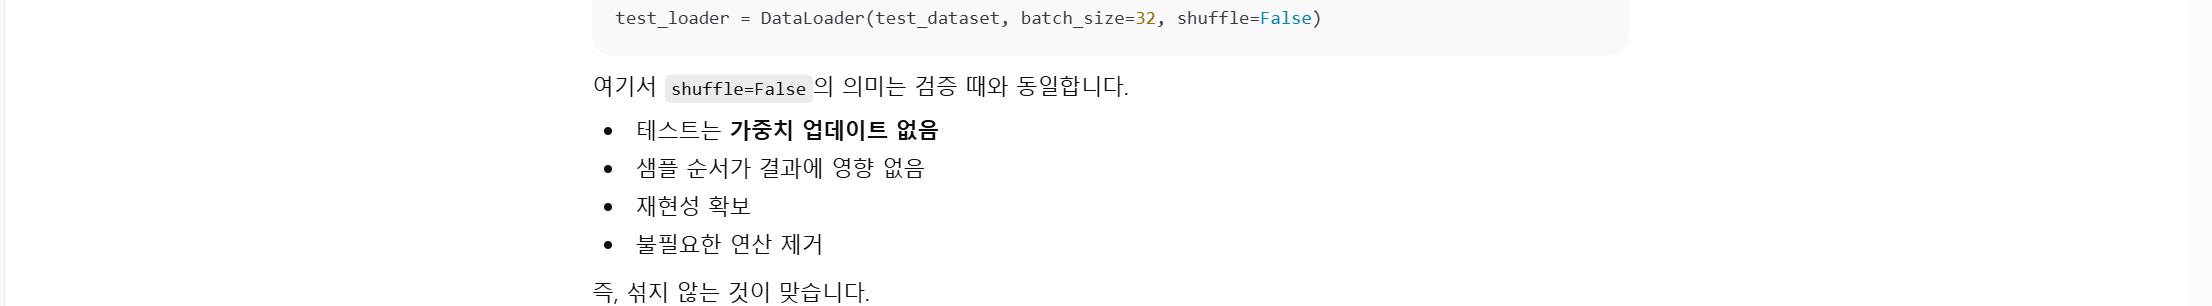
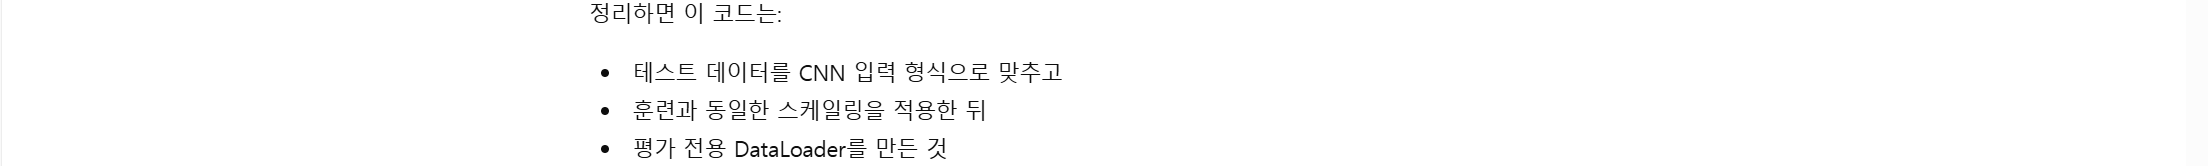

In [ ]:
#테스트 세트의 정확도
model.eval()
corrests = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predicts = torch.argmax(outputs,1)
        corrects += (predicts == targets).sum().item()

accuracy = corrects/ len(val_dataset)
print(f"검증 정확도: {accuracy:.4f}")


검증 정확도: 1.6874


테스트 세트의 정확도는 검증 세트보다 높게 나오면 그 의미        
그 상황은 이상하진 않지만, 해석은 조심해야 합니다. 그대로 의미를 정리하겠습니다.        

먼저 결론부터 말하면        
테스트 정확도가 검증 정확도보다 약간 높게 나오는 것은 충분히 발생 가능한 정상적인 현상입니다.       

이유를 구분해서 봐야 합니다.        
##### ☝️첫째, 표본 변동(sample variance)입니다.     
검증 세트는 훈련 데이터에서 20%를 무작위로 떼어낸 것입니다.     
테스트 세트는 완전히 별도의 데이터 분포에서 추출된 고정 세트입니다.     
두 세트의 난이도가 동일하다는 보장은 없습니다.      

Fashion-MNIST의 경우 실제로:        
검증 세트: 상대적으로 애매한 샘플이 더 많이 들어갈 수 있음      
테스트 세트: 평균적으로 더 “깨끗한” 샘플일 수 있음      
그래서 테스트 > 검증이 소폭 나타나는 것은 통계적으로 자연스럽습니다.        

##### ✌️둘째, 검증 세트의 역할입니다.
검증 세트는 모델 선택(early stopping, 하이퍼파라미터 튜닝)에 사용됩니다.        
이 과정에서 모델이 검증 세트에 약하게 맞춰질 가능성이 있습니다.     

이 경우:        
검증 성능은 보수적으로 측정됨       
테스트 성능이 약간 더 높게 나오는 일이 발생     

##### 👌셋째, 차이가 어느 정도냐가 핵심입니다.        

정상 범위:      
테스트 정확도 ≥ 검증 정확도     
차이: 0 ~ 1%p 내외      

의심해야 할 경우:       
테스트가 검증보다 2~3%p 이상 높음

반복 실험마다 큰 변동       
→ 이 경우 데이터 누수, 분할 오류를 점검해야 합니다.     

특히 아래는 반드시 확인해야 합니다.     
테스트 세트가 학습이나 early stopping에 사용되지 않았는가       
전처리가 훈련/검증과 동일한가       
model.eval() / torch.no_grad()를 사용했는가     
test set으로 하이퍼파라미터를 조정하지 않았는가     

         
검증으로 early stopping     
‼️‼️‼️‼️‼️‼️‼️   테스트는 마지막에 한 번만 평가   


마지막으로 한 줄 요약하면:      
테스트 > 검증: 가능, 정상       
훈련 ≫ 검증 ≈ 테스트: 좋은 모델         
테스트 ≫ 검증: 점검 필요

#### 08-3. 🍰 합성곱 신경망의 시각화       
합성곱 층이 이미지에서 어떤 것을 학습했는지 알아보기 위해 합성곱 층의 가중치와 특성 맵을 그림
으로 시각화

가중치 시각화       
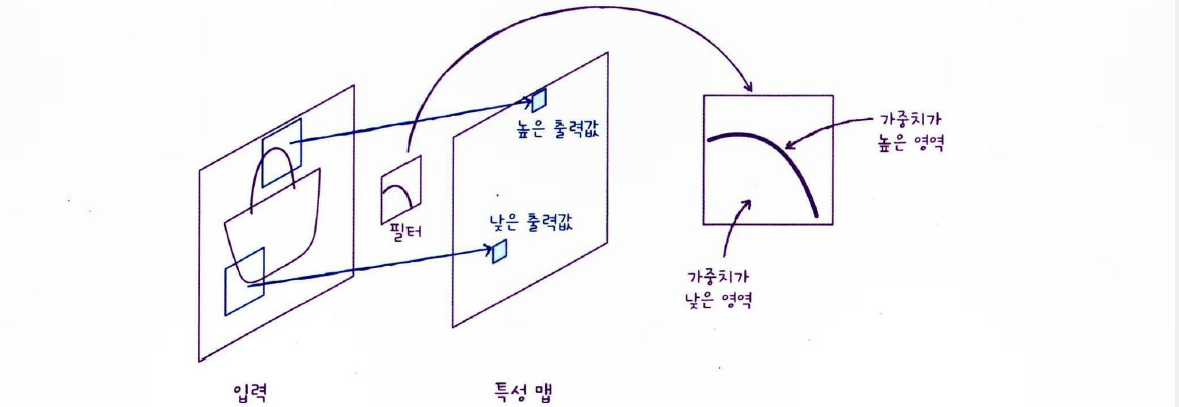
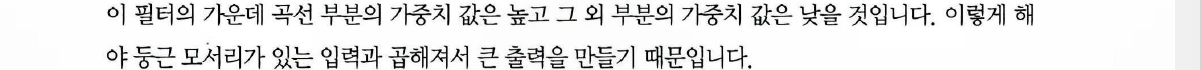


In [35]:
import keras
model = keras.models.load_model('best-cnn-model.keras')

In [36]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [ ]:
#첫 번째 합성곱 층의 가중치 조사
conv = model.layers[0] #layers속성의 첫번째 원소를 선택해 가중치와 절편의 크기 출력
print(conv.weights[0].shape, conv.weights[1].shape)
# conv.weight → 합성곱 필터
# conv.bias → 절편

(3, 3, 1, 32) (32,)


In [ ]:
#커널크기(3,3), 입력의 깊이 1, 실제커널크기(3,3,1), 필터개수 32
#weights의 첫번째 원소 가중치 크기 (3,3,1,32)
#weights의 두번째 원소 절편개수! 필터마다 1개의 절편이 있으므로(32,)

In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())
#이 가중치의 평균값은 0에 가깝고 표준편차는 0.25

-0.039055508 0.25180778


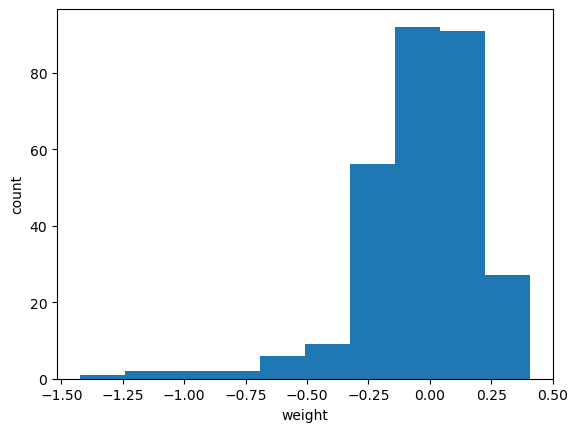

In [ ]:
#이 가중치가 어떤 분포를 가졌는지 히스토그램
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
#히스토그램을 그리기 위해 1차원 배열로 전달,
#넘파이 reshape 메서드로 conv_weights 배열을 1개의 열이 있는 배열로 변환
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

히스토그램을 보면 0을 중심으로 종 모양 분포를 띠고 있다

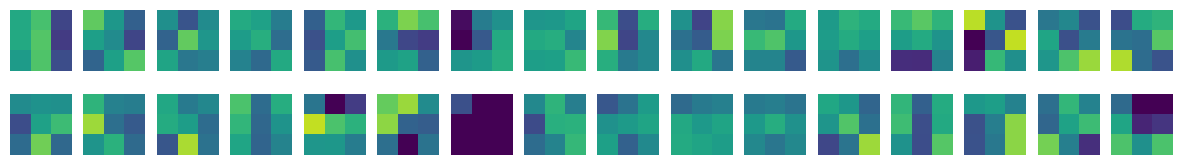

In [ ]:
#🧁첫 번째 합성곱 층이 학습한 필터(커널)를 시각화

fig, axs = plt.subplots(2,16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0, i*16 +j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

#0부터 i*16 + j번째까지의 가중치 값을 차례대로 출력
#i는 행 인덱스, j는 열 인덱스
#conv_weights[：,：,0,0] 에서 conv_weights[：,：,0,31]까지 출력
#어두운부분이 픽셀의 값이 낮다
#imshow () 함수는 배열에 있는 최댓값과 최솟값을 사용해 픽셀의 강도를 표현
#배열의 최댓값이면 가장 밝은 노란색

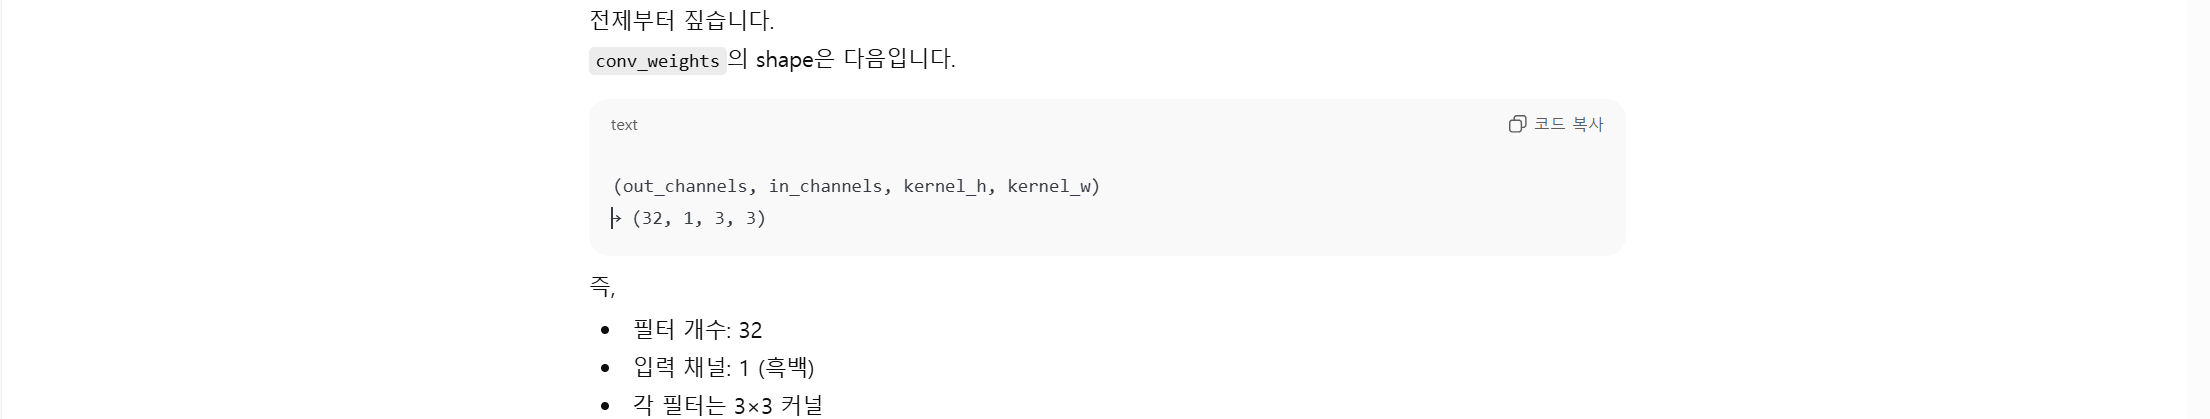

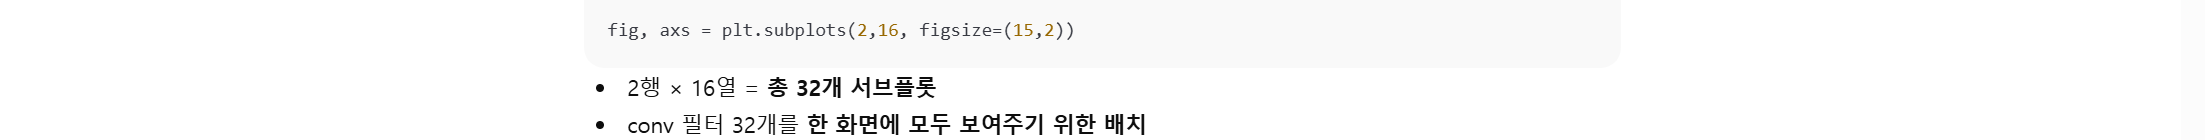
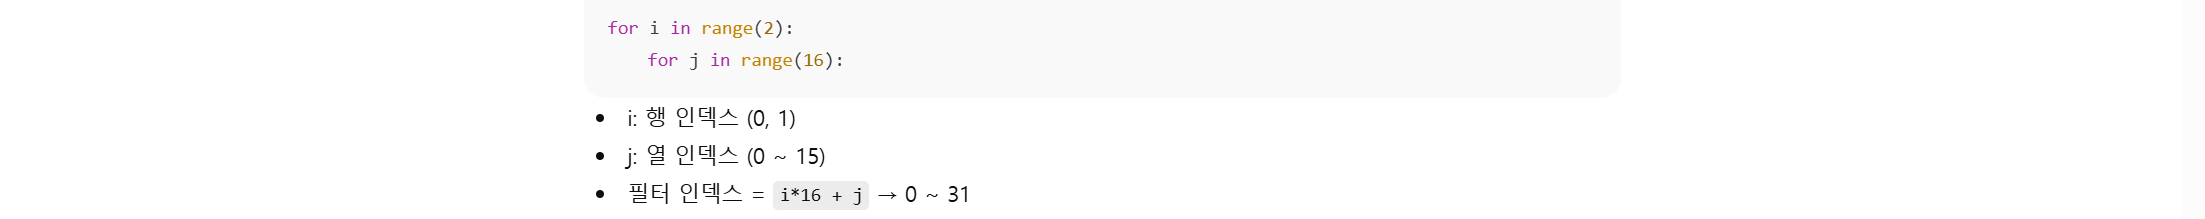
conv_weights[：,：,0,0] 에서 conv_weights[：,：,0,31]까지 출력
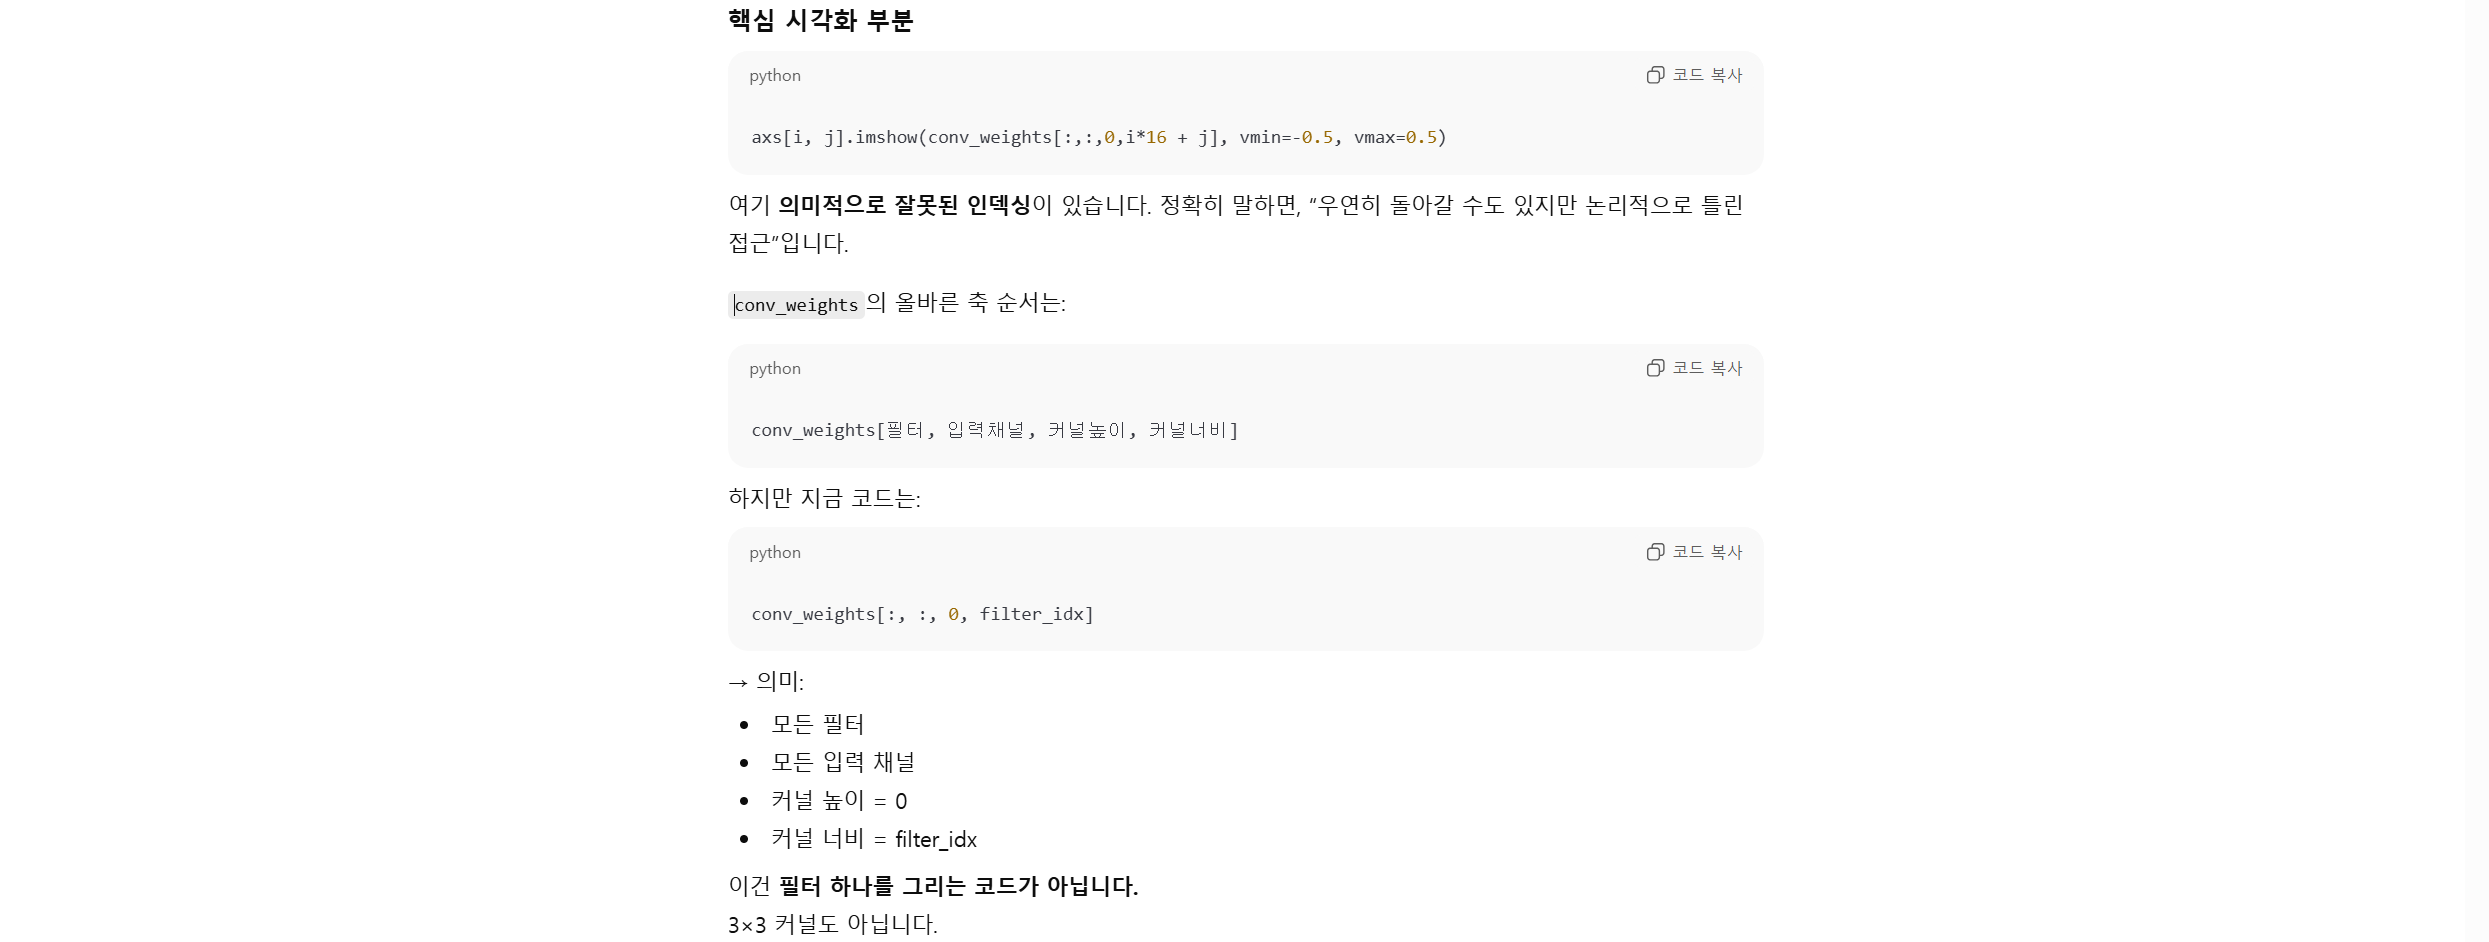
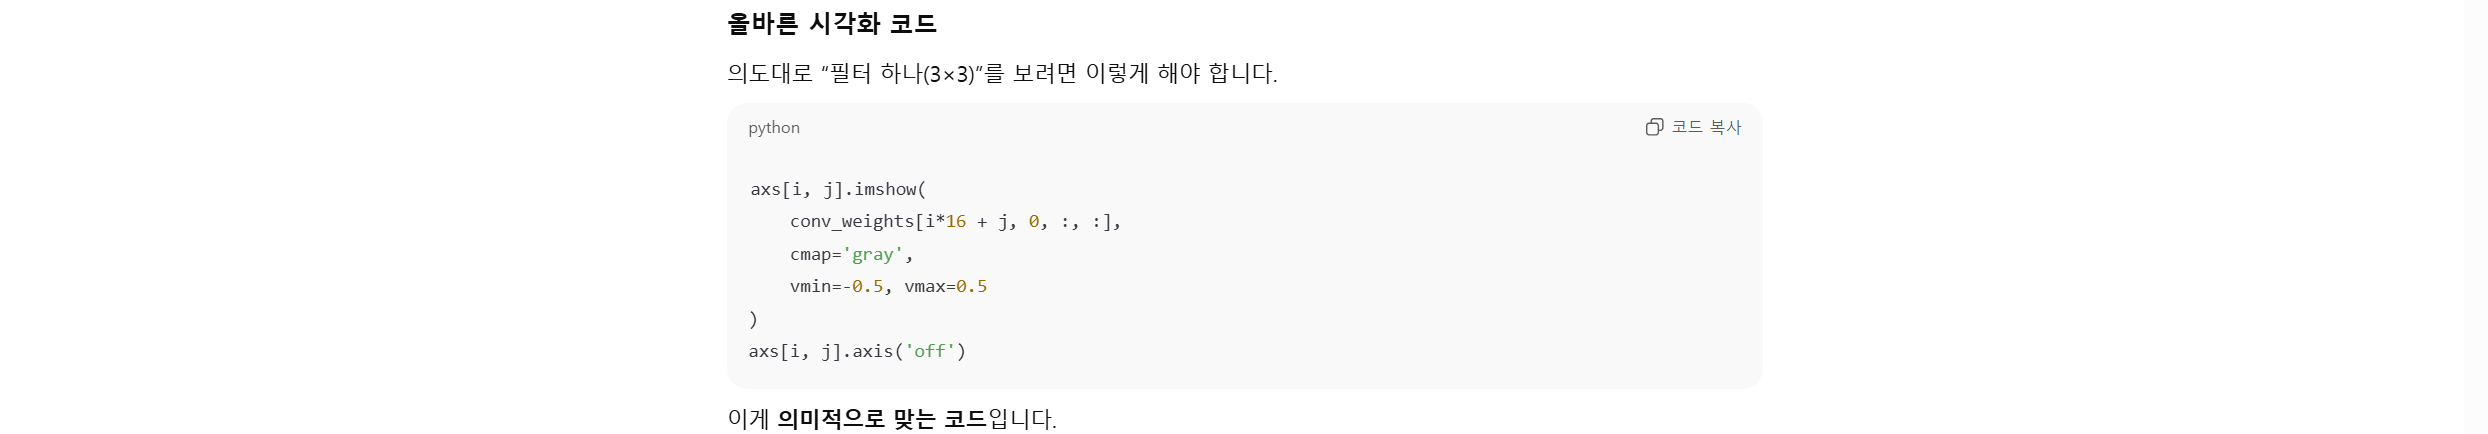
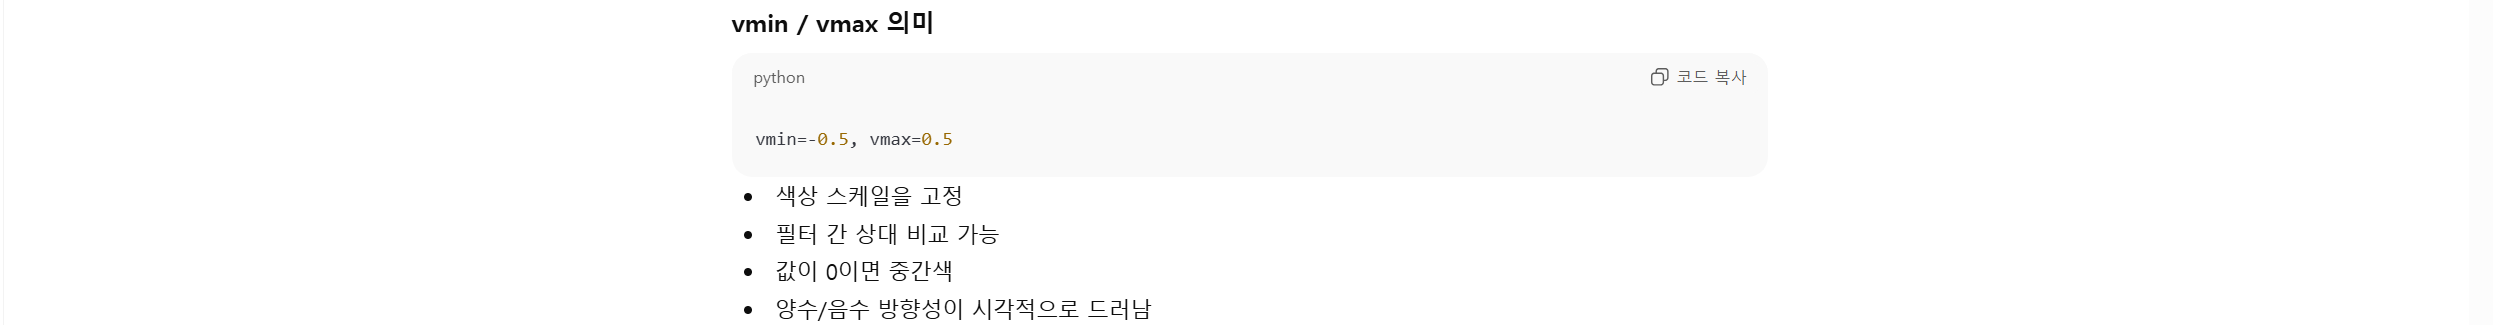

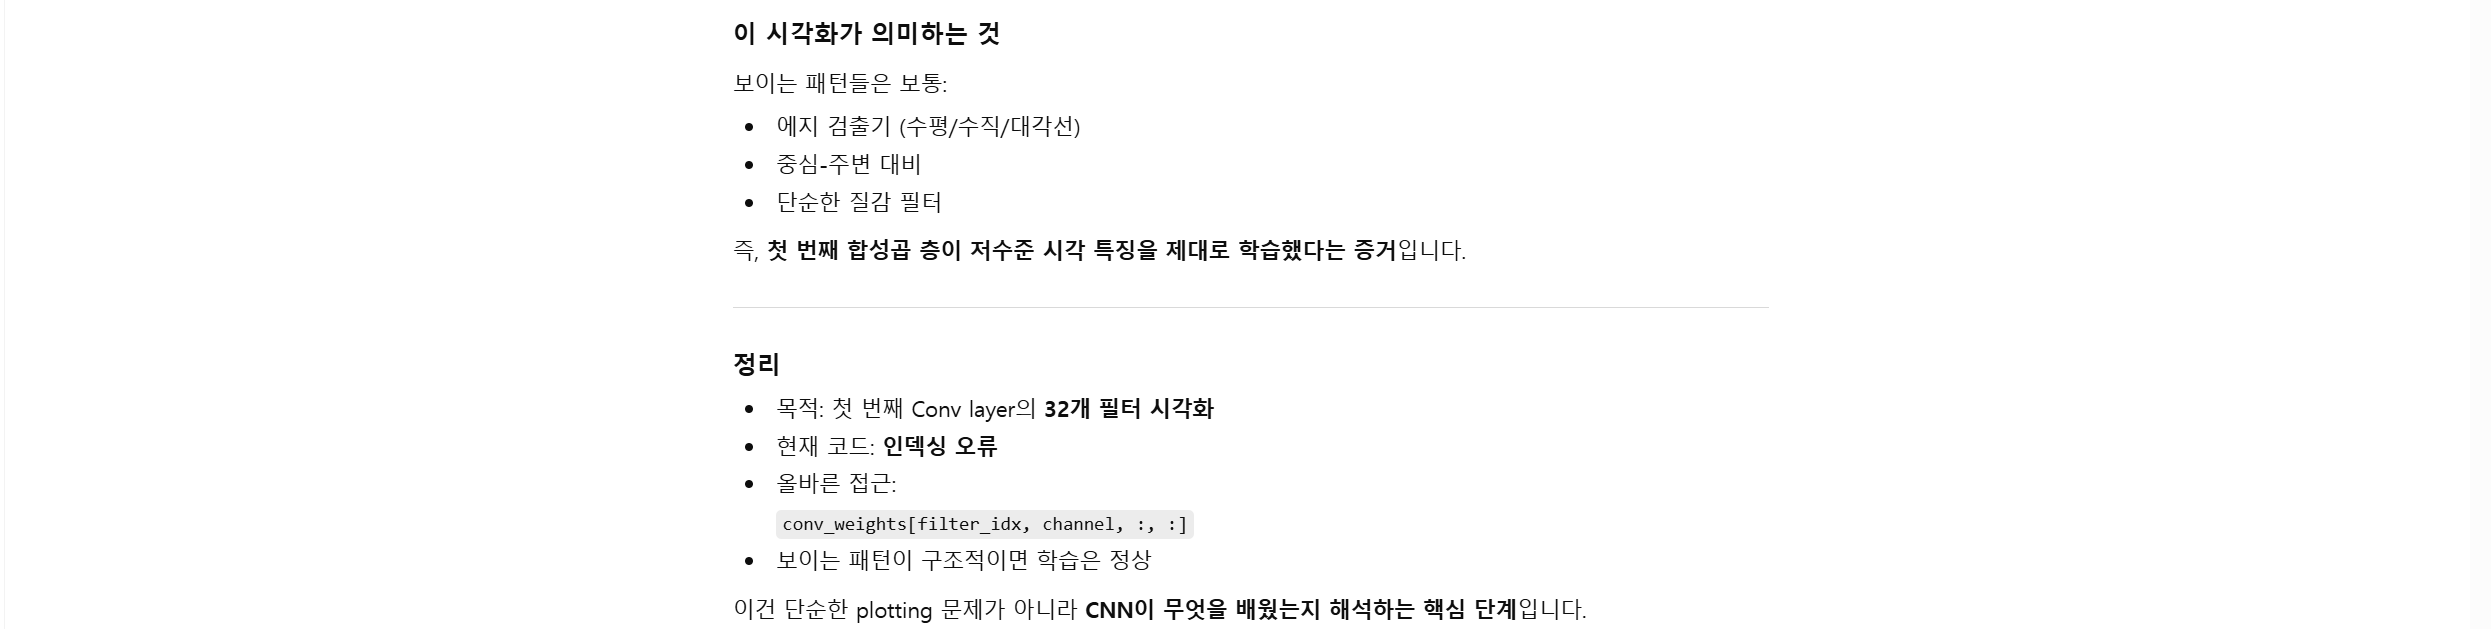

In [41]:
#훈련하지 않은 빈 합성곱 신경망
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28,28,1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                                          'relu', padding='same'))

In [ ]:
#첫 번째 층(즉 Conv2D 층)의 가중치를 no_training_conv 변수에 저장

no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
# 이 가중치의 평균과 표준편차를 확인
# 넘파이 배열로 만든 다음 mean(), std() 메서드를 호출

no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.00818684 0.082604006


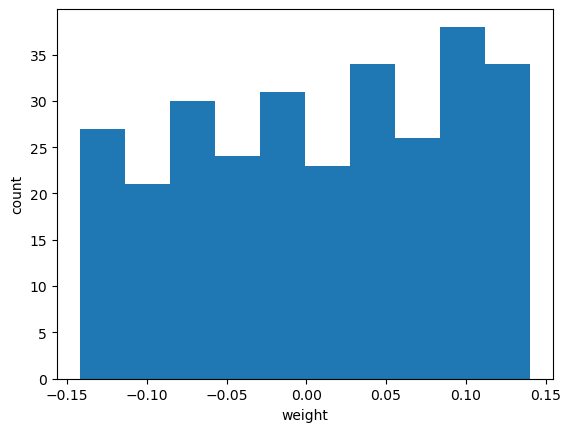

In [44]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

#대부분의 가중치가 -0.15〜0.15 사이에 있고 비교적 고른 분포
#케라스가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문

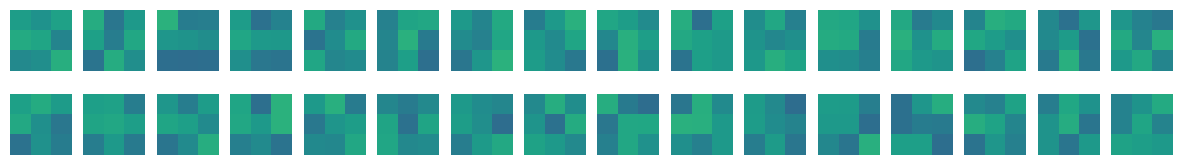

In [45]:
#이 가중치 값을 맷플롯립의 imshow() 함수를 사용해 이전처럼 그림으로 출력
fig, axs = plt.subplots(2,16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

##전체적으로 가중치가 밋밋
##이전 가중치와 비교, 합성곱 신경망이 패션 MNIST 데이터셋의 분류 정확도를 높이기 위해 유용한 패턴을 학습했다

🍦🧁🍦🧁        
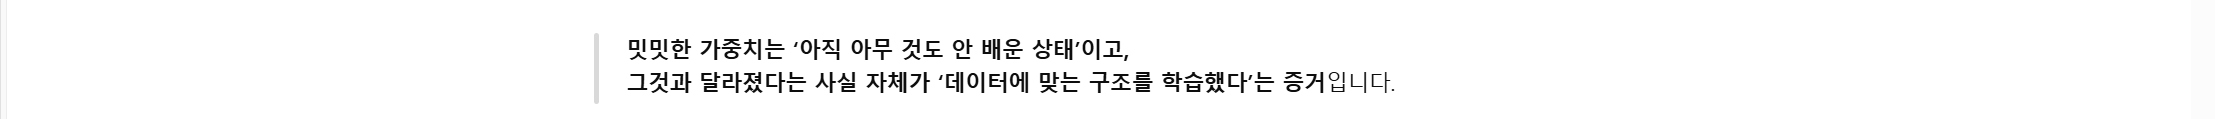
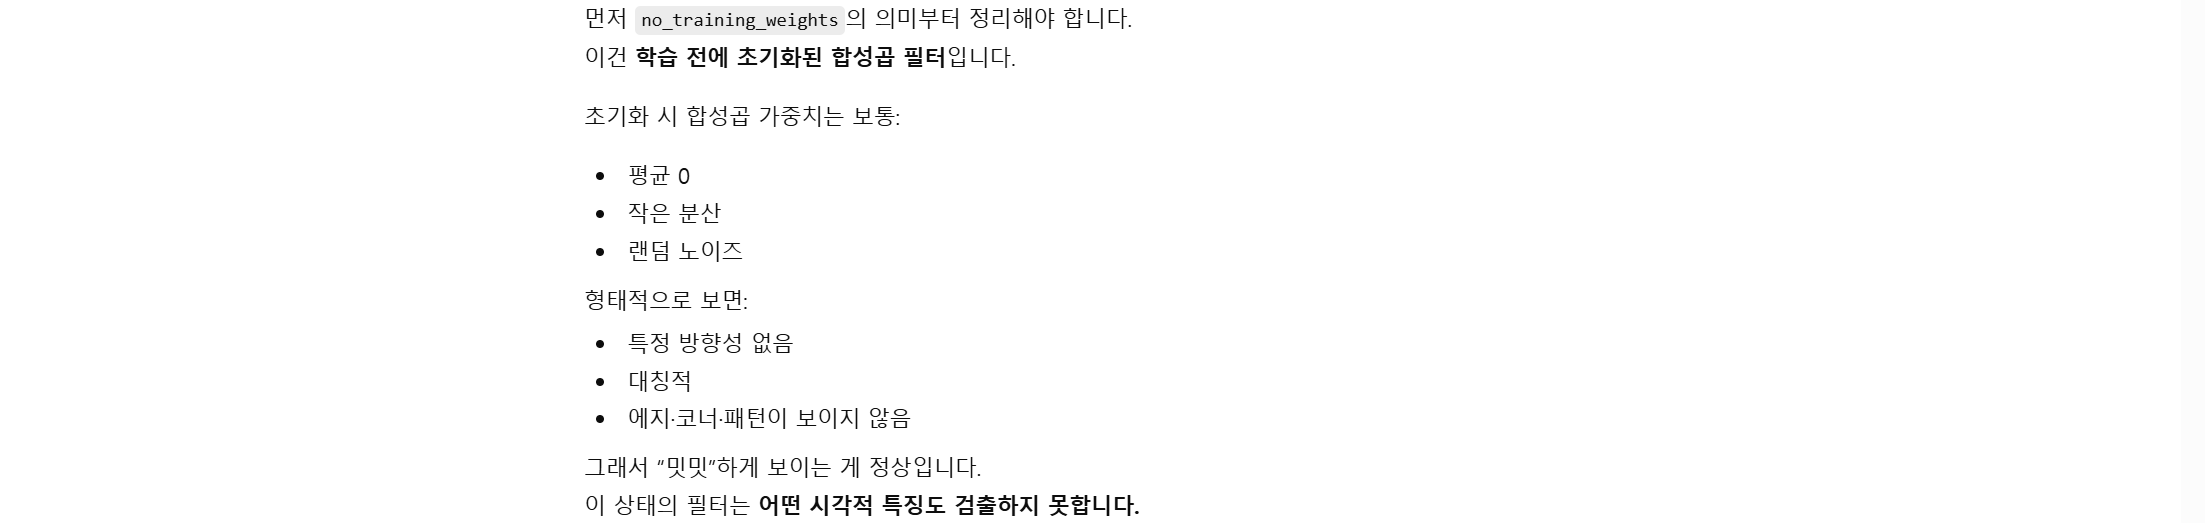
🍦🧁🍦🧁
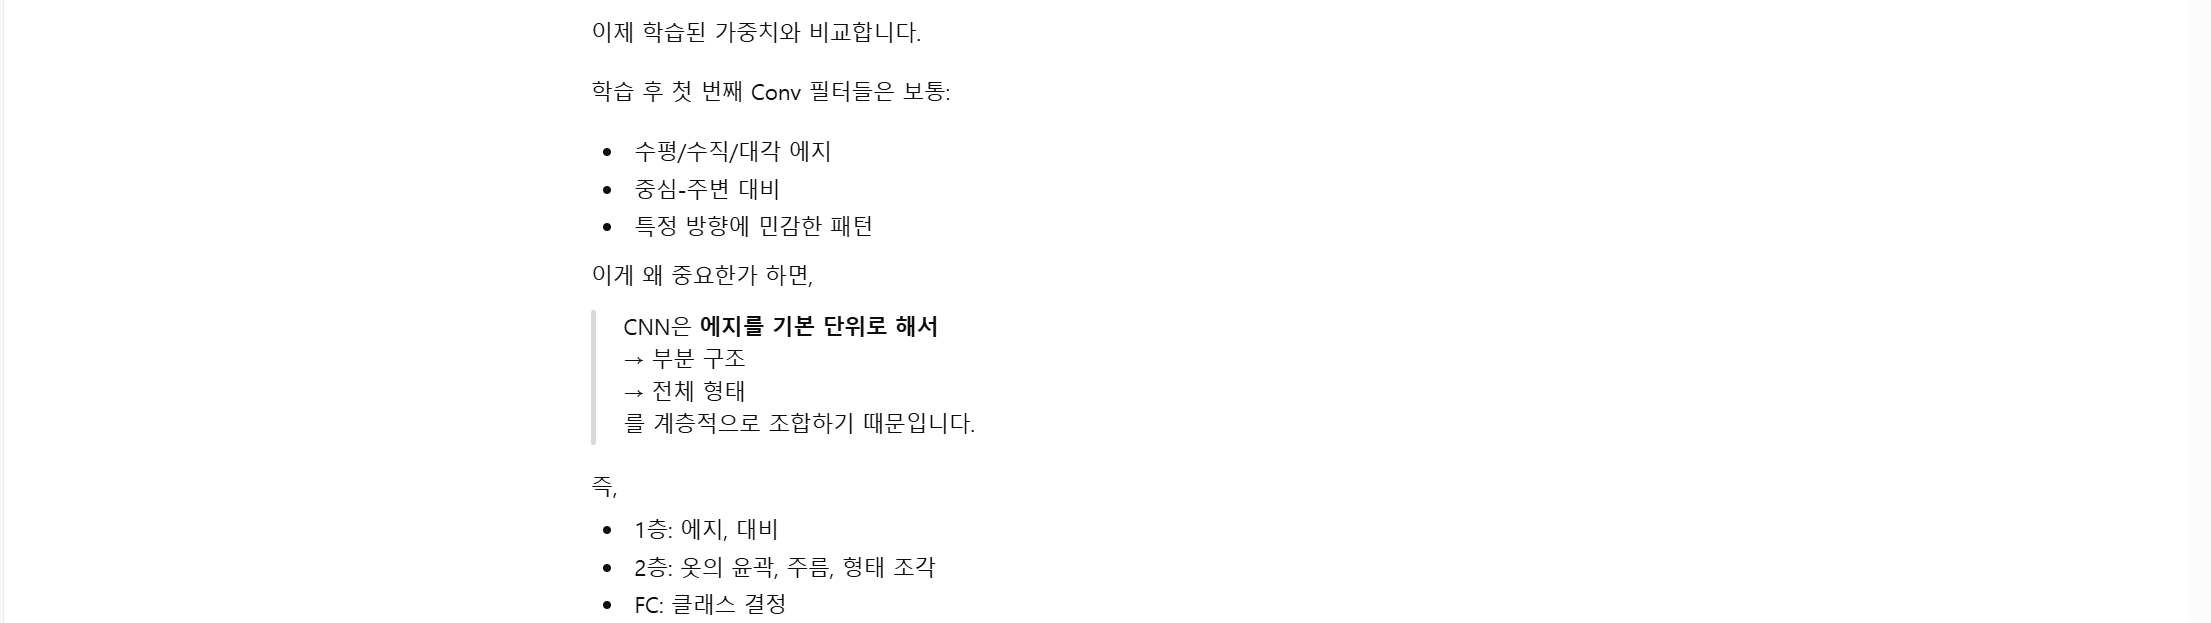
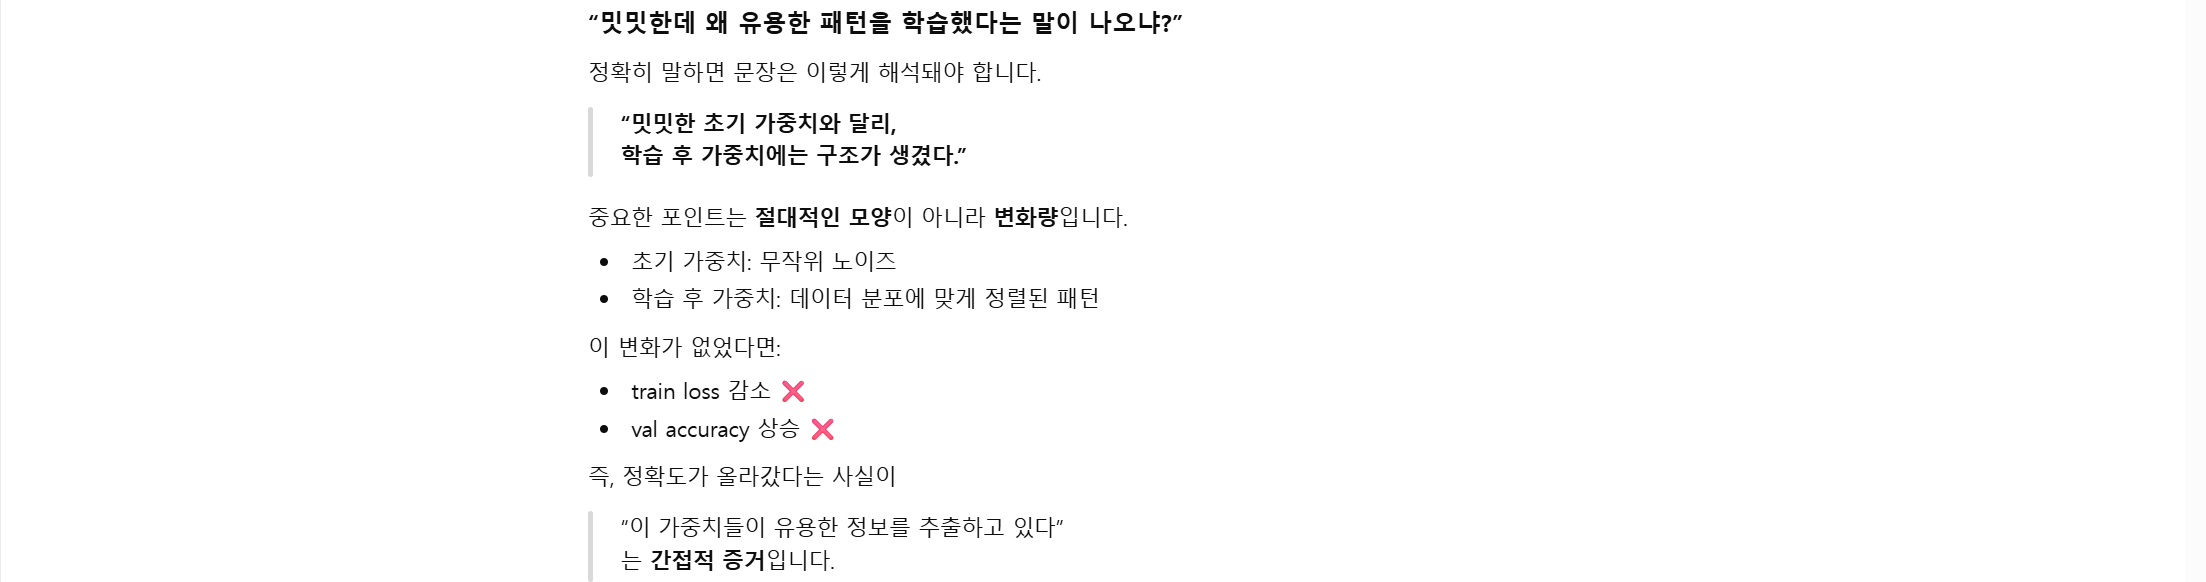
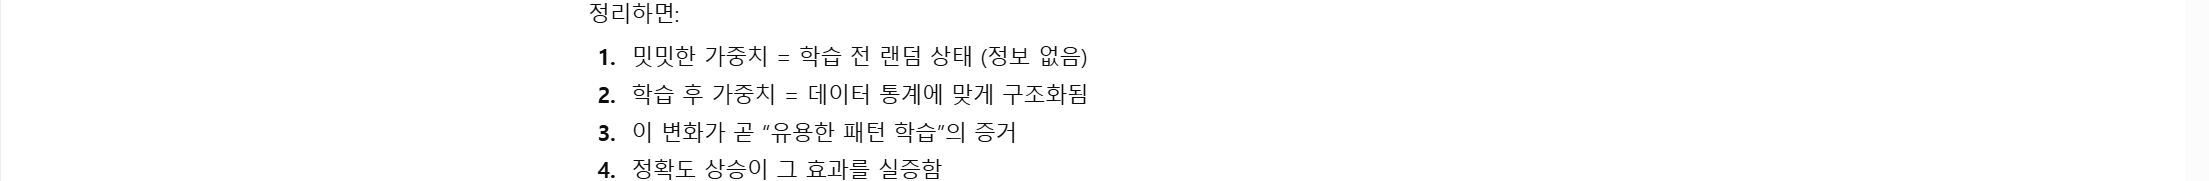

##### 함수형 API
두 번째 방법은 합성곱 층에서 출력된 특성 맵

In [46]:
#함수형 API :케라스의 Model 클래스를 사용하여 모델 만듦
#Dense 층 2개로 이루어진 완전 연결 신경망을 함수형 API로 구현

inputs = keras.Input (shape= (784,))
densel = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')

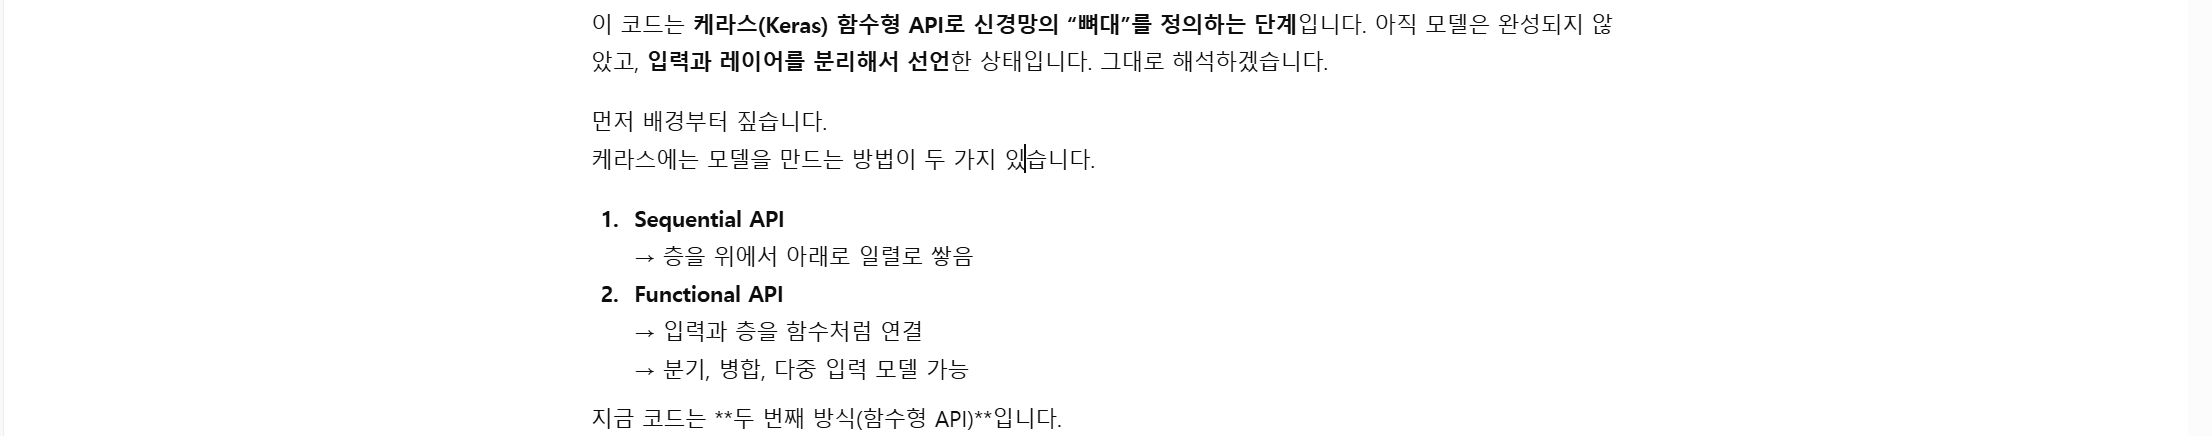

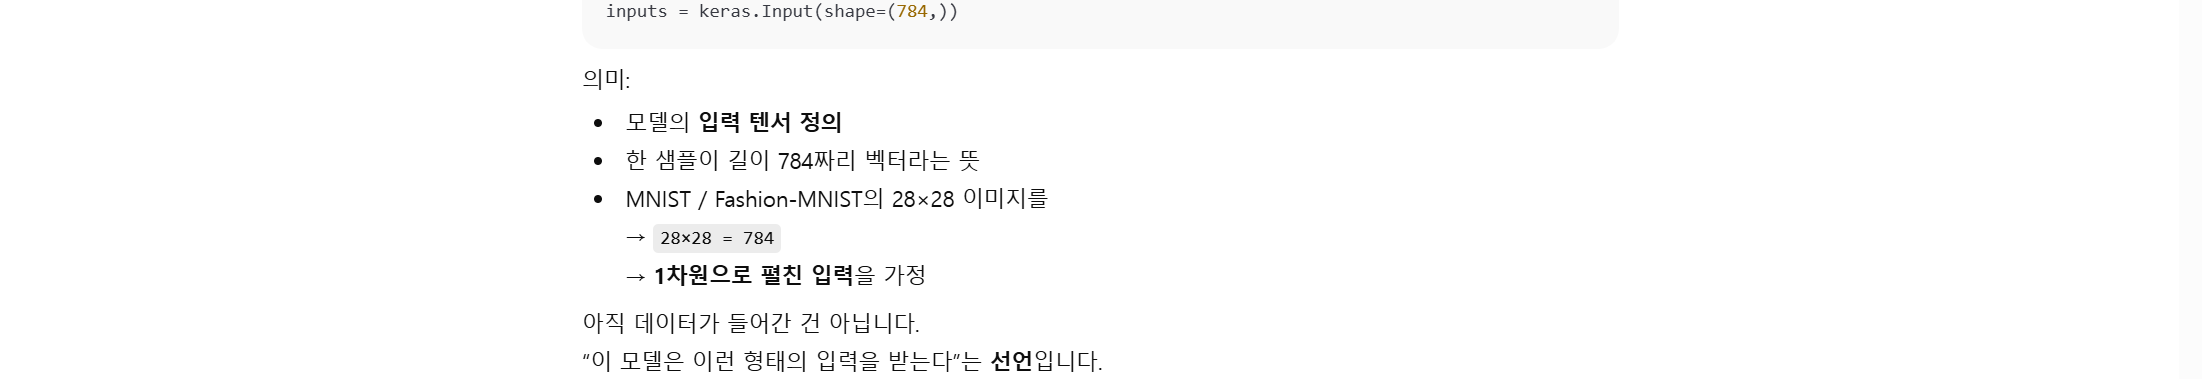
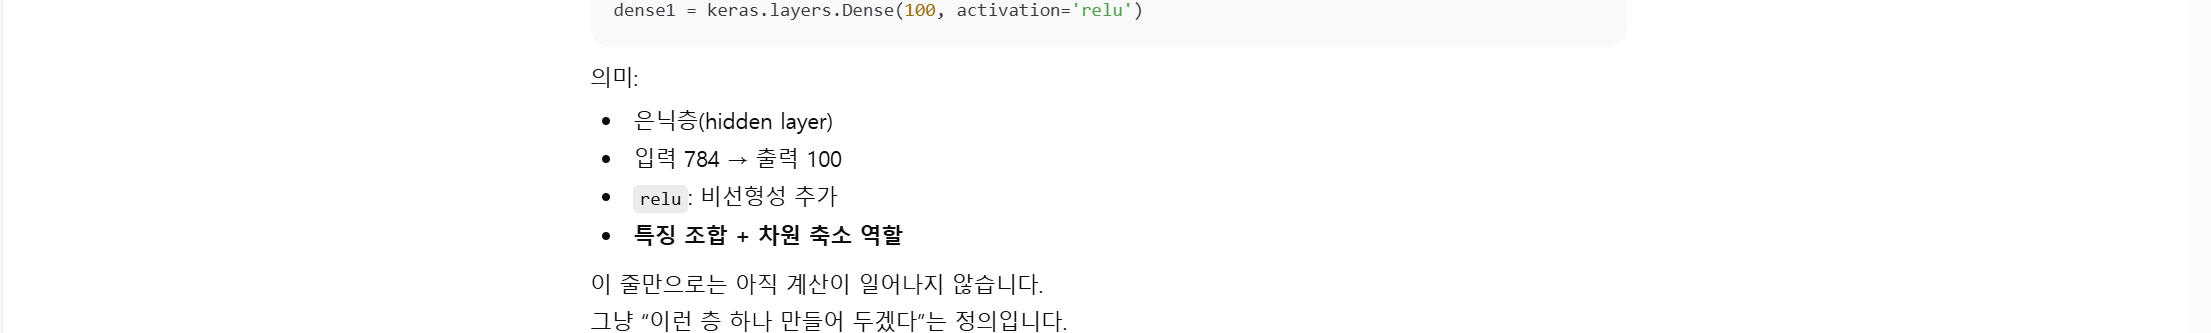
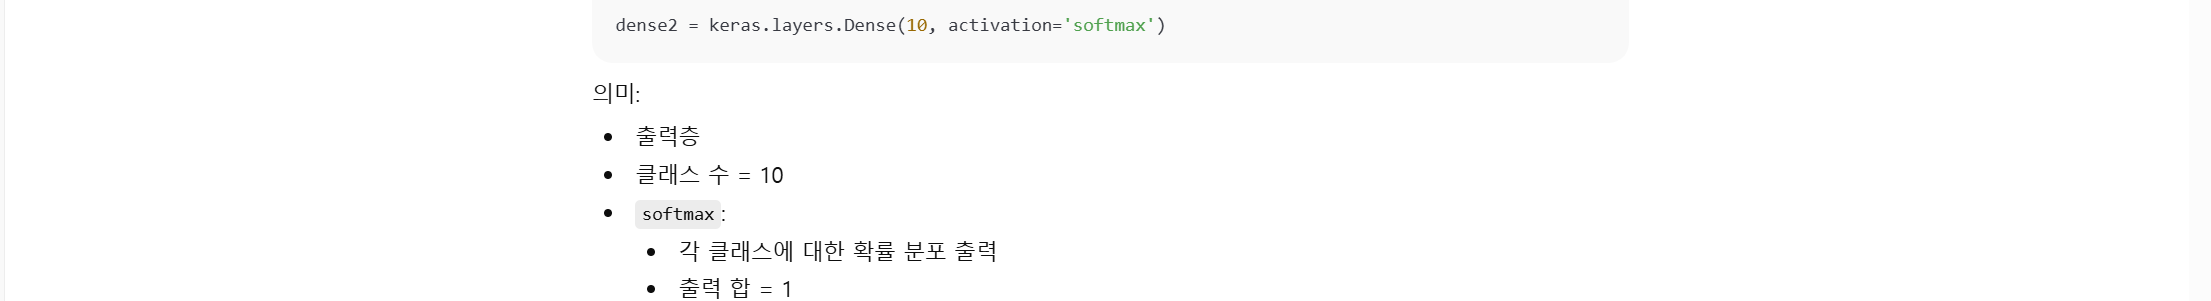

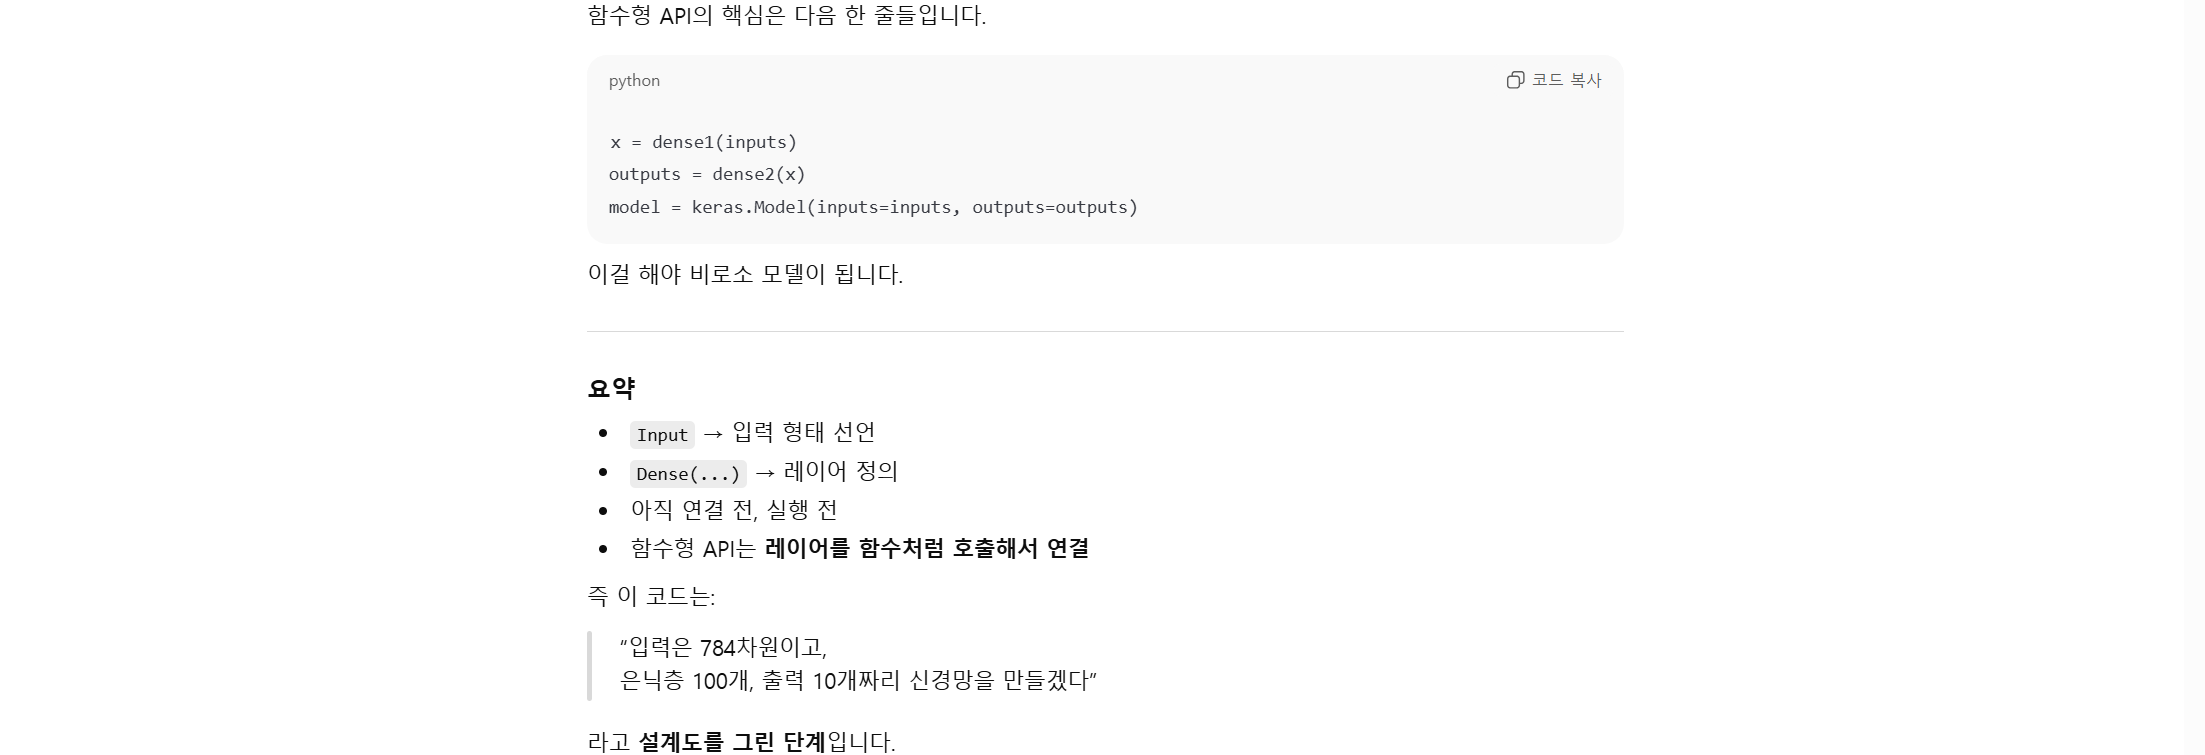

In [47]:
hidden = densel(inputs)
#앞의 코드를 실행하면 영리하게도 입력값inputs를 Dense층에 통과시킨 후 
#출력값 hidden을 만들어 준다.

In [48]:
#두 번째 층 호출! : 이때는 첫번째 층의 출력을 입력으로 사용
outputs = dense2(hidden)

In [49]:
#그다음 inputs와 outputs을 Model 클래스로 연결
func_model = keras.Model(inputs, outputs)

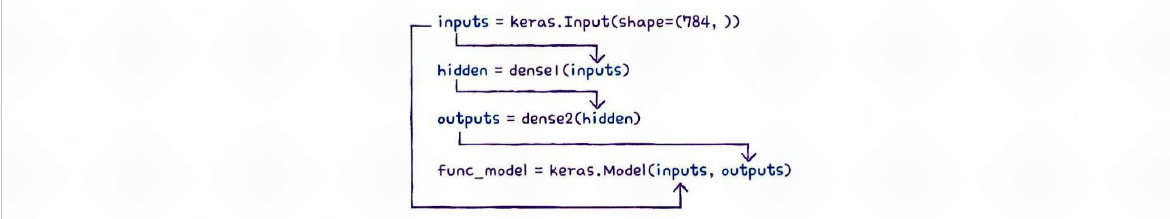

In [50]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer>]


In [ ]:
#model.inputs의 첫 번째 원소와 model.layers[0].output을 연결하는 새로운 conv_acti 모델

conv_acti= keras.Model(model.inputs[0], model.layers[0].output)

##### 특성 맵 시각화

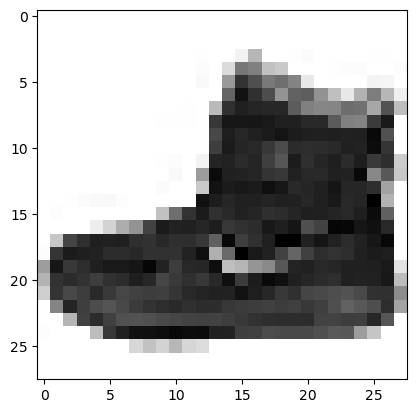

In [52]:
#훈련 세트에 있는 첫 번째 샘플그려보기

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [53]:
#앵클 부츠. 이 샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵을 출력
#predict() 메서드는 항상 입력의 첫 번째 차원이 배치 차원일 것으로 기대
#하나의 샘플을 전달하더라도 꼭 첫 번째 차원을 유지

ankle_boot = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


In [ ]:
#conv_acti.predict () 메서드가 줄력한 feature_maps의 크기 확인

print(feature_maps.shape)

#🏠결과
# 세임 패딩과 32개의 필터를 사용한 합성곱 층의 출력이므로(28, 28, 32)
# 첫 번째 차원은 배치 차원이라는 점
# 샘플을하나 입력했기 때문에 1

(1, 28, 28, 32)


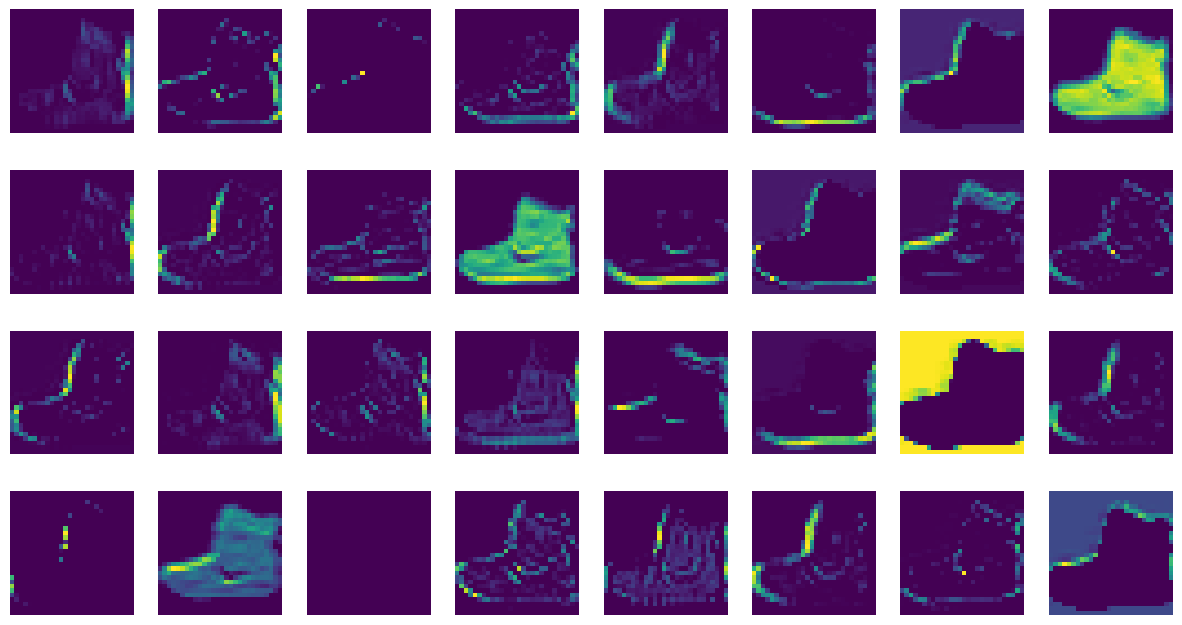

In [ ]:
#총 32개의 특성 맵 → 4개의 행으로 그리기 

fig, axs = plt.subplots(4, 8, figsize=(15,8)) # 4행 8열
for i in range(4): 
    for j in range(8): 
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

# 행 인덱스 i: 0 ~ 3
# 열 인덱스 j: 0 ~ 7
# 실제 채널 인덱스 = i*8 + j → 0 ~ 31   

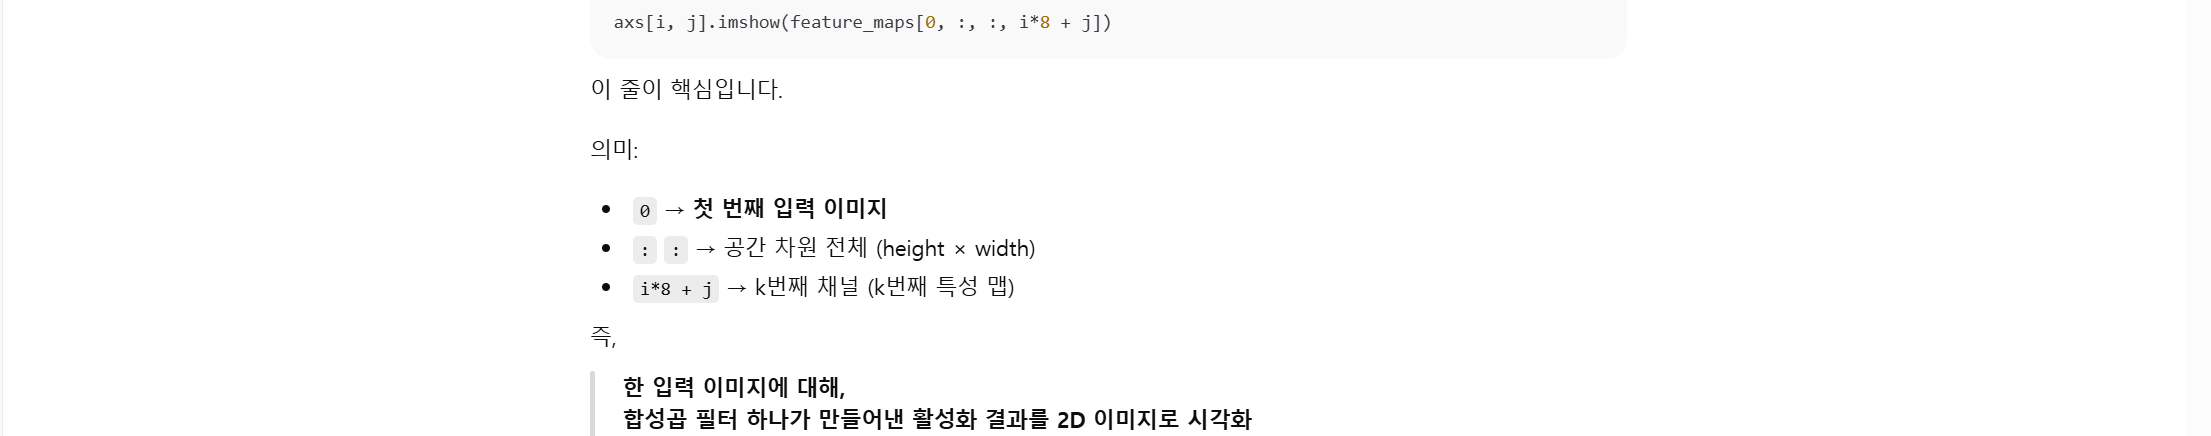
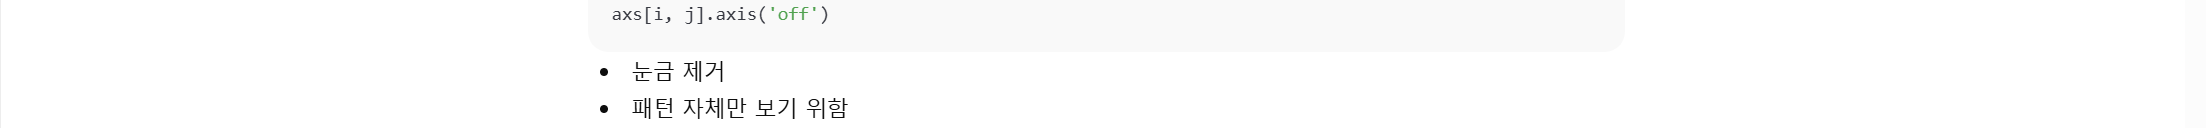

밝은 부분: 해당 필터가 강하게 활성화된 위치      
어두운 부분: 해당 필터가 거의 반응하지 않은 위치     

In [57]:
#두 번째 합성곱 층이 만든 특성 맵
conv2_acti= keras.Model(model.inputs[0], model.layers[2].output)

In [58]:
#앵클 부츠 샘플을 conv2_acti 모델의 predict () 메서드에 전달
feature_maps = conv2_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


In [59]:
#첫 번째 풀링 층에서 가로세로 크기가 절반으로 줄었고, 두 번째 합성곱 층의 필터 개수는 64개
print(feature_maps.shape)

(1, 14, 14, 64)


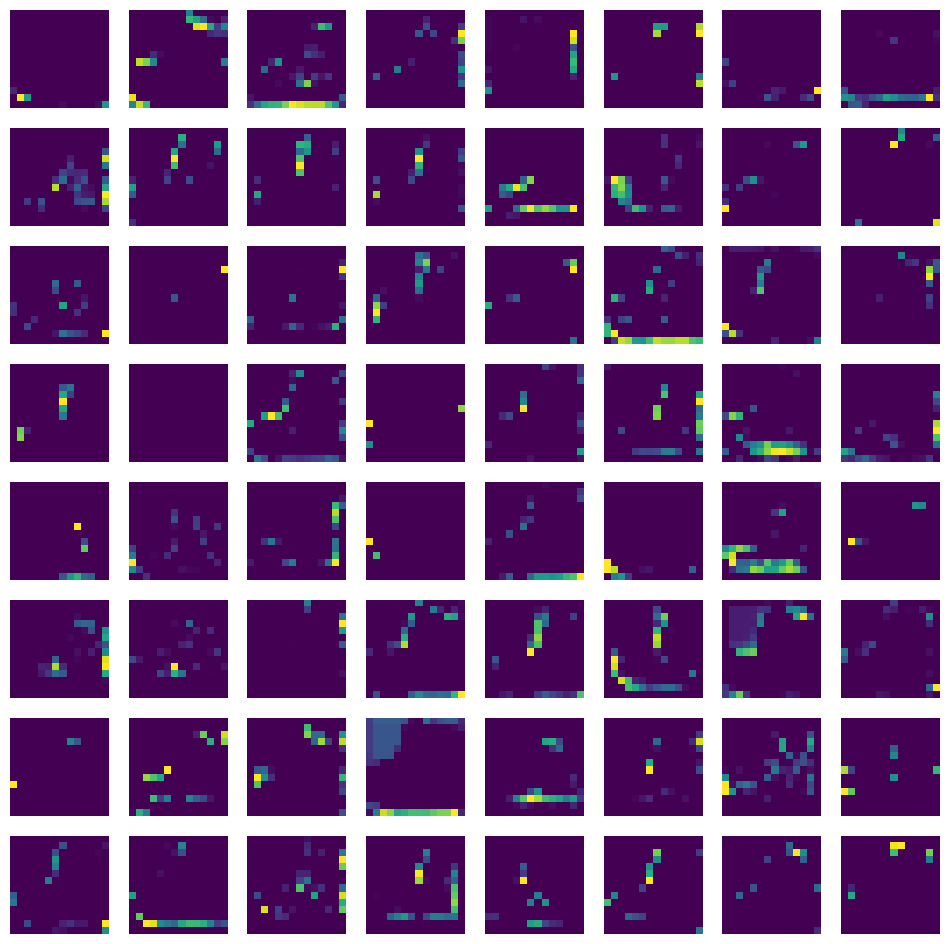

In [60]:
#64개의 특성 맵을 8개씩 나누어 imshow() 함수
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

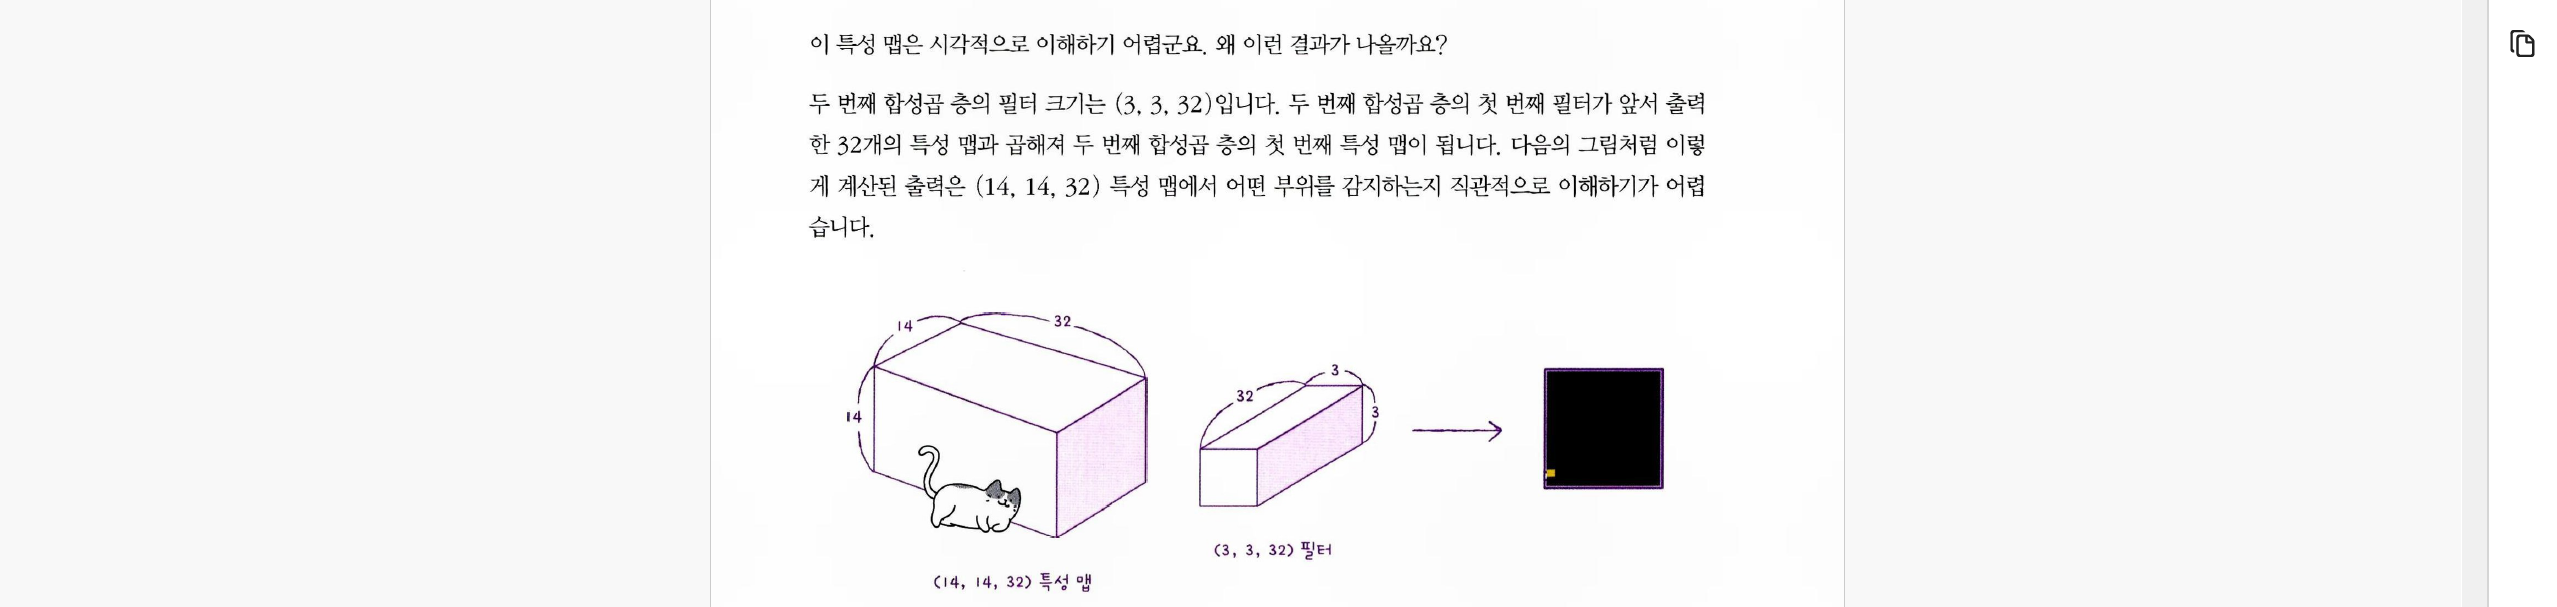

In [ ]:
# ⚡합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고 
# 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습 ⚡

In [ ]:
# """# 합성곱 신경망의 시각화 """
# """## 가중치 시각화 """
# import keras
# model = keras.models.load_model('best-cnn-model.keras')

# model.layers
# conv = model.layers[0]
# print(conv.weights[0].shape, conv.weights[1].shape)
# conv_weights = conv.weights[0].numpy()
# print(conv_weights.mean(), conv_weights.std())

# import matplotlib.pyplot as plt

# plt.hist(conv_weights.reshape(-1,1))
# plt.xlabel('weight')
# plt.ylabel('count')
# plt.show()

# fig, axs = plt.subplots(2,16, figsize=(15,2))
# for i in range(2):
#     for j in range(16):
#         axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
#         axs[i, j].axis('off')
# plt.show()

# no_training_model = keras.Sequential()
# no_training_model.add(keras.layers.Input(shape=(28,28,1)))
# no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
#                                           'relu', padding='same'))
# no_training_conv = no_training_model.layers[0]
# print(no_training_conv.weights[0].shape)

# no_training_weights = no_training_conv.weights[0].numpy()
# print(no_training_weights.mean(), no_training_weights.std())

# plt.hist(no_training_weights.reshape(-1, 1))
# plt.xlabel('weight')
# plt.ylabel('count')
# plt.show()

# fig, axs = plt.subplots(2,16, figsize=(15,2))
# for i in range(2):
#     for j in range(16):
#         axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
#         axs[i, j].axis('off')
# plt.show()

# """## 함수형 API"""
# inputs = keras.Input (shape= (784,))
# densel = keras.layers.Dense(100, activation='relu')
# dense2 = keras.layers.Dense(10, activation='softmax')

# hidden = densel(inputs)
# outputs = dense2(hidden)

# func_model = keras.Model(inputs, outputs)
# print(model.inputs)

# conv_acti= keras.Model(model.inputs[0], model.layers[0].output)

# """##특성 맵 시각화"""
# (train_input, train_target), (test_input, test_target) =\
#     keras.datasets.fashion_mnist.load_data()
# plt.imshow(train_input[0], cmap='gray_r')
# plt.show()

# ankle_boot = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
# feature_maps = conv_acti.predict(ankle_boot)
# print(feature_maps.shape)

# fig, axs = plt.subplots(4, 8, figsize=(15,8))
# for i in range(4):
#     for j in range(8):
#         axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
#         axs[i, j].axis('off')
# plt.show()

# conv2_acti= keras.Model(model.inputs[0], model.layers[2].output)
# feature_maps = conv2_acti.predict(ankle_boot)
# print(feature_maps.shape)

# fig, axs = plt.subplots(8, 8, figsize=(12,12))
# for i in range(8):
#     for j in range(8):
#         axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
#         axs[i, j].axis('off')
# plt.show()

#### 08-3. 파이토치로 합성곱 신경망 시각화하기        
파이토치로 훈련한 모델을 사용해서 훈련된 가중치와 특성 맵을 시각화

In [62]:
#먼저 이전 절에서 훈련한 best_cnn_model.pt 파일을 준비
#best_cnn_model.pt 파일에는 가중치만 저장되어 있어, 이전에 만든 것과 동일한 모델을 생성한 후 이 가중치를 로드
#Seqential 클래스를 사용해서 이전 절에서 만든 것과 동일한 합성곱 신경망 만들기

import torch.nn as nn

model = nn.Sequential()
model.add_module('conv1', nn.Conv2d(1, 32, kernel_size=3, padding='same'))
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(2))
model.add_module('conv2', nn.Conv2d(32, 64, kernel_size=3, padding='same'))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(2))
model.add_module('flatten', nn.Flatten())
model.add_module('dense1', nn.Linear(3136, 100))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(0.3))
model.add_module('dense2', nn.Linear(100, 10))

In [63]:
#best_cnn_model.pt에 저장한 가중치를 로드
model.load_state_dict(torch.load('best_cnn_model.pt', weights_only=True))

<All keys matched successfully>

In [ ]:
#layers 리스트를 사용해 model의 층을 참조
layers = [layer for layer in model.children()]

In [ ]:
#방법1
# 예를 들어, 이 리스트의 첫 번째 원소는 모델에 가장 처음 추가한 합성곱 층
print(layers[0])

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)


In [ ]:
#방법2 (더 간단한 방법)
#Sequential 클래스로 만든 모델은 정수 인덱스로 하위 층을 참조
model[0]

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)

In [ ]:
#방법3
#모델 객체의 named_children() 메서드를 사용하면 층의 이름과 층 객체를 함께 얻을 수 있음
#for 문으로 하나씩 출력

for name, layer in model.named_children():
    print(f"{name:10s}", layer)

    #출력 결과에 표시된 이름은 모델을 만들었을 때 지정한 이름
    #파이토치 모델은, 층의 이름을 모델의 속성처럼 사용

conv1      Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
relu1      ReLU()
pool1      MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
conv2      Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
relu2      ReLU()
pool2      MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
flatten    Flatten(start_dim=1, end_dim=-1)
dense1     Linear(in_features=3136, out_features=100, bias=True)
relu3      ReLU()
dropout    Dropout(p=0.3, inplace=False)
dense2     Linear(in_features=100, out_features=10, bias=True)


In [ ]:
# 이름이 ‘convl’인 첫 번째 합성곱 층은 다음과 같이 참조가능
model.conv1

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)

In [ ]:
# 파이토치 층의 가중치와 절편은 각각 weight와 bias 속성에 저장되어 있음.
# 실제 가중치 텐서는 weight와bias의 data 속성에 들어 있음.
#평균은 0에 가깝고 표준편차는 약 0.35 정도입니다

conv_weights = model.conv1.weight.data
print(conv_weights.mean(), conv_weights.std())

tensor(-0.0386) tensor(0.3450)


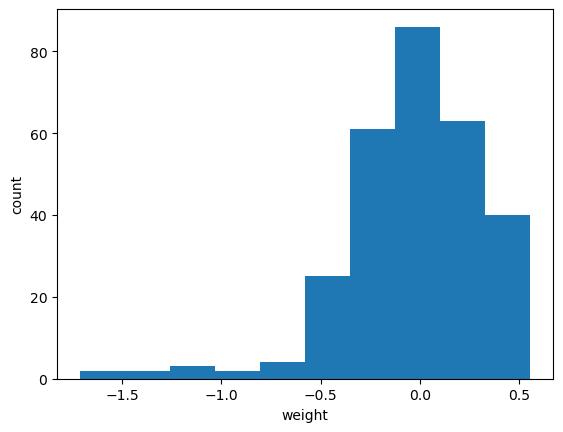

In [ ]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# 케라스 모델과 비슷하게 약간 한쪽으로 치우쳐져 있지만 종모양 형태

In [ ]:
#conv_weight 텐서의 크기 확인
print(conv_weights.shape)

# 케라스는 기본적으로 가중치를 (높이, 너비, 채널, 필터 개수)로 나타내지만 
# 파이토치는 (필터 개수,채널, 높이, 너비)

torch.Size([32, 1, 3, 3])


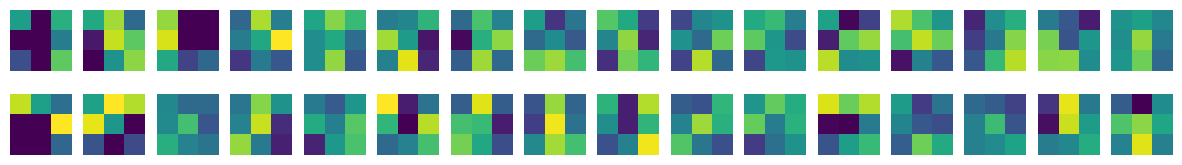

In [73]:
#⚡가중치 그리기

fig, axs = plt.subplots(2,16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[i*16 + j,0,:,:], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

패션 MNIST 데이터 중 하나를 모델에 통과시키고 합성곱 층이 어떤 활성화 출력을 만드는지 확인

In [ ]:
# 패션 MNIST 데이터 중에서 훈련 세트만 다운로드

from torchvision.datasets import FashionMNIST

fm_train = FashionMNIST(root='.', train=True, download=True)
train_input = fm_train.data

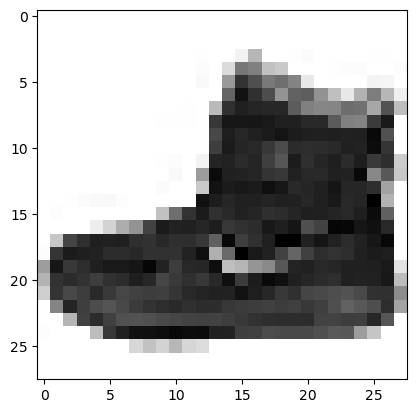

In [76]:
# 훈련 세트에 있는 첫 번째 샘플 그려보기

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [77]:
#훈련 세트를 준비했던 것과 동일한 방식으로 배치 차원과 채널 차원을 추가하고 255로 나눔
#그 후 model.conv1 층에 전달
#케라스 모델은 활성화 함수가 '층'에 포함되어 있음
#합성곱 층의 출력이 렐루 함수를 거친 결과

#⚡파이토치의 경우 렐루 함수가 별도의 층으로 분리되어 있어 model.conv1 층이 반환환 결과를
#다시 model.relu1에 전달하여 최종결과를 얻어야 함

ankle_boot = train_input[0:1].reshape(1,1,28,28)/255.0

model.eval()
with torch.no_grad():
    feature_maps = model.conv1(ankle_boot)
    feature_maps = model.relu1(feature_maps)    

In [ ]:
#특징 맵 크기 확인
print(feature_maps.shape)

#--샘플 1개 이므로 배치차원 값은 1
#--채널 개수는 32개로 늘어남 (합성곱 층에서 세임 패팅 사용했기 때문)
#--높이와 너비는 28 그대로!

torch.Size([1, 32, 28, 28])


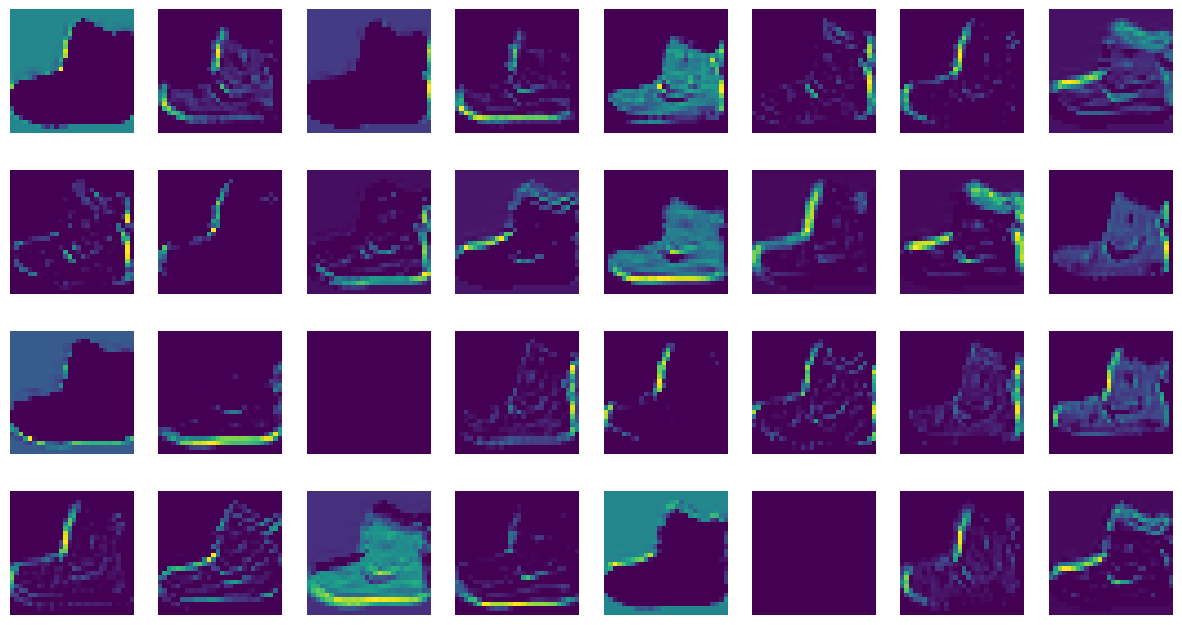

In [ ]:
#위 특성 맵을 맷플롯립 사용하여 그리기

fig, axs = plt.subplots(4,8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, i*8+j, :, :]) #특징 맵 첨자 순서 주의‼️
        axs[i, j].axis('off')
plt.show()

두 번째 합성곱 층이 만드는 특성 맵 그리기

In [81]:
# 같은 방식으로 합성곱 층, 렐루 함수, 풀링 층, 합성곱 층, 렐루 함수를 이어서 호출

model.eval()
with torch.no_grad():
    feature_maps = model.conv1(ankle_boot)
    feature_maps = model.relu1(feature_maps)    
    feature_maps = model.pool1(feature_maps)    
    feature_maps = model.conv2(feature_maps)    
    feature_maps = model.relu2(feature_maps)    

In [82]:
#모델의 층을 반복하여 호출하면서 층 이름이 ‘relu2’인 경우 반복을 중지

model.eval()
x = ankle_boot
with torch.no_grad():
    for name, layer in model.named_children():
        x = layer(x)
        if name == 'relu2':
            break
feature_maps = x

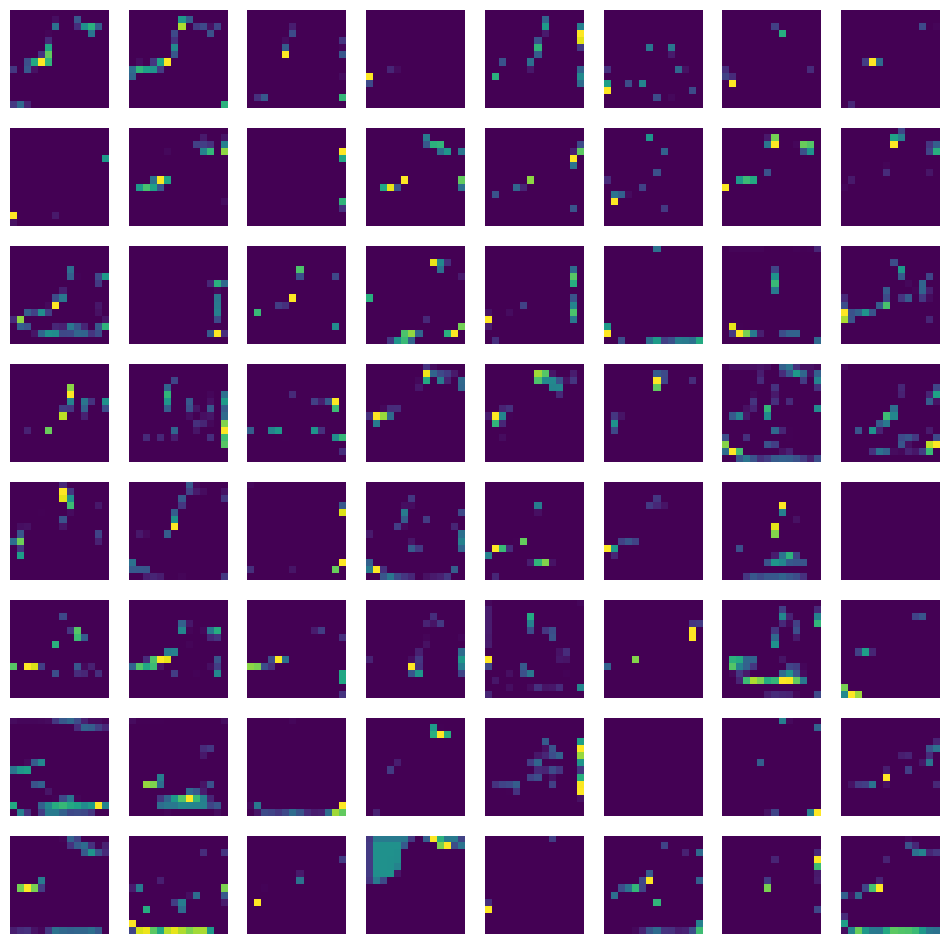

In [83]:
#featurejmaps를 사용해 두 번째 합성곱 층이 만든 특성 맵 그리기 

fig, axs = plt.subplots(8,8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, i*8 + j,:,:])
        axs[i, j].axis('off')
plt.show()

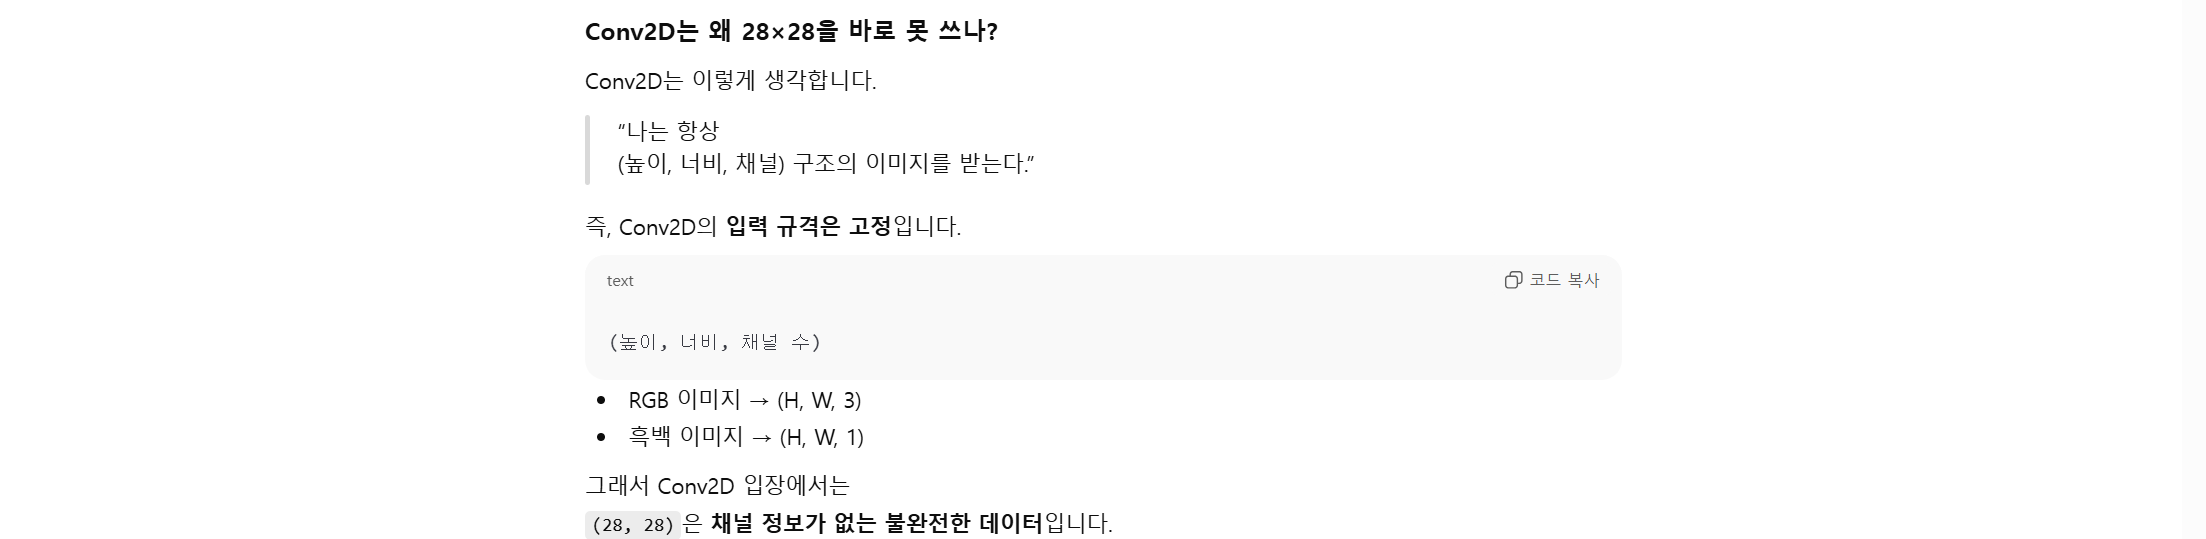
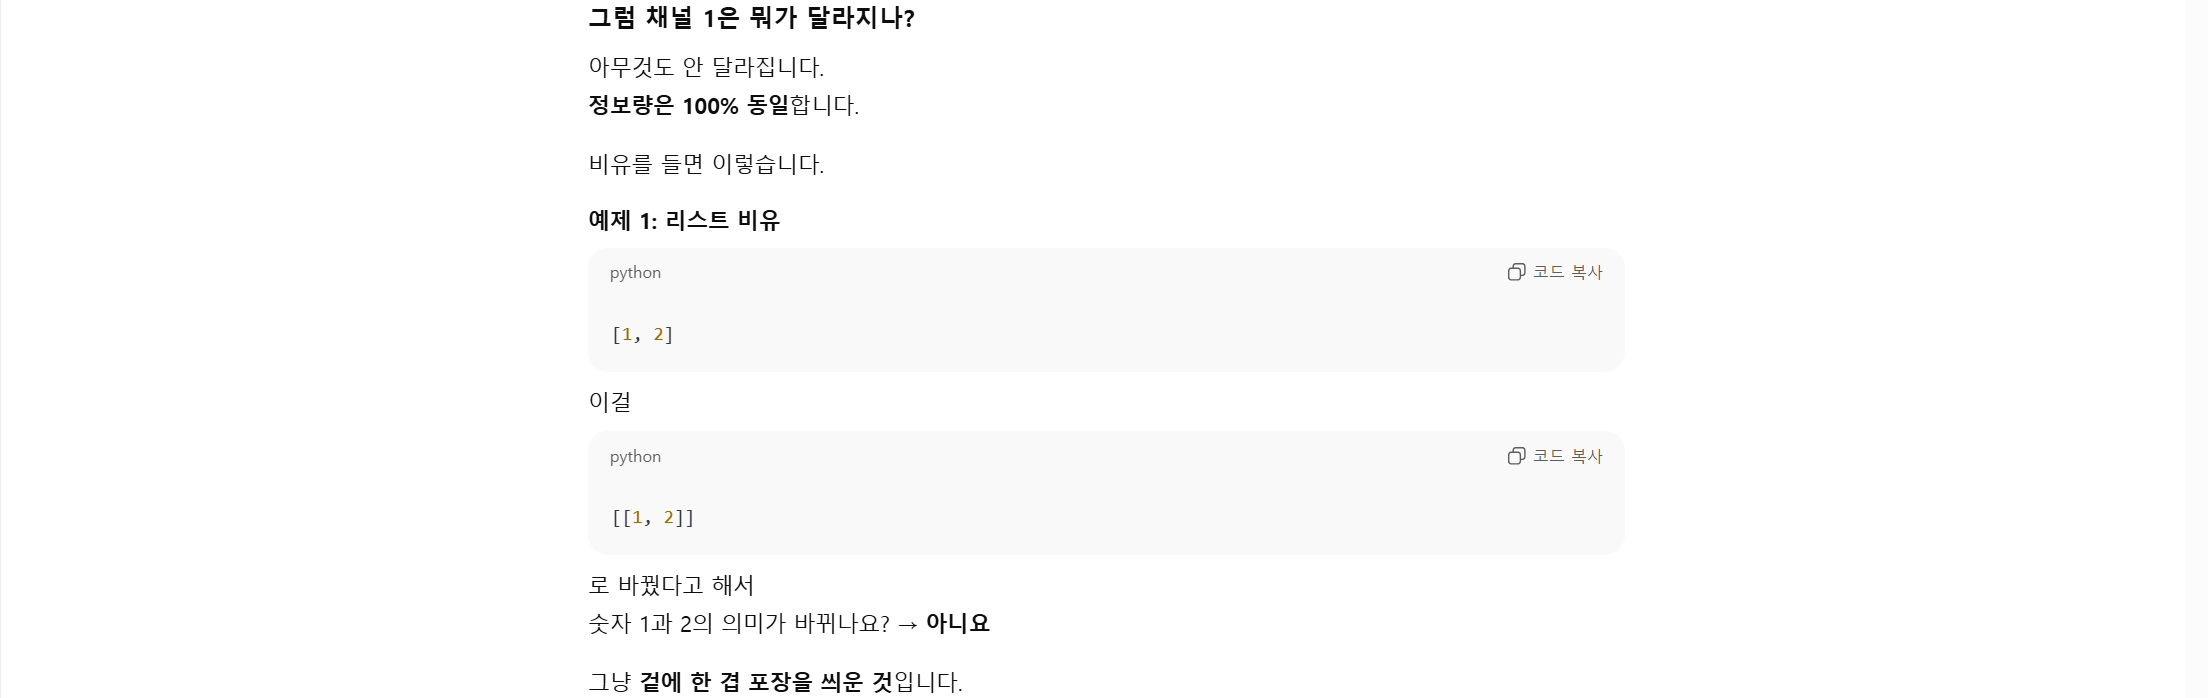
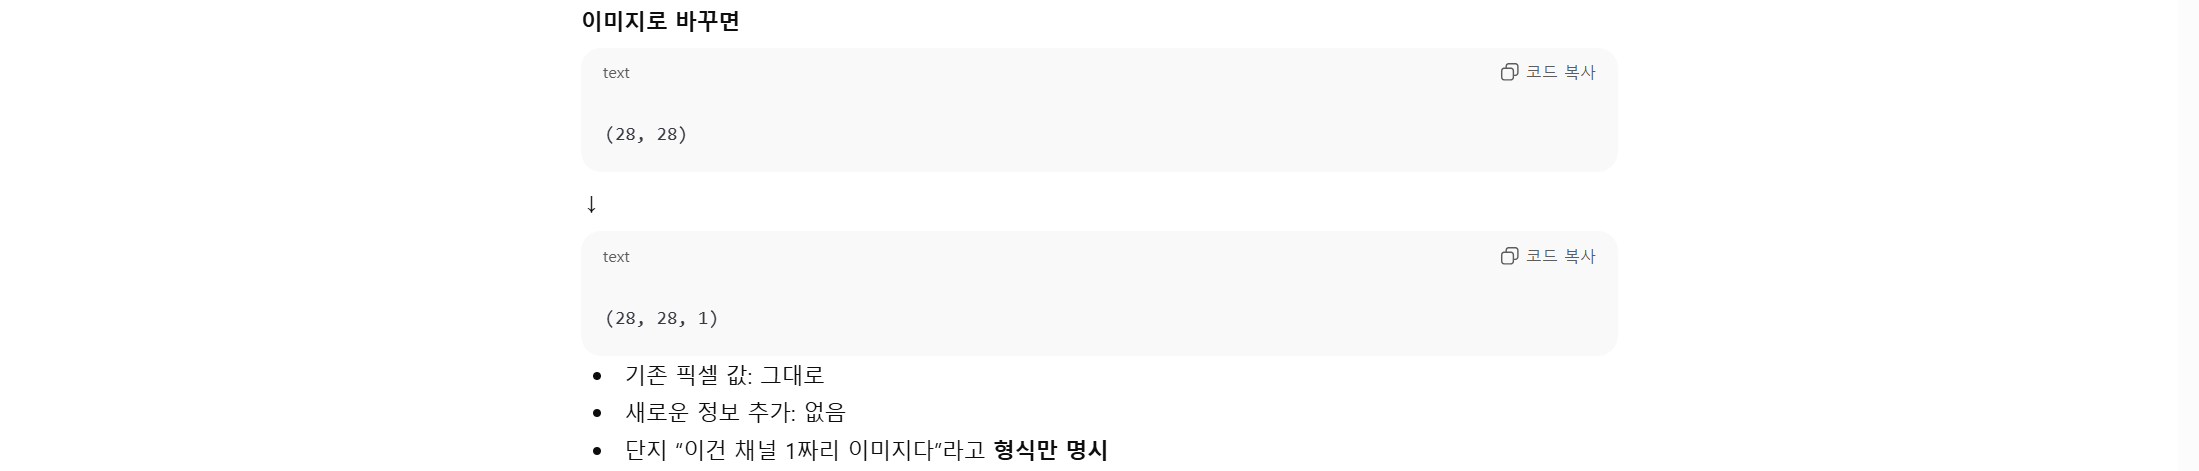
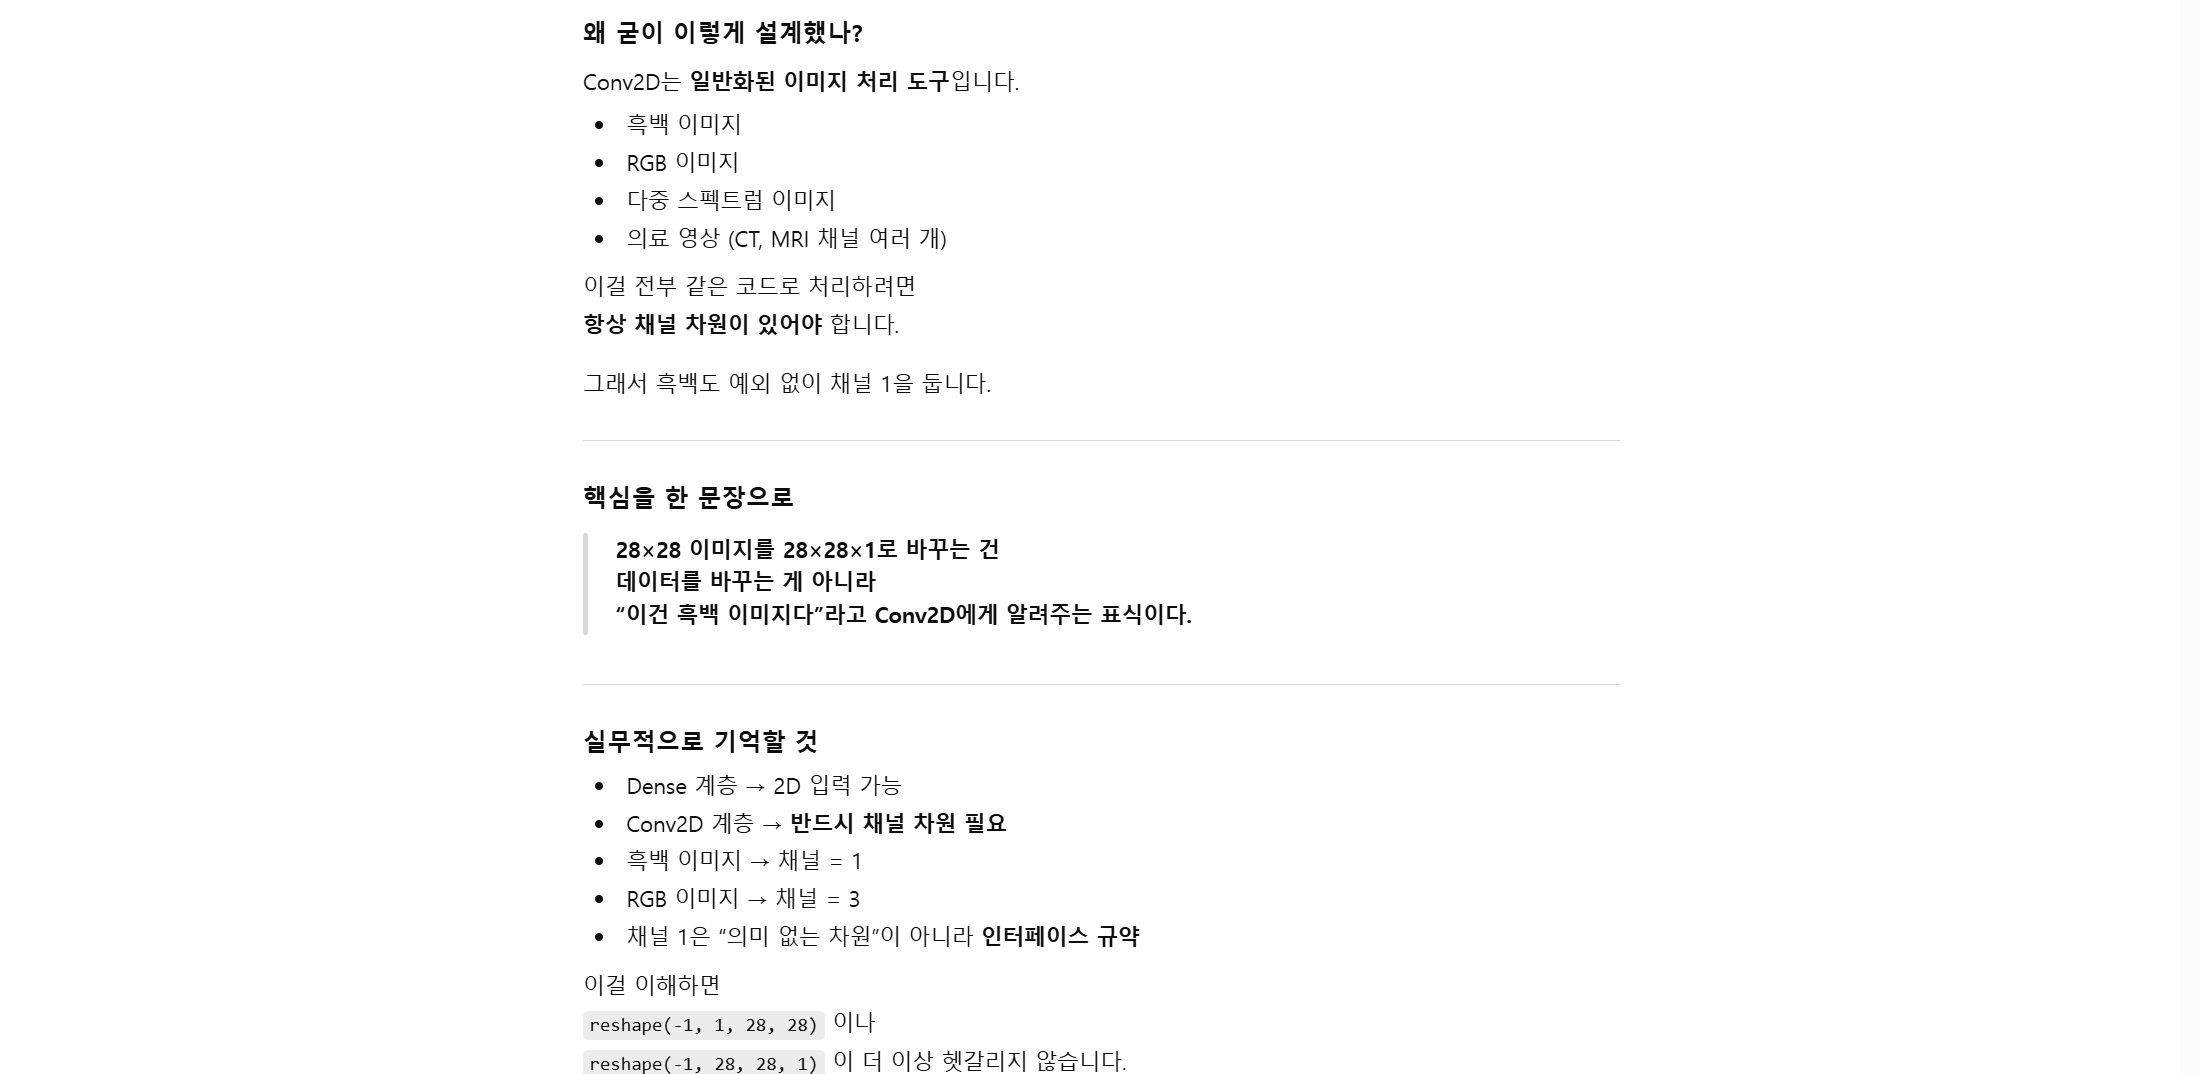

In [1]:
# 흑백 이미지
# 이미지 크기: 28×28
# 채널 수: 1
# 맨 앞 -1 → 배치 크기(샘플 개수, 자동 계산)

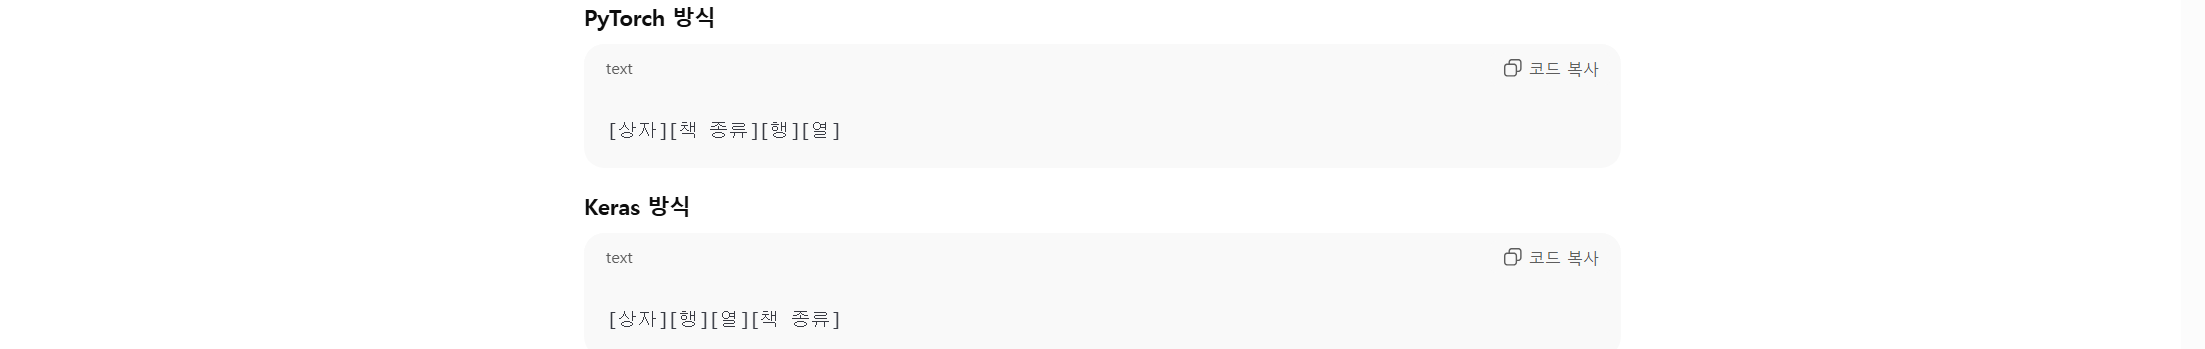
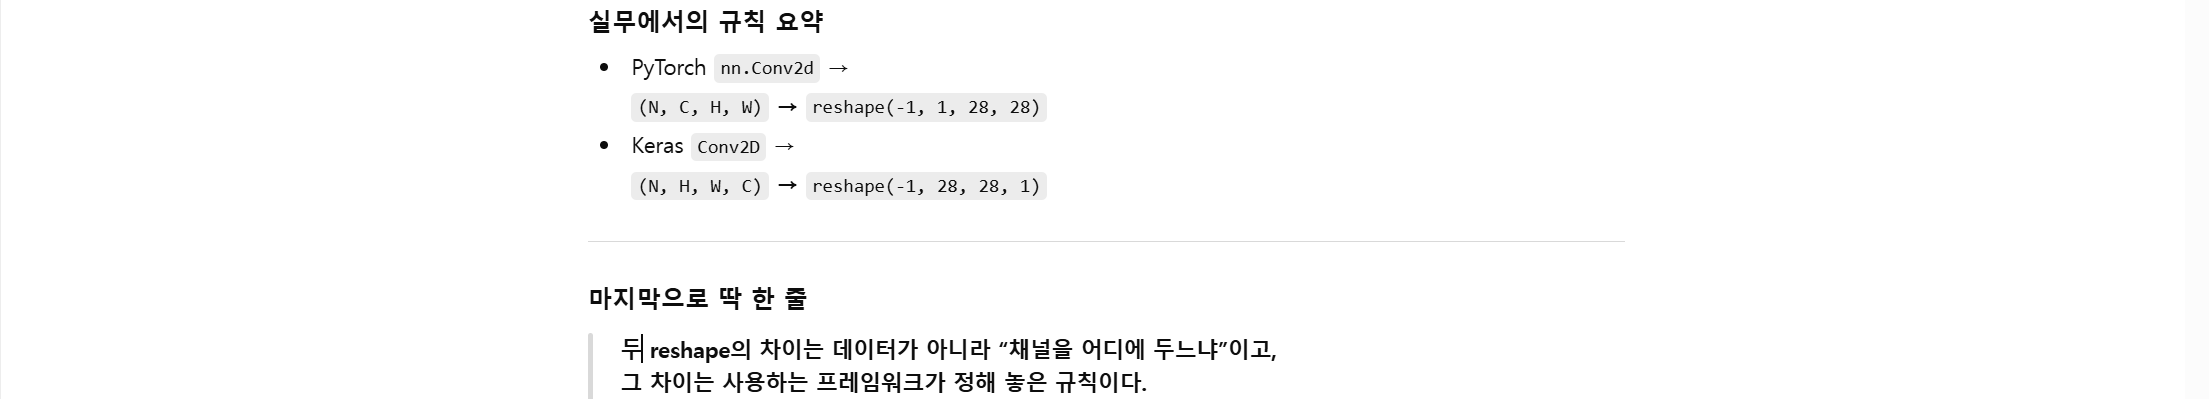